### Fase IV. Modeling. Modelat

En aquesta fase, es seleccionen y s'utilitzen les tècniqeus de modelatge que siguin pertinents al problema ( com més s'utilitzin millor), i es calibreen els seus paràmetres a valors òptims. Típicament hi ha diverses tècniques per el mateix problema de mineria de dades. Algunes tècniques tenen requeriments específics sobre la forma de les dades. Per tant casi sempre en qualsevol projecte s'acaba tornant a la fase de preparació de dades.

Primer cal importar les dues llibreries de Python que caldrà utlilitzar per la preparació de les dades ja extretes que volem fer.

Les dues llibreries són:

- **Pylab**: 


- **Scipy**: 

- **Scikit-learn**:

     
- **Itertools**: 

- **MatplotLib**:

- **Seaborn**:

In [1]:
#Importem totes les llibreries requerides.

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
import itertools 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
mpl.style.use('ggplot') # optional: for ggplot-like style

Obtenim les dades de la fase de preperació da dades que es troben el següent fitxer **.csv**.

In [2]:
dataframe = pd.read_csv("NBA_analysis_19_20.csv")
dataframe=dataframe[['New Date','Attend.','Visitor','PTSV','Home','PTSH','%W','%W as Home/Visitor','Back to back','Net Rating','OT last match','Rest/Injuries Stars','Last N','Bets','Bet Home','Bet Visitor','Win Streak','Km','Winner']]
#provar les 10 confusion matrix per separat per veure quines són millors pel model
dataframe.head()

New Date Attend.               Visitor  PTSV                  Home  PTSH  \
0  22/10/19  20,787  New Orleans Pelicans   122       Toronto Raptors   130   
1  22/10/19  19,068    Los Angeles Lakers   102  Los Angeles Clippers   112   
2  23/10/19  15,424         Chicago Bulls   125     Charlotte Hornets   126   
3  23/10/19  17,923       Detroit Pistons   119        Indiana Pacers   110   
4  23/10/19  18,846   Cleveland Cavaliers    85         Orlando Magic    94   

      %W  %W as Home/Visitor  Back to back  Net Rating  OT last match  \
0  0.073               0.176           0.0         0.0            0.0   
1  0.049               0.180           0.0         0.0            0.0   
2 -0.079              -0.013           0.0         0.0            0.0   
3  0.134               0.239           0.0         0.0            0.0   
4  0.201               0.280           0.0         0.0            0.0   

   Rest/Injuries Stars  Last N  Bets  Bet Home  Bet Visitor  Win Streak  \
0                  0.0    0.07 -1.92      1.36         3.28         0.0   
1                  1.0    0.05  0.78      2.39         1.61         0.0   
2                  0.0   -0.08  0.77      2.39         1.62         0.0   
3                  0.0    0.13 -2.12      1.33         3.45         0.0   
4                  0.0    0.20 -3.71      1.20         4.91         0.0   

       Km  Winner  
0 -1789.0     1.0  
1     0.0     1.0  
2  -947.1     1.0  
3  -403.4     0.0  
4 -1436.0     1.0

We create a new dataframe to store the results of the test we are going to do

In [3]:
data = pd.DataFrame(columns=('Visitor','PTSV','Home','PTSH','New Date'))

We take a look on how are distributed, the winner matches which is our output goal we want to predict. If the winner is the Home team it gives us a 1 if the winner is the visitor we get a 0.

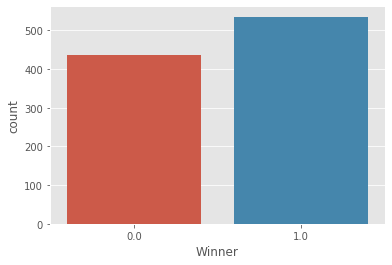

In [4]:
sns.countplot(x='Winner',data=dataframe)

We can see that we have above 500 home wins and above 400 visitor wins

In [5]:
#dataframe.drop(['PTSV','PTSH','Bet Home','Bet Visitor'],axis=1, inplace=True)
df=dataframe.corr()
df


PTSV      PTSH        %W  %W as Home/Visitor  \
PTSV                 1.000000  0.338767 -0.235527           -0.268411   
PTSH                 0.338767  1.000000  0.254556            0.189096   
%W                  -0.235527  0.254556  1.000000            0.877012   
%W as Home/Visitor  -0.268411  0.189096  0.877012            1.000000   
Back to back        -0.020874  0.063314 -0.020933           -0.033501   
Net Rating          -0.214482  0.252728  0.907212            0.800793   
OT last match        0.071709 -0.017730 -0.063819           -0.043175   
Rest/Injuries Stars -0.018192 -0.006781  0.117180            0.092291   
Last N              -0.177064  0.214674  0.811011            0.690664   
Bets                 0.230287 -0.249828 -0.817671           -0.722391   
Bet Home             0.234063 -0.170034 -0.718994           -0.663801   
Bet Visitor         -0.189847  0.250138  0.733113            0.632631   
Win Streak          -0.046722  0.084661  0.306534            0.252255   
Km                   0.022711  0.029983  0.037920            0.049047   
Winner              -0.456565  0.461888  0.372080            0.361997   

                     Back to back  Net Rating  OT last match  \
PTSV                    -0.020874   -0.214482       0.071709   
PTSH                     0.063314    0.252728      -0.017730   
%W                      -0.020933    0.907212      -0.063819   
%W as Home/Visitor      -0.033501    0.800793      -0.043175   
Back to back             1.000000   -0.000508      -0.015495   
Net Rating              -0.000508    1.000000      -0.086758   
OT last match           -0.015495   -0.086758       1.000000   
Rest/Injuries Stars     -0.036189    0.107016       0.041027   
Last N                  -0.024315    0.735128      -0.069363   
Bets                    -0.065263   -0.798000       0.091236   
Bet Home                -0.046681   -0.715989       0.060099   
Bet Visitor              0.064152    0.707950      -0.092401   
Win Streak              -0.006511    0.295835      -0.075121   
Km                      -0.029390    0.039736       0.039897   
Winner                   0.054979    0.359756      -0.082047   

                     Rest/Injuries Stars    Last N      Bets  Bet Home  \
PTSV                           -0.018192 -0.177064  0.230287  0.234063   
PTSH                           -0.006781  0.214674 -0.249828 -0.170034   
%W                              0.117180  0.811011 -0.817671 -0.718994   
%W as Home/Visitor              0.092291  0.690664 -0.722391 -0.663801   
Back to back                   -0.036189 -0.024315 -0.065263 -0.046681   
Net Rating                      0.107016  0.735128 -0.798000 -0.715989   
OT last match                   0.041027 -0.069363  0.091236  0.060099   
Rest/Injuries Stars             1.000000  0.080027  0.152084  0.141267   
Last N                          0.080027  1.000000 -0.684632 -0.590849   
Bets                            0.152084 -0.684632  1.000000  0.786292   
Bet Home                        0.141267 -0.590849  0.786292  1.000000   
Bet Visitor                    -0.132387  0.619711 -0.945580 -0.542458   
Win Streak                      0.072371  0.429974 -0.239698 -0.192318   
Km                              0.071400  0.040486 -0.044447 -0.033944   
Winner                         -0.004513  0.301545 -0.368440 -0.328844   

                     Bet Visitor  Win Streak        Km    Winner  
PTSV                   -0.189847   -0.046722  0.022711 -0.456565  
PTSH                    0.250138    0.084661  0.029983  0.461888  
%W                      0.733113    0.306534  0.037920  0.372080  
%W as Home/Visitor      0.632631    0.252255  0.049047  0.361997  
Back to back            0.064152   -0.006511 -0.029390  0.054979  
Net Rating              0.707950    0.295835  0.039736  0.359756  
OT last match          -0.092401   -0.075121  0.039897 -0.082047  
Rest/Injuries Stars    -0.132387    0.072371  0.071400 -0.004513  
Last N                  0.619711    0.42997

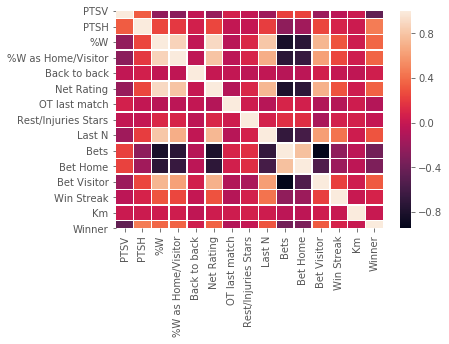

In [6]:
sns.heatmap(df, linewidths=.5)

Now we will use an scatterplot to visualize the realtionship between the X an y variable. **(mirar com fer gràfic amb histograma a sobre)**

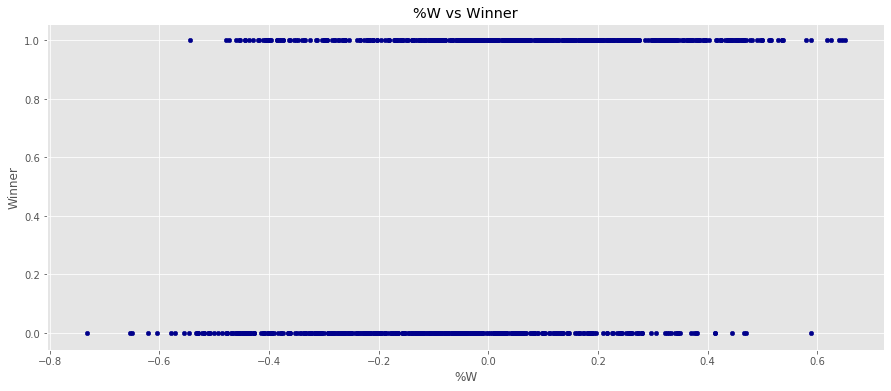

In [7]:
dataframe.plot(kind='scatter', x='%W', y='Winner', figsize=(15,6), color='darkblue')

plt.title('%W vs Winner')
plt.xlabel('%W')
plt.ylabel('Winner')

plt.show()

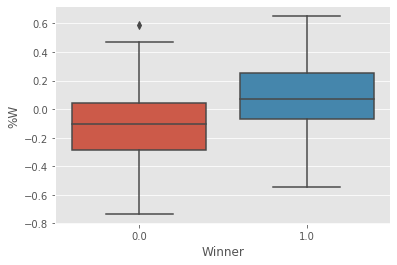

In [8]:
sns.boxplot(x="Winner", y="%W", data=dataframe)

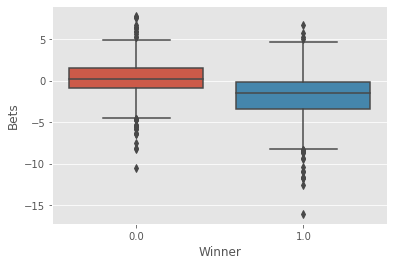

In [9]:
sns.boxplot(x="Winner", y="Bets", data=dataframe)

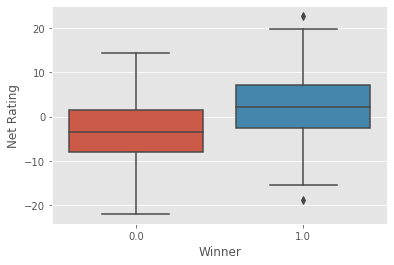

In [10]:
sns.boxplot(x="Winner", y="Net Rating", data=dataframe)

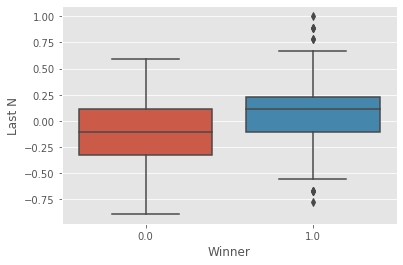

In [11]:
sns.boxplot(x="Winner", y="Last N", data=dataframe)

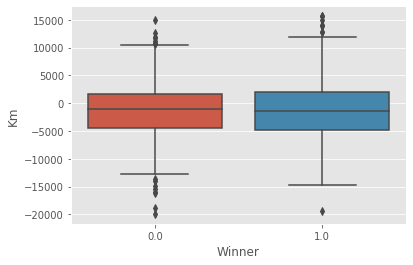

In [12]:
sns.boxplot(x="Winner", y="Km", data=dataframe)

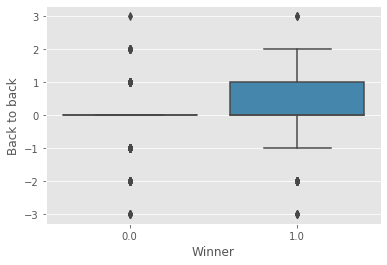

In [13]:
sns.boxplot(x="Winner", y="Back to back", data=dataframe)

### Which features are going to provide us the best performance in the prediction?

In [14]:

X=np.asarray(dataframe[['%W','%W as Home/Visitor','Back to back','Net Rating','OT last match',
                        'Rest/Injuries Stars','Last N','Bets','Win Streak','Km']])
y = np.asarray(dataframe['Winner'])


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.31, random_state=5)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

LR = LogisticRegression(C=0.9, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

jac=jaccard_similarity_score(y_test, yhat)

selector = RFE(LR, 1, step=1)
selector = selector.fit(X, y)
support=selector.support_
ranking=selector.ranking_


features_to_select = pd.DataFrame(columns=('Features','Support','Ranking'))
features_to_select['Features']=np.array(['%W','%W as Home/Visitor','Back to back','Net Rating','OT last match',
                                         'Rest/Injuries Stars','Last N','Bets','Win Streak','Km'])
features_to_select['Support']=support
features_to_select['Ranking']=ranking
features=features_to_select.sort_values(by=['Ranking'])
features

Train set: (669, 10) (669,)
Test set: (302, 10) (302,)


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


Features  Support  Ranking
0                   %W     True        1
1   %W as Home/Visitor    False        2
4        OT last match    False        3
7                 Bets    False        4
2         Back to back    False        5
5  Rest/Injuries Stars    False        6
6               Last N    False        7
8           Win Streak    False        8
3           Net Rating    False        9
9                   Km    False       10

### For our model we are going to take the 6 features that apparently give better accuracy to our model, so the selected features are: %W, %W as Home/Visitor, OT last match, Bets, Back to Back, Rest/Inj Stars.

### We select the independent variables (X) and the dependant variable (y) for our model

In [15]:
X = np.asarray(dataframe[['%W','Bets','Km','OT last match']])
X[0:5]

array([[ 7.300e-02, -1.920e+00, -1.789e+03,  0.000e+00],
       [ 4.900e-02,  7.800e-01,  0.000e+00,  0.000e+00],
       [-7.900e-02,  7.700e-01, -9.471e+02,  0.000e+00],
       [ 1.340e-01, -2.120e+00, -4.034e+02,  0.000e+00],
       [ 2.010e-01, -3.710e+00, -1.436e+03,  0.000e+00]])

In [16]:
y = np.asarray(dataframe['Winner'])
y [0:5]

array([1., 1., 1., 0., 1.])

### We process and scale all the data to have it prepared for the test

In [17]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.30729595, -0.30256928, -0.09371187,  0.0178806 ],
       [ 0.21359698,  0.63746258,  0.23601017,  0.0178806 ],
       [-0.28613085,  0.63398098,  0.06145469,  0.0178806 ],
       [ 0.54544749, -0.37220127,  0.16166144,  0.0178806 ],
       [ 0.80702377, -0.92577558, -0.02865213,  0.0178806 ]])

#### This function plots the confusion matrix of the simulation (aquest funció està extreta de un curset de machine learning no està programada per mi)

In [18]:

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print(confusion_matrix(y_test, yhat, labels=[1,0]))
    conf=(confusion_matrix(y_test, yhat, labels=[1,0]))
    conf=conf[0][0]+conf[1][1]
    print(conf)
    return conf


#### This function identify the matches that are in the test and in the train set in every simulation

In [19]:
def identify_tests(X,X_test,data):

    matches=[]
    test_matches=[]
    bets=[]
    bets_test=[]
    Visitor=[]
    PTSV=[]
    Home=[]
    PTSH=[]
    New_Date=[]
    yhat_prob_bets_visitor=[]
    yhat_prob_bets_local=[]
    bet_visitor=[]
    bet_home=[]
    Winner=[]
    k=0

    for i in range (len(X)):
        for j in range(len(X_test)):
            if X[i][0]==X_test[j][0] and  X[i][1]==X_test[j][1] and X[i][2]==X_test[j][2] and X[i][3]==X_test[j][3]     :
                matches=matches+[i]
                test_matches=test_matches+[j]

    for z in range(len(matches)):
        bets=bets+[matches[z]]
        bets_test=bets_test+[test_matches[z]]


    for w in bets:
        Visitor=np.append(Visitor,data['Visitor'][w])
        PTSV=np.append(PTSV,data['PTSV'][w])
        Home=np.append(Home,data['Home'][w])
        PTSH=np.append(PTSH,data['PTSH'][w])
        New_Date=np.append(New_Date,data['New Date'][w])
        bet_visitor=np.append(bet_visitor,data['Bet Visitor'][w])
        bet_home=np.append(bet_home,data['Bet Home'][w])
        Winner=np.append(Winner, data['Winner'][w])

    for e in (bets_test):
        yhat_prob_bets_visitor=yhat_prob_bets_visitor+[float("{0:.4f}".format(yhat_prob[e][0]))]
        yhat_prob_bets_local=yhat_prob_bets_local+[float("{0:.4f}".format(yhat_prob[e][1]))]

       
    return Visitor,PTSV,Home,PTSH,New_Date,yhat_prob_bets_visitor,yhat_prob_bets_local,bet_visitor,bet_home,Winner



## First of all we are going to try the Logistic Regression algorithm

<a id="ref1"></a>
## What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">


The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.

#### This loop repeats the simultion for N times with the purpose to get the results for a big amount of random numbers, this gives us a real estimation of how the model is performing

Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27 12]
 [12 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27 12]
 [12 17]]
44
Confusion matrix, without normalization
[[27 12]
 [12 17]]
[[27 12]
 [12 17]]
44
Mitjana encerts
44.0
desviació estandar
0.0


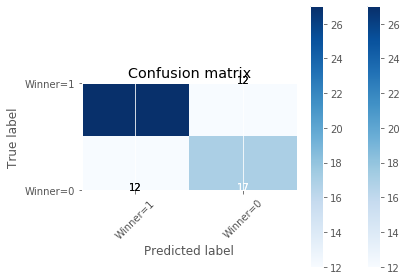

              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59        29
         1.0       0.69      0.69      0.69        39

    accuracy                           0.65        68
   macro avg       0.64      0.64      0.64        68
weighted avg       0.65      0.65      0.65        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[25 10]
 [15 18]]
[[25 10]
 [15 18]]
43
Confusion matrix, without normalization
[[25 10]
 [15 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[25 10]
 [15 18]]
43
Mitjana encerts
43.5
desviació estandar
0.5


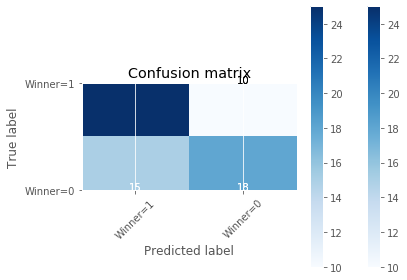

              precision    recall  f1-score   support

         0.0       0.64      0.55      0.59        33
         1.0       0.62      0.71      0.67        35

    accuracy                           0.63        68
   macro avg       0.63      0.63      0.63        68
weighted avg       0.63      0.63      0.63        68

LogLoss: : 0.65
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[24  6]
 [15 23]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[24  6]
 [15 23]]
47
Confusion matrix, without normalization
[[24  6]
 [15 23]]
[[24  6]
 [15 23]]
47
Mitjana encerts
44.666666666666664
desviació estandar
1.699673171197595


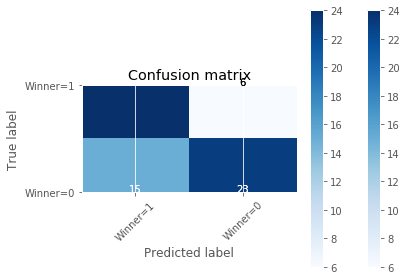

              precision    recall  f1-score   support

         0.0       0.79      0.61      0.69        38
         1.0       0.62      0.80      0.70        30

    accuracy                           0.69        68
   macro avg       0.70      0.70      0.69        68
weighted avg       0.71      0.69      0.69        68

LogLoss: : 0.58
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26  6]
 [11 25]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26  6]
 [11 25]]
51
Confusion matrix, without normalization
[[26  6]
 [11 25]]
[[26  6]
 [11 25]]
51
Mitjana encerts
46.25
desviació estandar
3.112474899497183


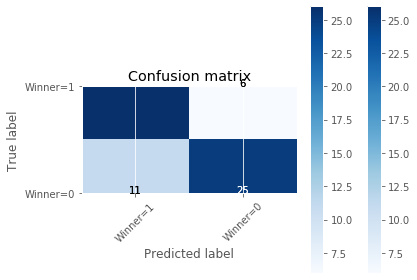

              precision    recall  f1-score   support

         0.0       0.81      0.69      0.75        36
         1.0       0.70      0.81      0.75        32

    accuracy                           0.75        68
   macro avg       0.75      0.75      0.75        68
weighted avg       0.76      0.75      0.75        68

LogLoss: : 0.56
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26 10]
 [12 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26 10]
 [12 20]]
46
Confusion matrix, without normalization
[[26 10]
 [12 20]]
[[26 10]
 [12 20]]
46
Mitjana encerts
46.2
desviació estandar
2.7856776554368237


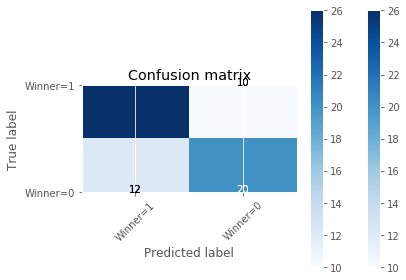

              precision    recall  f1-score   support

         0.0       0.67      0.62      0.65        32
         1.0       0.68      0.72      0.70        36

    accuracy                           0.68        68
   macro avg       0.68      0.67      0.67        68
weighted avg       0.68      0.68      0.68        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[23 12]
 [17 16]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[23 12]
 [17 16]]
39
Confusion matrix, without normalization
[[23 12]
 [17 16]]
[[23 12]
 [17 16]]
39
Mitjana encerts
45.0
desviació estandar
3.696845502136472


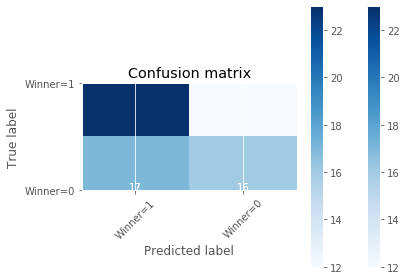

              precision    recall  f1-score   support

         0.0       0.57      0.48      0.52        33
         1.0       0.57      0.66      0.61        35

    accuracy                           0.57        68
   macro avg       0.57      0.57      0.57        68
weighted avg       0.57      0.57      0.57        68

LogLoss: : 0.72
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[25  7]
 [19 17]]
[[25  7]
 [19 17]]
42
Confusion matrix, without normalization
[[25  7]
 [19 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[25  7]
 [19 17]]
42
Mitjana encerts
44.57142857142857
desviació estandar
3.5799897388976194


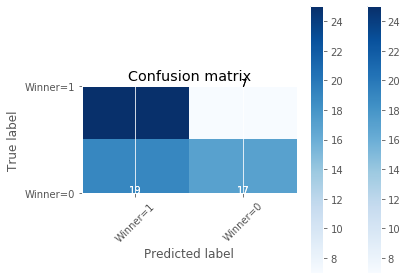

              precision    recall  f1-score   support

         0.0       0.71      0.47      0.57        36
         1.0       0.57      0.78      0.66        32

    accuracy                           0.62        68
   macro avg       0.64      0.63      0.61        68
weighted avg       0.64      0.62      0.61        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26  7]
 [20 15]]
[[26  7]
 [20 15]]
41
Confusion matrix, without normalization
[[26  7]
 [20 15]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26  7]
 [20 15]]
41
Mitjana encerts
44.125
desviació estandar
3.550968177835448


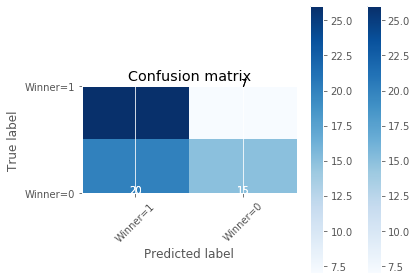

              precision    recall  f1-score   support

         0.0       0.68      0.43      0.53        35
         1.0       0.57      0.79      0.66        33

    accuracy                           0.60        68
   macro avg       0.62      0.61      0.59        68
weighted avg       0.63      0.60      0.59        68

LogLoss: : 0.68
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30  9]
 [11 18]]
[[30  9]
 [11 18]]
48
Confusion matrix, without normalization
[[30  9]
 [11 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30  9]
 [11 18]]
48
Mitjana encerts
44.55555555555556
desviació estandar
3.5624932315291993


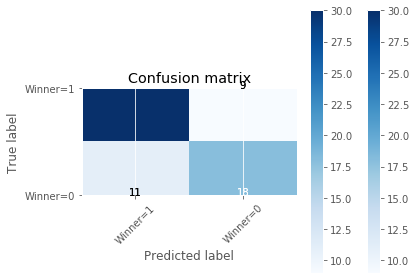

              precision    recall  f1-score   support

         0.0       0.67      0.62      0.64        29
         1.0       0.73      0.77      0.75        39

    accuracy                           0.71        68
   macro avg       0.70      0.69      0.70        68
weighted avg       0.70      0.71      0.70        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[22 12]
 [11 23]]
[[22 12]
 [11 23]]
45
Confusion matrix, without normalization
[[22 12]
 [11 23]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[22 12]
 [11 23]]
45
Mitjana encerts
44.6
desviació estandar
3.3823069050575527


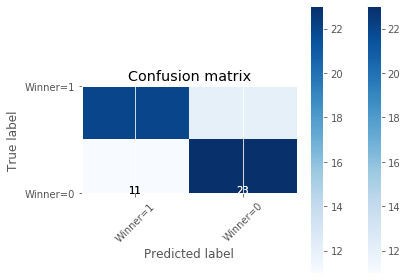

              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67        34
         1.0       0.67      0.65      0.66        34

    accuracy                           0.66        68
   macro avg       0.66      0.66      0.66        68
weighted avg       0.66      0.66      0.66        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[32  7]
 [10 19]]
[[32  7]
 [10 19]]
51
Confusion matrix, without normalization
[[32  7]
 [10 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[32  7]
 [10 19]]
51
Mitjana encerts
45.18181818181818
desviació estandar
3.7128323375749344


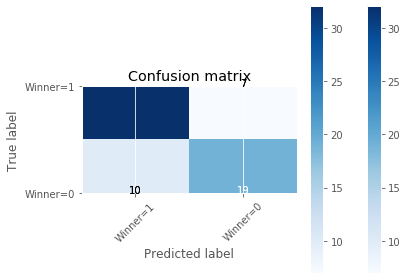

              precision    recall  f1-score   support

         0.0       0.73      0.66      0.69        29
         1.0       0.76      0.82      0.79        39

    accuracy                           0.75        68
   macro avg       0.75      0.74      0.74        68
weighted avg       0.75      0.75      0.75        68

LogLoss: : 0.57
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28  9]
 [14 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28  9]
 [14 17]]
45
Confusion matrix, without normalization
[[28  9]
 [14 17]]
[[28  9]
 [14 17]]
45
Mitjana encerts
45.166666666666664
desviació estandar
3.55512150128359


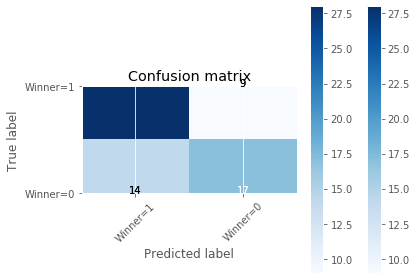

              precision    recall  f1-score   support

         0.0       0.65      0.55      0.60        31
         1.0       0.67      0.76      0.71        37

    accuracy                           0.66        68
   macro avg       0.66      0.65      0.65        68
weighted avg       0.66      0.66      0.66        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27 13]
 [ 8 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27 13]
 [ 8 20]]
47
Confusion matrix, without normalization
[[27 13]
 [ 8 20]]
[[27 13]
 [ 8 20]]
47
Mitjana encerts
45.30769230769231
desviació estandar
3.450409460308585


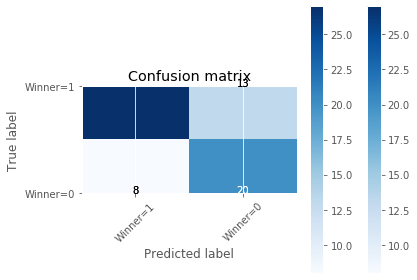

              precision    recall  f1-score   support

         0.0       0.61      0.71      0.66        28
         1.0       0.77      0.68      0.72        40

    accuracy                           0.69        68
   macro avg       0.69      0.69      0.69        68
weighted avg       0.70      0.69      0.69        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30 10]
 [ 9 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30 10]
 [ 9 19]]
49
Confusion matrix, without normalization
[[30 10]
 [ 9 19]]
[[30 10]
 [ 9 19]]
49
Mitjana encerts
45.57142857142857
desviació estandar
3.45820526768863


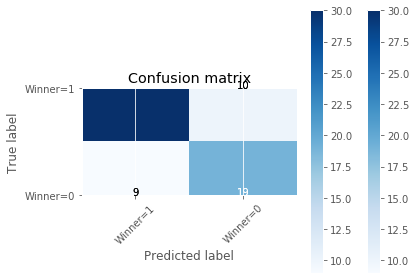

              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67        28
         1.0       0.77      0.75      0.76        40

    accuracy                           0.72        68
   macro avg       0.71      0.71      0.71        68
weighted avg       0.72      0.72      0.72        68

LogLoss: : 0.58
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[23 10]
 [13 22]]
[[23 10]
 [13 22]]
45
Confusion matrix, without normalization
[[23 10]
 [13 22]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[23 10]
 [13 22]]
45
Mitjana encerts
45.53333333333333
desviació estandar
3.343982987729187


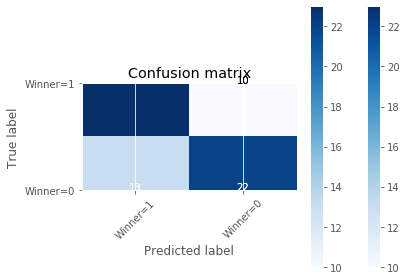

              precision    recall  f1-score   support

         0.0       0.69      0.63      0.66        35
         1.0       0.64      0.70      0.67        33

    accuracy                           0.66        68
   macro avg       0.66      0.66      0.66        68
weighted avg       0.66      0.66      0.66        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27  7]
 [14 20]]
[[27  7]
 [14 20]]
47
Confusion matrix, without normalization
[[27  7]
 [14 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27  7]
 [14 20]]
47
Mitjana encerts
45.625
desviació estandar
3.2572035551988456


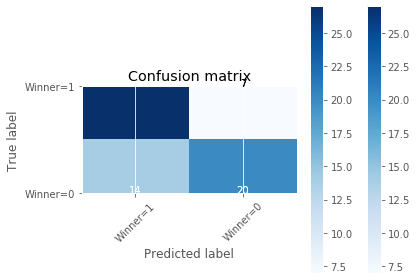

              precision    recall  f1-score   support

         0.0       0.74      0.59      0.66        34
         1.0       0.66      0.79      0.72        34

    accuracy                           0.69        68
   macro avg       0.70      0.69      0.69        68
weighted avg       0.70      0.69      0.69        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27 11]
 [13 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27 11]
 [13 17]]
44
Confusion matrix, without normalization
[[27 11]
 [13 17]]
[[27 11]
 [13 17]]
44
Mitjana encerts
45.529411764705884
desviació estandar
3.1829998255220433


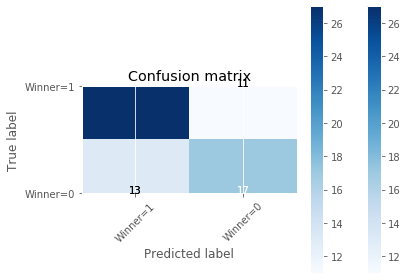

              precision    recall  f1-score   support

         0.0       0.61      0.57      0.59        30
         1.0       0.68      0.71      0.69        38

    accuracy                           0.65        68
   macro avg       0.64      0.64      0.64        68
weighted avg       0.65      0.65      0.65        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[21 19]
 [ 8 20]]
[[21 19]
 [ 8 20]]
41
Confusion matrix, without normalization
[[21 19]
 [ 8 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[21 19]
 [ 8 20]]
41
Mitjana encerts
45.27777777777778
desviació estandar
3.2626770800057825


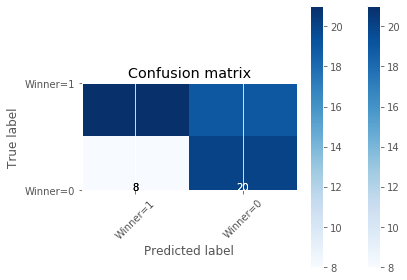

              precision    recall  f1-score   support

         0.0       0.51      0.71      0.60        28
         1.0       0.72      0.53      0.61        40

    accuracy                           0.60        68
   macro avg       0.62      0.62      0.60        68
weighted avg       0.64      0.60      0.60        68

LogLoss: : 0.65
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[22 12]
 [ 9 25]]
[[22 12]
 [ 9 25]]
47
Confusion matrix, without normalization
[[22 12]
 [ 9 25]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[22 12]
 [ 9 25]]
47
Mitjana encerts
45.36842105263158
desviació estandar
3.1988571366363674


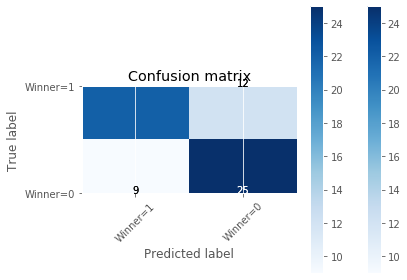

              precision    recall  f1-score   support

         0.0       0.68      0.74      0.70        34
         1.0       0.71      0.65      0.68        34

    accuracy                           0.69        68
   macro avg       0.69      0.69      0.69        68
weighted avg       0.69      0.69      0.69        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[24 12]
 [14 18]]
[[24 12]
 [14 18]]
42
Confusion matrix, without normalization
[[24 12]
 [14 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[24 12]
 [14 18]]
42
Mitjana encerts
45.2
desviació estandar
3.203123475609393


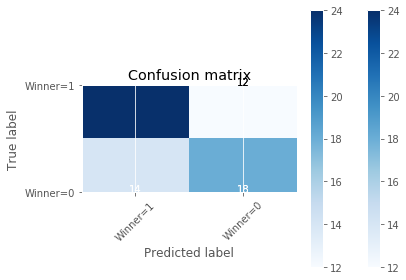

              precision    recall  f1-score   support

         0.0       0.60      0.56      0.58        32
         1.0       0.63      0.67      0.65        36

    accuracy                           0.62        68
   macro avg       0.62      0.61      0.61        68
weighted avg       0.62      0.62      0.62        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28 10]
 [15 15]]
[[28 10]
 [15 15]]
43
Confusion matrix, without normalization
[[28 10]
 [15 15]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28 10]
 [15 15]]
43
Mitjana encerts
45.095238095238095
desviació estandar
3.160843195290684


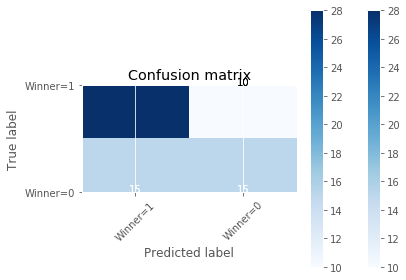

              precision    recall  f1-score   support

         0.0       0.60      0.50      0.55        30
         1.0       0.65      0.74      0.69        38

    accuracy                           0.63        68
   macro avg       0.63      0.62      0.62        68
weighted avg       0.63      0.63      0.63        68

LogLoss: : 0.65
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28  9]
 [13 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28  9]
 [13 18]]
46
Confusion matrix, without normalization
[[28  9]
 [13 18]]
[[28  9]
 [13 18]]
46
Mitjana encerts
45.13636363636363
desviació estandar
3.0939156500439338


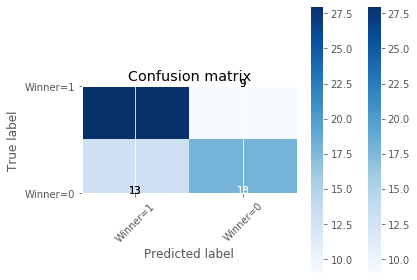

              precision    recall  f1-score   support

         0.0       0.67      0.58      0.62        31
         1.0       0.68      0.76      0.72        37

    accuracy                           0.68        68
   macro avg       0.67      0.67      0.67        68
weighted avg       0.68      0.68      0.67        68

LogLoss: : 0.65
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[21  9]
 [20 18]]
[[21  9]
 [20 18]]
39
Confusion matrix, without normalization
[[21  9]
 [20 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[21  9]
 [20 18]]
39
Mitjana encerts
44.869565217391305
desviació estandar
3.274464414567432


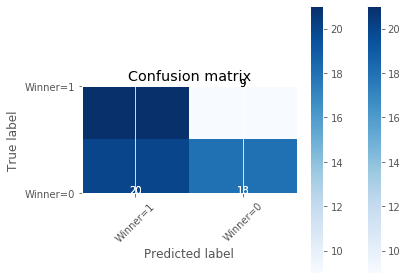

              precision    recall  f1-score   support

         0.0       0.67      0.47      0.55        38
         1.0       0.51      0.70      0.59        30

    accuracy                           0.57        68
   macro avg       0.59      0.59      0.57        68
weighted avg       0.60      0.57      0.57        68

LogLoss: : 0.69
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[23 15]
 [10 20]]
[[23 15]
 [10 20]]
43
Confusion matrix, without normalization
[[23 15]
 [10 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[23 15]
 [10 20]]
43
Mitjana encerts
44.791666666666664
desviació estandar
3.227217153455211


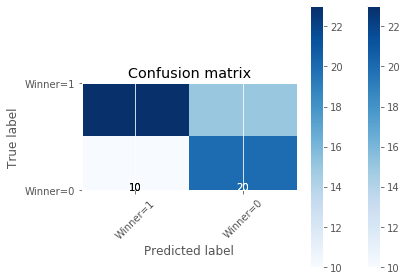

              precision    recall  f1-score   support

         0.0       0.57      0.67      0.62        30
         1.0       0.70      0.61      0.65        38

    accuracy                           0.63        68
   macro avg       0.63      0.64      0.63        68
weighted avg       0.64      0.63      0.63        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30  9]
 [14 15]]
[[30  9]
 [14 15]]
45
Confusion matrix, without normalization
[[30  9]
 [14 15]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30  9]
 [14 15]]
45
Mitjana encerts
44.8
desviació estandar
3.162277660168379


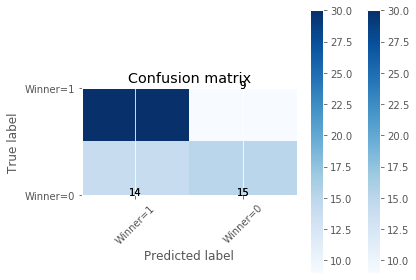

              precision    recall  f1-score   support

         0.0       0.62      0.52      0.57        29
         1.0       0.68      0.77      0.72        39

    accuracy                           0.66        68
   macro avg       0.65      0.64      0.64        68
weighted avg       0.66      0.66      0.66        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29  8]
 [16 15]]
[[29  8]
 [16 15]]
44
Confusion matrix, without normalization
[[29  8]
 [16 15]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29  8]
 [16 15]]
44
Mitjana encerts
44.76923076923077
desviació estandar
3.1046824724016258


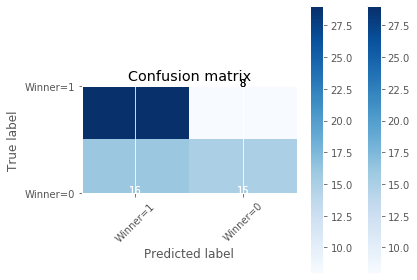

              precision    recall  f1-score   support

         0.0       0.65      0.48      0.56        31
         1.0       0.64      0.78      0.71        37

    accuracy                           0.65        68
   macro avg       0.65      0.63      0.63        68
weighted avg       0.65      0.65      0.64        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[24  9]
 [ 7 28]]
[[24  9]
 [ 7 28]]
52
Confusion matrix, without normalization
[[24  9]
 [ 7 28]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[24  9]
 [ 7 28]]
52
Mitjana encerts
45.03703703703704
desviació estandar
3.3386788414035373


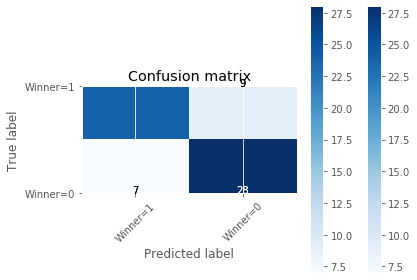

              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78        35
         1.0       0.77      0.73      0.75        33

    accuracy                           0.76        68
   macro avg       0.77      0.76      0.76        68
weighted avg       0.77      0.76      0.76        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26 12]
 [11 19]]
[[26 12]
 [11 19]]
45
Confusion matrix, without normalization
[[26 12]
 [11 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26 12]
 [11 19]]
45
Mitjana encerts
45.035714285714285
desviació estandar
3.2785247428982323


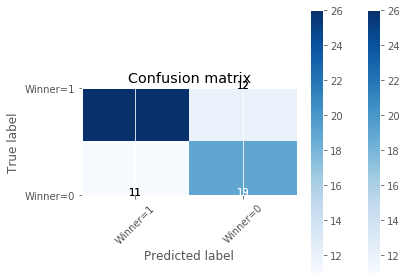

              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62        30
         1.0       0.70      0.68      0.69        38

    accuracy                           0.66        68
   macro avg       0.66      0.66      0.66        68
weighted avg       0.66      0.66      0.66        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[37  4]
 [ 8 19]]
[[37  4]
 [ 8 19]]
56
Confusion matrix, without normalization
[[37  4]
 [ 8 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[37  4]
 [ 8 19]]
56
Mitjana encerts
45.41379310344828
desviació estandar
3.7921628927921436


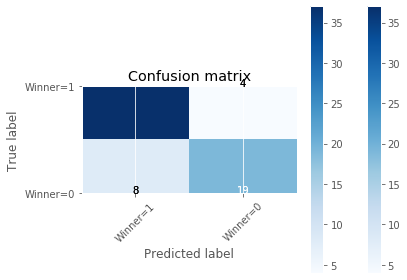

              precision    recall  f1-score   support

         0.0       0.83      0.70      0.76        27
         1.0       0.82      0.90      0.86        41

    accuracy                           0.82        68
   macro avg       0.82      0.80      0.81        68
weighted avg       0.82      0.82      0.82        68

LogLoss: : 0.55
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[23  8]
 [15 22]]
[[23  8]
 [15 22]]
45
Confusion matrix, without normalization
[[23  8]
 [15 22]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[23  8]
 [15 22]]
45
Mitjana encerts
45.4
desviació estandar
3.729164338919199


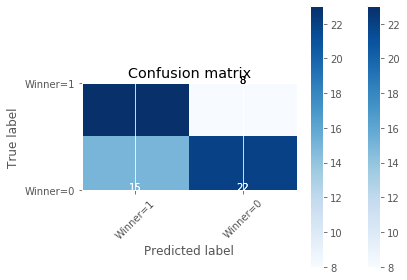

              precision    recall  f1-score   support

         0.0       0.73      0.59      0.66        37
         1.0       0.61      0.74      0.67        31

    accuracy                           0.66        68
   macro avg       0.67      0.67      0.66        68
weighted avg       0.67      0.66      0.66        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28  6]
 [14 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28  6]
 [14 20]]
48
Confusion matrix, without normalization
[[28  6]
 [14 20]]
[[28  6]
 [14 20]]
48
Mitjana encerts
45.483870967741936
desviació estandar
3.6971738791985556


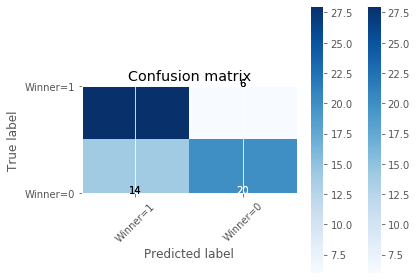

              precision    recall  f1-score   support

         0.0       0.77      0.59      0.67        34
         1.0       0.67      0.82      0.74        34

    accuracy                           0.71        68
   macro avg       0.72      0.71      0.70        68
weighted avg       0.72      0.71      0.70        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[33  9]
 [10 16]]
[[33  9]
 [10 16]]
49
Confusion matrix, without normalization
[[33  9]
 [10 16]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[33  9]
 [10 16]]
49
Mitjana encerts
45.59375
desviació estandar
3.6900150321509533


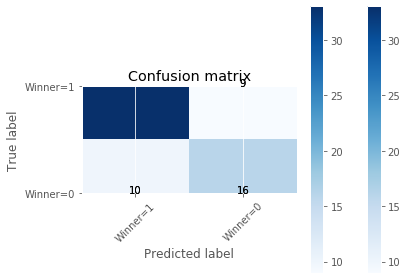

              precision    recall  f1-score   support

         0.0       0.64      0.62      0.63        26
         1.0       0.77      0.79      0.78        42

    accuracy                           0.72        68
   macro avg       0.70      0.70      0.70        68
weighted avg       0.72      0.72      0.72        68

LogLoss: : 0.57
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26 10]
 [16 16]]
[[26 10]
 [16 16]]
42
Confusion matrix, without normalization
[[26 10]
 [16 16]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26 10]
 [16 16]]
42
Mitjana encerts
45.484848484848484
desviació estandar
3.6855262534571565


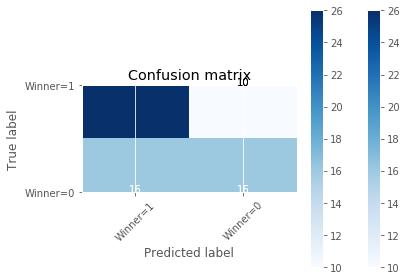

              precision    recall  f1-score   support

         0.0       0.62      0.50      0.55        32
         1.0       0.62      0.72      0.67        36

    accuracy                           0.62        68
   macro avg       0.62      0.61      0.61        68
weighted avg       0.62      0.62      0.61        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[25 10]
 [14 19]]
[[25 10]
 [14 19]]
44
Confusion matrix, without normalization
[[25 10]
 [14 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[25 10]
 [14 19]]
44
Mitjana encerts
45.44117647058823
desviació estandar
3.639579617536556


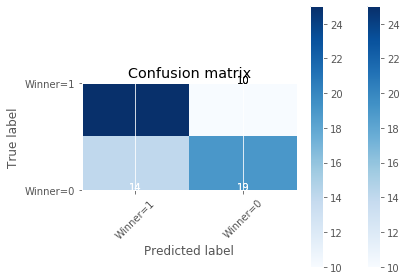

              precision    recall  f1-score   support

         0.0       0.66      0.58      0.61        33
         1.0       0.64      0.71      0.68        35

    accuracy                           0.65        68
   macro avg       0.65      0.65      0.64        68
weighted avg       0.65      0.65      0.65        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[23 12]
 [13 20]]
[[23 12]
 [13 20]]
43
Confusion matrix, without normalization
[[23 12]
 [13 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[23 12]
 [13 20]]
43
Mitjana encerts
45.371428571428574
desviació estandar
3.6101896609118893


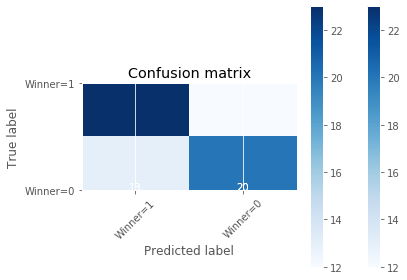

              precision    recall  f1-score   support

         0.0       0.62      0.61      0.62        33
         1.0       0.64      0.66      0.65        35

    accuracy                           0.63        68
   macro avg       0.63      0.63      0.63        68
weighted avg       0.63      0.63      0.63        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[37  6]
 [ 4 21]]
[[37  6]
 [ 4 21]]
58
Confusion matrix, without normalization
[[37  6]
 [ 4 21]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[37  6]
 [ 4 21]]
58
Mitjana encerts
45.72222222222222
desviació estandar
4.120484809064146


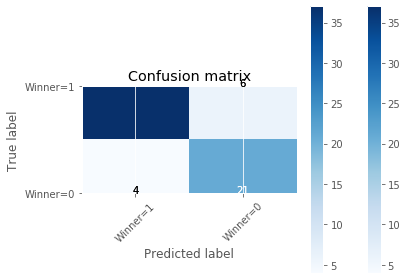

              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        25
         1.0       0.90      0.86      0.88        43

    accuracy                           0.85        68
   macro avg       0.84      0.85      0.84        68
weighted avg       0.86      0.85      0.85        68

LogLoss: : 0.54
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27  7]
 [11 23]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27  7]
 [11 23]]
50
Confusion matrix, without normalization
[[27  7]
 [11 23]]
[[27  7]
 [11 23]]
50
Mitjana encerts
45.83783783783784
desviació estandar
4.123194205975499


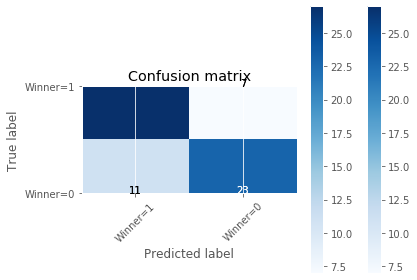

              precision    recall  f1-score   support

         0.0       0.77      0.68      0.72        34
         1.0       0.71      0.79      0.75        34

    accuracy                           0.74        68
   macro avg       0.74      0.74      0.73        68
weighted avg       0.74      0.74      0.73        68

LogLoss: : 0.57
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[21 11]
 [15 21]]
[[21 11]
 [15 21]]
42
Confusion matrix, without normalization
[[21 11]
 [15 21]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[21 11]
 [15 21]]
42
Mitjana encerts
45.73684210526316
desviació estandar
4.114699007514118


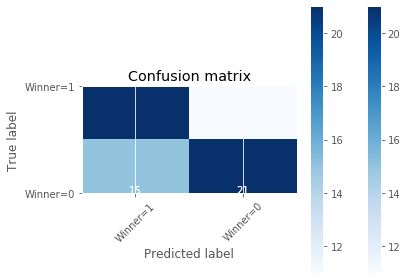

              precision    recall  f1-score   support

         0.0       0.66      0.58      0.62        36
         1.0       0.58      0.66      0.62        32

    accuracy                           0.62        68
   macro avg       0.62      0.62      0.62        68
weighted avg       0.62      0.62      0.62        68

LogLoss: : 0.67
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26  9]
 [12 21]]
[[26  9]
 [12 21]]
47
Confusion matrix, without normalization
[[26  9]
 [12 21]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26  9]
 [12 21]]
47
Mitjana encerts
45.76923076923077
desviació estandar
4.066508225969028


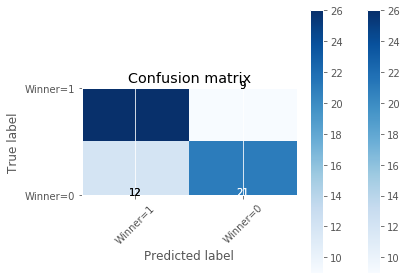

              precision    recall  f1-score   support

         0.0       0.70      0.64      0.67        33
         1.0       0.68      0.74      0.71        35

    accuracy                           0.69        68
   macro avg       0.69      0.69      0.69        68
weighted avg       0.69      0.69      0.69        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27 13]
 [ 7 21]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27 13]
 [ 7 21]]
48
Confusion matrix, without normalization
[[27 13]
 [ 7 21]]
[[27 13]
 [ 7 21]]
48
Mitjana encerts
45.825
desviació estandar
4.030431118379274


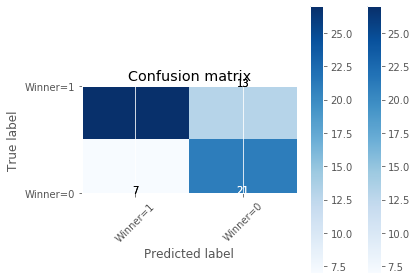

              precision    recall  f1-score   support

         0.0       0.62      0.75      0.68        28
         1.0       0.79      0.68      0.73        40

    accuracy                           0.71        68
   macro avg       0.71      0.71      0.70        68
weighted avg       0.72      0.71      0.71        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28  8]
 [11 21]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28  8]
 [11 21]]
49
Confusion matrix, without normalization
[[28  8]
 [11 21]]
[[28  8]
 [11 21]]
49
Mitjana encerts
45.90243902439025
desviació estandar
4.010990255740823


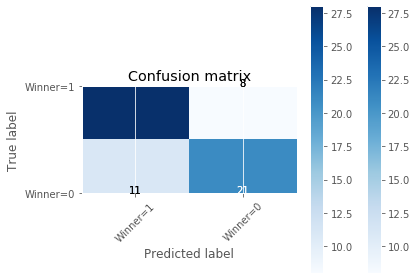

              precision    recall  f1-score   support

         0.0       0.72      0.66      0.69        32
         1.0       0.72      0.78      0.75        36

    accuracy                           0.72        68
   macro avg       0.72      0.72      0.72        68
weighted avg       0.72      0.72      0.72        68

LogLoss: : 0.58
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[32 10]
 [ 8 18]]
[[32 10]
 [ 8 18]]
50
Confusion matrix, without normalization
[[32 10]
 [ 8 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[32 10]
 [ 8 18]]
50
Mitjana encerts
46.0
desviació estandar
4.011887099014389


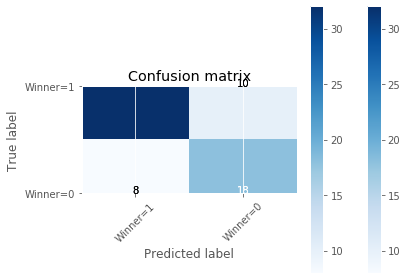

              precision    recall  f1-score   support

         0.0       0.64      0.69      0.67        26
         1.0       0.80      0.76      0.78        42

    accuracy                           0.74        68
   macro avg       0.72      0.73      0.72        68
weighted avg       0.74      0.74      0.74        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27 11]
 [13 17]]
[[27 11]
 [13 17]]
44
Confusion matrix, without normalization
[[27 11]
 [13 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27 11]
 [13 17]]
44
Mitjana encerts
45.95348837209303
desviació estandar
3.9764041742309764


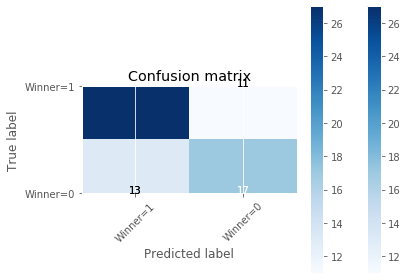

              precision    recall  f1-score   support

         0.0       0.61      0.57      0.59        30
         1.0       0.68      0.71      0.69        38

    accuracy                           0.65        68
   macro avg       0.64      0.64      0.64        68
weighted avg       0.65      0.65      0.65        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[32  6]
 [10 20]]
[[32  6]
 [10 20]]
52
Confusion matrix, without normalization
[[32  6]
 [10 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[32  6]
 [10 20]]
52
Mitjana encerts
46.09090909090909
desviació estandar
4.032922365967061


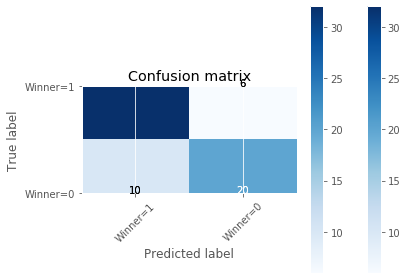

              precision    recall  f1-score   support

         0.0       0.77      0.67      0.71        30
         1.0       0.76      0.84      0.80        38

    accuracy                           0.76        68
   macro avg       0.77      0.75      0.76        68
weighted avg       0.77      0.76      0.76        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[32  7]
 [ 4 25]]
[[32  7]
 [ 4 25]]
57
Confusion matrix, without normalization
[[32  7]
 [ 4 25]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[32  7]
 [ 4 25]]
57
Mitjana encerts
46.333333333333336
desviació estandar
4.29987079909256


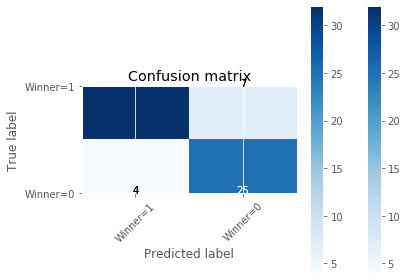

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82        29
         1.0       0.89      0.82      0.85        39

    accuracy                           0.84        68
   macro avg       0.84      0.84      0.84        68
weighted avg       0.84      0.84      0.84        68

LogLoss: : 0.52
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29  7]
 [13 19]]
[[29  7]
 [13 19]]
48
Confusion matrix, without normalization
[[29  7]
 [13 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29  7]
 [13 19]]
48
Mitjana encerts
46.369565217391305
desviació estandar
4.259815752558635


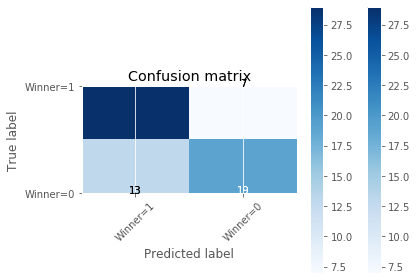

              precision    recall  f1-score   support

         0.0       0.73      0.59      0.66        32
         1.0       0.69      0.81      0.74        36

    accuracy                           0.71        68
   macro avg       0.71      0.70      0.70        68
weighted avg       0.71      0.71      0.70        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[22  9]
 [14 23]]
[[22  9]
 [14 23]]
45
Confusion matrix, without normalization
[[22  9]
 [14 23]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[22  9]
 [14 23]]
45
Mitjana encerts
46.340425531914896
desviació estandar
4.218886591772969


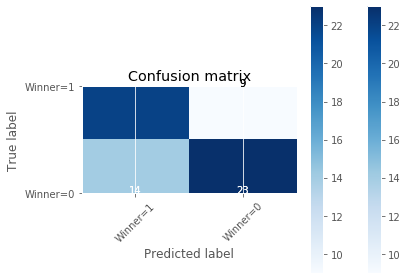

              precision    recall  f1-score   support

         0.0       0.72      0.62      0.67        37
         1.0       0.61      0.71      0.66        31

    accuracy                           0.66        68
   macro avg       0.66      0.67      0.66        68
weighted avg       0.67      0.66      0.66        68

LogLoss: : 0.65
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27 14]
 [ 5 22]]
[[27 14]
 [ 5 22]]
49
Confusion matrix, without normalization
[[27 14]
 [ 5 22]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27 14]
 [ 5 22]]
49
Mitjana encerts
46.395833333333336
desviació estandar
4.191954512979463


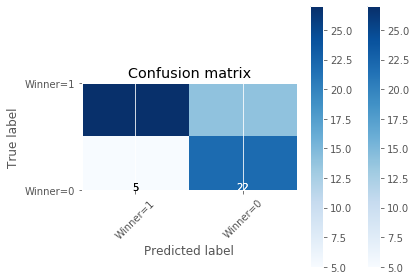

              precision    recall  f1-score   support

         0.0       0.61      0.81      0.70        27
         1.0       0.84      0.66      0.74        41

    accuracy                           0.72        68
   macro avg       0.73      0.74      0.72        68
weighted avg       0.75      0.72      0.72        68

LogLoss: : 0.58
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28  7]
 [15 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28  7]
 [15 18]]
46
Confusion matrix, without normalization
[[28  7]
 [15 18]]
[[28  7]
 [15 18]]
46
Mitjana encerts
46.38775510204081
desviació estandar
4.149336443290279


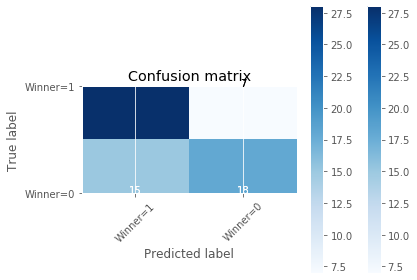

              precision    recall  f1-score   support

         0.0       0.72      0.55      0.62        33
         1.0       0.65      0.80      0.72        35

    accuracy                           0.68        68
   macro avg       0.69      0.67      0.67        68
weighted avg       0.68      0.68      0.67        68

LogLoss: : 0.68
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[31 13]
 [ 7 17]]
[[31 13]
 [ 7 17]]
48
Confusion matrix, without normalization
[[31 13]
 [ 7 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[31 13]
 [ 7 17]]
48
Mitjana encerts
46.42
desviació estandar
4.1138303319412675


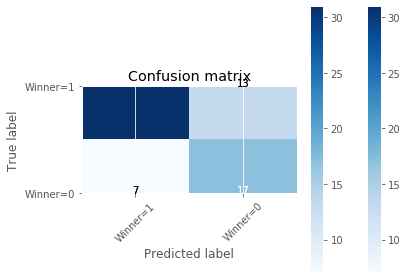

              precision    recall  f1-score   support

         0.0       0.57      0.71      0.63        24
         1.0       0.82      0.70      0.76        44

    accuracy                           0.71        68
   macro avg       0.69      0.71      0.69        68
weighted avg       0.73      0.71      0.71        68

LogLoss: : 0.54
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[31 12]
 [12 13]]
[[31 12]
 [12 13]]
44
Confusion matrix, without normalization
[[31 12]
 [12 13]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[31 12]
 [12 13]]
44
Mitjana encerts
46.372549019607845
desviació estandar
4.087094870796516


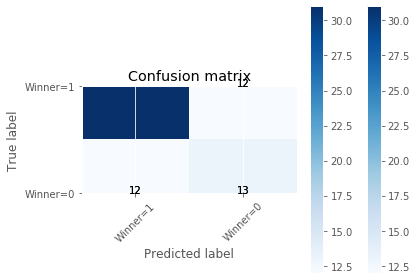

              precision    recall  f1-score   support

         0.0       0.52      0.52      0.52        25
         1.0       0.72      0.72      0.72        43

    accuracy                           0.65        68
   macro avg       0.62      0.62      0.62        68
weighted avg       0.65      0.65      0.65        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27 11]
 [13 17]]
[[27 11]
 [13 17]]
44
Confusion matrix, without normalization
[[27 11]
 [13 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27 11]
 [13 17]]
44
Mitjana encerts
46.32692307692308
desviació estandar
4.06069884969681


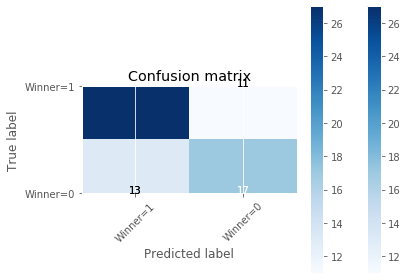

              precision    recall  f1-score   support

         0.0       0.61      0.57      0.59        30
         1.0       0.68      0.71      0.69        38

    accuracy                           0.65        68
   macro avg       0.64      0.64      0.64        68
weighted avg       0.65      0.65      0.65        68

LogLoss: : 0.65
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28 10]
 [11 19]]
[[28 10]
 [11 19]]
47
Confusion matrix, without normalization
[[28 10]
 [11 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28 10]
 [11 19]]
47
Mitjana encerts
46.339622641509436
desviació estandar
4.023250334471743


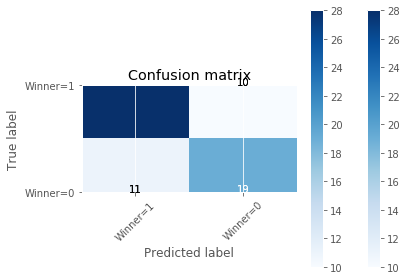

              precision    recall  f1-score   support

         0.0       0.66      0.63      0.64        30
         1.0       0.72      0.74      0.73        38

    accuracy                           0.69        68
   macro avg       0.69      0.69      0.69        68
weighted avg       0.69      0.69      0.69        68

LogLoss: : 0.66
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30  7]
 [ 7 24]]
[[30  7]
 [ 7 24]]
54
Confusion matrix, without normalization
[[30  7]
 [ 7 24]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30  7]
 [ 7 24]]
54
Mitjana encerts
46.48148148148148
desviació estandar
4.1174459034910935


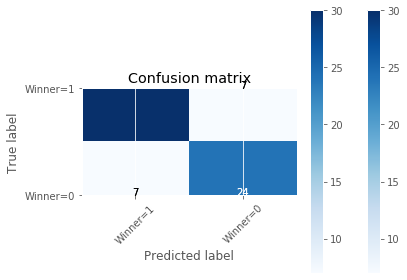

              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77        31
         1.0       0.81      0.81      0.81        37

    accuracy                           0.79        68
   macro avg       0.79      0.79      0.79        68
weighted avg       0.79      0.79      0.79        68

LogLoss: : 0.58
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28 11]
 [11 18]]
[[28 11]
 [11 18]]
46
Confusion matrix, without normalization
[[28 11]
 [11 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28 11]
 [11 18]]
46
Mitjana encerts
46.472727272727276
desviació estandar
4.080350009294191


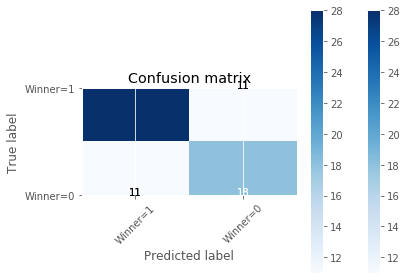

              precision    recall  f1-score   support

         0.0       0.62      0.62      0.62        29
         1.0       0.72      0.72      0.72        39

    accuracy                           0.68        68
   macro avg       0.67      0.67      0.67        68
weighted avg       0.68      0.68      0.68        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29  8]
 [12 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29  8]
 [12 19]]
48
Confusion matrix, without normalization
[[29  8]
 [12 19]]
[[29  8]
 [12 19]]
48
Mitjana encerts
46.5
desviació estandar
4.048809348790968


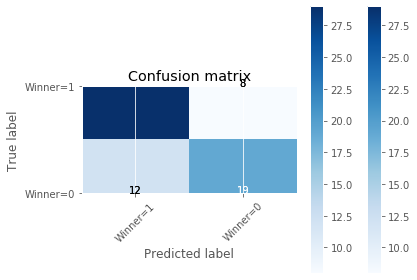

              precision    recall  f1-score   support

         0.0       0.70      0.61      0.66        31
         1.0       0.71      0.78      0.74        37

    accuracy                           0.71        68
   macro avg       0.71      0.70      0.70        68
weighted avg       0.71      0.71      0.70        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28  5]
 [ 9 26]]
[[28  5]
 [ 9 26]]
54
Confusion matrix, without normalization
[[28  5]
 [ 9 26]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28  5]
 [ 9 26]]
54
Mitjana encerts
46.63157894736842
desviació estandar
4.132165563450636


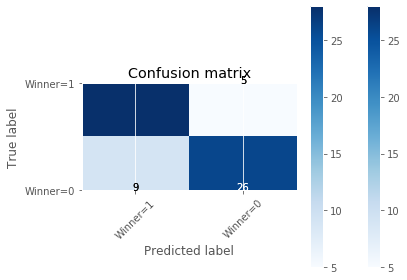

              precision    recall  f1-score   support

         0.0       0.84      0.74      0.79        35
         1.0       0.76      0.85      0.80        33

    accuracy                           0.79        68
   macro avg       0.80      0.80      0.79        68
weighted avg       0.80      0.79      0.79        68

LogLoss: : 0.57
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[25  8]
 [12 23]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[25  8]
 [12 23]]
48
Confusion matrix, without normalization
[[25  8]
 [12 23]]
[[25  8]
 [12 23]]
48
Mitjana encerts
46.6551724137931
desviació estandar
4.100259555022016


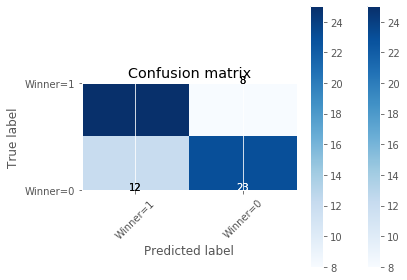

              precision    recall  f1-score   support

         0.0       0.74      0.66      0.70        35
         1.0       0.68      0.76      0.71        33

    accuracy                           0.71        68
   macro avg       0.71      0.71      0.71        68
weighted avg       0.71      0.71      0.71        68

LogLoss: : 0.58
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27 15]
 [12 14]]
[[27 15]
 [12 14]]
41
Confusion matrix, without normalization
[[27 15]
 [12 14]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27 15]
 [12 14]]
41
Mitjana encerts
46.559322033898304
desviació estandar
4.130380154214388


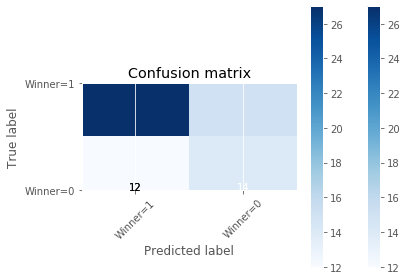

              precision    recall  f1-score   support

         0.0       0.48      0.54      0.51        26
         1.0       0.69      0.64      0.67        42

    accuracy                           0.60        68
   macro avg       0.59      0.59      0.59        68
weighted avg       0.61      0.60      0.61        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29  6]
 [ 9 24]]
[[29  6]
 [ 9 24]]
53
Confusion matrix, without normalization
[[29  6]
 [ 9 24]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29  6]
 [ 9 24]]
53
Mitjana encerts
46.666666666666664
desviació estandar
4.1779846284489315


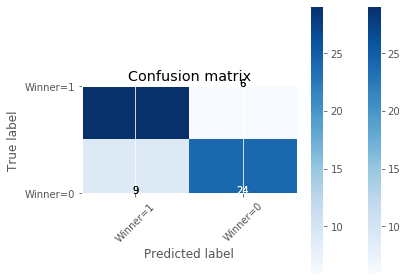

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        33
         1.0       0.76      0.83      0.79        35

    accuracy                           0.78        68
   macro avg       0.78      0.78      0.78        68
weighted avg       0.78      0.78      0.78        68

LogLoss: : 0.56
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[33 10]
 [10 15]]
[[33 10]
 [10 15]]
48
Confusion matrix, without normalization
[[33 10]
 [10 15]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[33 10]
 [10 15]]
48
Mitjana encerts
46.68852459016394
desviació estandar
4.147054983513067


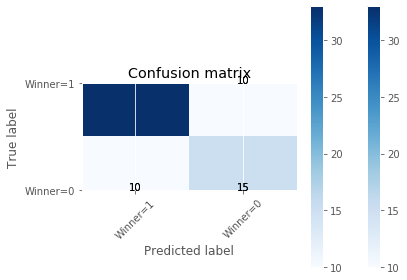

              precision    recall  f1-score   support

         0.0       0.60      0.60      0.60        25
         1.0       0.77      0.77      0.77        43

    accuracy                           0.71        68
   macro avg       0.68      0.68      0.68        68
weighted avg       0.71      0.71      0.71        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[31 14]
 [ 9 14]]
[[31 14]
 [ 9 14]]
45
Confusion matrix, without normalization
[[31 14]
 [ 9 14]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[31 14]
 [ 9 14]]
45
Mitjana encerts
46.66129032258065
desviació estandar
4.118970856380607


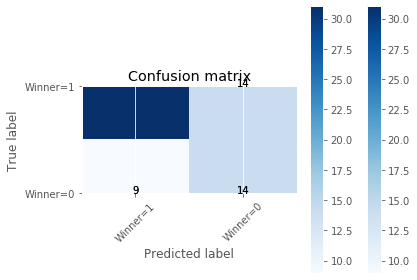

              precision    recall  f1-score   support

         0.0       0.50      0.61      0.55        23
         1.0       0.78      0.69      0.73        45

    accuracy                           0.66        68
   macro avg       0.64      0.65      0.64        68
weighted avg       0.68      0.66      0.67        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[23 11]
 [12 22]]
[[23 11]
 [12 22]]
45
Confusion matrix, without normalization
[[23 11]
 [12 22]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[23 11]
 [12 22]]
45
Mitjana encerts
46.63492063492063
desviació estandar
4.091421871453629


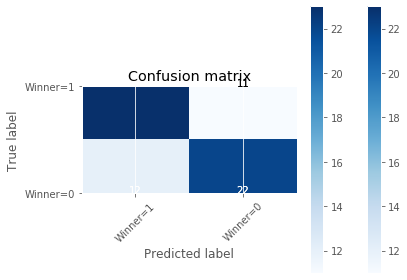

              precision    recall  f1-score   support

         0.0       0.67      0.65      0.66        34
         1.0       0.66      0.68      0.67        34

    accuracy                           0.66        68
   macro avg       0.66      0.66      0.66        68
weighted avg       0.66      0.66      0.66        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[23 14]
 [ 9 22]]
[[23 14]
 [ 9 22]]
45
Confusion matrix, without normalization
[[23 14]
 [ 9 22]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[23 14]
 [ 9 22]]
45
Mitjana encerts
46.609375
desviació estandar
4.0643925879982366


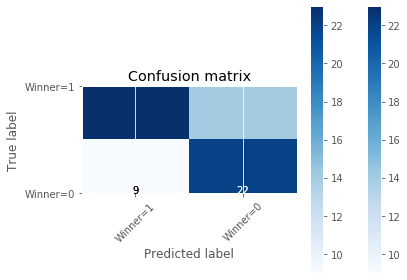

              precision    recall  f1-score   support

         0.0       0.61      0.71      0.66        31
         1.0       0.72      0.62      0.67        37

    accuracy                           0.66        68
   macro avg       0.66      0.67      0.66        68
weighted avg       0.67      0.66      0.66        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[20 21]
 [ 9 18]]
[[20 21]
 [ 9 18]]
38
Confusion matrix, without normalization
[[20 21]
 [ 9 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[20 21]
 [ 9 18]]
38
Mitjana encerts
46.47692307692308
desviació estandar
4.169883570806605


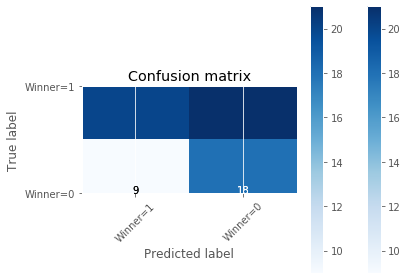

              precision    recall  f1-score   support

         0.0       0.46      0.67      0.55        27
         1.0       0.69      0.49      0.57        41

    accuracy                           0.56        68
   macro avg       0.58      0.58      0.56        68
weighted avg       0.60      0.56      0.56        68

LogLoss: : 0.72
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[23 12]
 [11 22]]
[[23 12]
 [11 22]]
45
Confusion matrix, without normalization
[[23 12]
 [11 22]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[23 12]
 [11 22]]
45
Mitjana encerts
46.45454545454545
desviació estandar
4.142103909052552


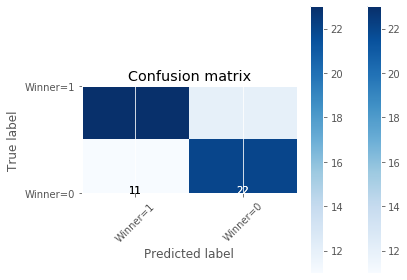

              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66        33
         1.0       0.68      0.66      0.67        35

    accuracy                           0.66        68
   macro avg       0.66      0.66      0.66        68
weighted avg       0.66      0.66      0.66        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[25 14]
 [10 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[25 14]
 [10 19]]
44
Confusion matrix, without normalization
[[25 14]
 [10 19]]
[[25 14]
 [10 19]]
44
Mitjana encerts
46.417910447761194
desviació estandar
4.12183575147405


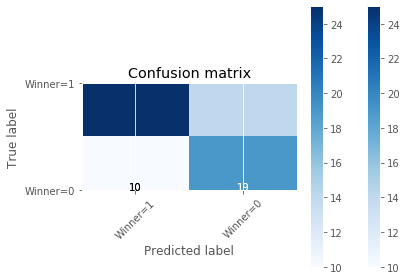

              precision    recall  f1-score   support

         0.0       0.58      0.66      0.61        29
         1.0       0.71      0.64      0.68        39

    accuracy                           0.65        68
   macro avg       0.65      0.65      0.64        68
weighted avg       0.66      0.65      0.65        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[32  9]
 [10 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[32  9]
 [10 17]]
49
Confusion matrix, without normalization
[[32  9]
 [10 17]]
[[32  9]
 [10 17]]
49
Mitjana encerts
46.455882352941174
desviació estandar
4.103204714285608


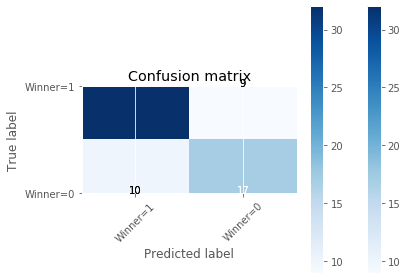

              precision    recall  f1-score   support

         0.0       0.65      0.63      0.64        27
         1.0       0.76      0.78      0.77        41

    accuracy                           0.72        68
   macro avg       0.71      0.71      0.71        68
weighted avg       0.72      0.72      0.72        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30 10]
 [ 9 19]]
[[30 10]
 [ 9 19]]
49
Confusion matrix, without normalization
[[30 10]
 [ 9 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30 10]
 [ 9 19]]
49
Mitjana encerts
46.492753623188406
desviació estandar
4.08469461511124


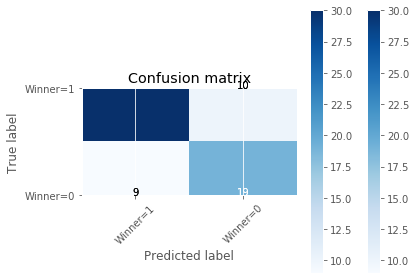

              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67        28
         1.0       0.77      0.75      0.76        40

    accuracy                           0.72        68
   macro avg       0.71      0.71      0.71        68
weighted avg       0.72      0.72      0.72        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30  8]
 [10 20]]
[[30  8]
 [10 20]]
50
Confusion matrix, without normalization
[[30  8]
 [10 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30  8]
 [10 20]]
50
Mitjana encerts
46.542857142857144
desviació estandar
4.076713362101227


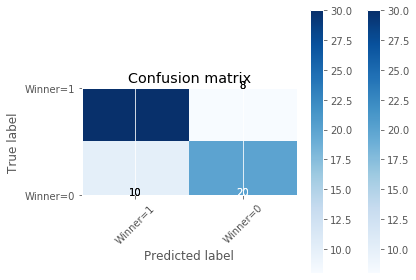

              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69        30
         1.0       0.75      0.79      0.77        38

    accuracy                           0.74        68
   macro avg       0.73      0.73      0.73        68
weighted avg       0.73      0.74      0.73        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[24 14]
 [10 20]]
[[24 14]
 [10 20]]
44
Confusion matrix, without normalization
[[24 14]
 [10 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[24 14]
 [10 20]]
44
Mitjana encerts
46.50704225352113
desviació estandar
4.058978014148562


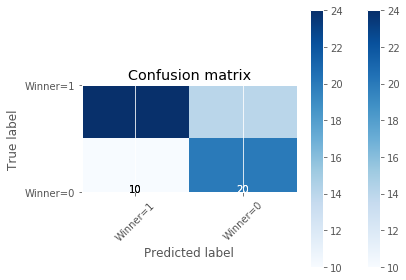

              precision    recall  f1-score   support

         0.0       0.59      0.67      0.62        30
         1.0       0.71      0.63      0.67        38

    accuracy                           0.65        68
   macro avg       0.65      0.65      0.65        68
weighted avg       0.65      0.65      0.65        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[32 11]
 [ 9 16]]
[[32 11]
 [ 9 16]]
48
Confusion matrix, without normalization
[[32 11]
 [ 9 16]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[32 11]
 [ 9 16]]
48
Mitjana encerts
46.52777777777778
desviació estandar
4.034477187051564


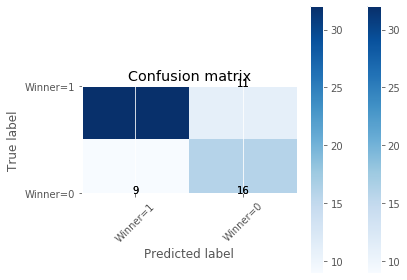

              precision    recall  f1-score   support

         0.0       0.59      0.64      0.62        25
         1.0       0.78      0.74      0.76        43

    accuracy                           0.71        68
   macro avg       0.69      0.69      0.69        68
weighted avg       0.71      0.71      0.71        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[37  6]
 [10 15]]
[[37  6]
 [10 15]]
52
Confusion matrix, without normalization
[[37  6]
 [10 15]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[37  6]
 [10 15]]
52
Mitjana encerts
46.602739726027394
desviació estandar
4.056922803170846


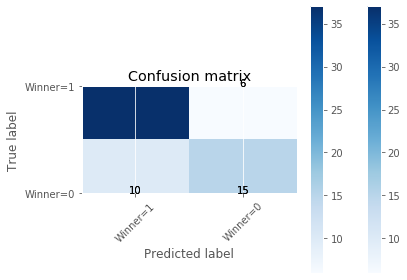

              precision    recall  f1-score   support

         0.0       0.71      0.60      0.65        25
         1.0       0.79      0.86      0.82        43

    accuracy                           0.76        68
   macro avg       0.75      0.73      0.74        68
weighted avg       0.76      0.76      0.76        68

LogLoss: : 0.57
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26 10]
 [11 21]]
[[26 10]
 [11 21]]
47
Confusion matrix, without normalization
[[26 10]
 [11 21]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26 10]
 [11 21]]
47
Mitjana encerts
46.608108108108105
desviació estandar
4.02967897442976


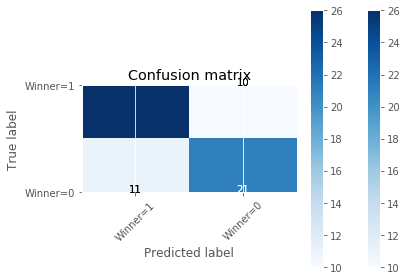

              precision    recall  f1-score   support

         0.0       0.68      0.66      0.67        32
         1.0       0.70      0.72      0.71        36

    accuracy                           0.69        68
   macro avg       0.69      0.69      0.69        68
weighted avg       0.69      0.69      0.69        68

LogLoss: : 0.65
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26  8]
 [12 22]]
[[26  8]
 [12 22]]
48
Confusion matrix, without normalization
[[26  8]
 [12 22]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26  8]
 [12 22]]
48
Mitjana encerts
46.626666666666665
desviació estandar
4.005906749899315


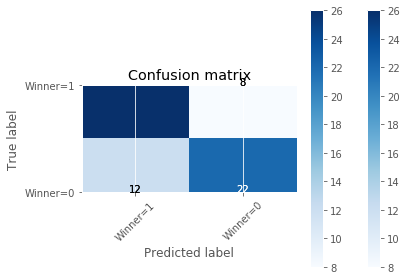

              precision    recall  f1-score   support

         0.0       0.73      0.65      0.69        34
         1.0       0.68      0.76      0.72        34

    accuracy                           0.71        68
   macro avg       0.71      0.71      0.70        68
weighted avg       0.71      0.71      0.70        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29  6]
 [14 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29  6]
 [14 19]]
48
Confusion matrix, without normalization
[[29  6]
 [14 19]]
[[29  6]
 [14 19]]
48
Mitjana encerts
46.64473684210526
desviació estandar
3.982540670715845


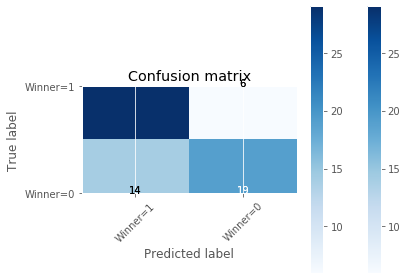

              precision    recall  f1-score   support

         0.0       0.76      0.58      0.66        33
         1.0       0.67      0.83      0.74        35

    accuracy                           0.71        68
   macro avg       0.72      0.70      0.70        68
weighted avg       0.72      0.71      0.70        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29 11]
 [ 7 21]]
[[29 11]
 [ 7 21]]
50
Confusion matrix, without normalization
[[29 11]
 [ 7 21]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29 11]
 [ 7 21]]
50
Mitjana encerts
46.688311688311686
desviació estandar
3.974789842552785


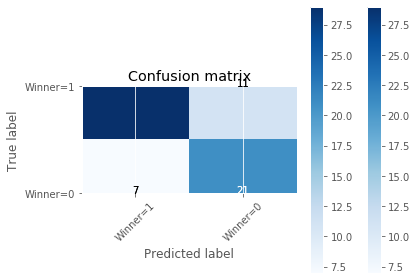

              precision    recall  f1-score   support

         0.0       0.66      0.75      0.70        28
         1.0       0.81      0.72      0.76        40

    accuracy                           0.74        68
   macro avg       0.73      0.74      0.73        68
weighted avg       0.74      0.74      0.74        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[32  9]
 [ 6 21]]
[[32  9]
 [ 6 21]]
53
Confusion matrix, without normalization
[[32  9]
 [ 6 21]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[32  9]
 [ 6 21]]
53
Mitjana encerts
46.76923076923077
desviació estandar
4.012554263306146


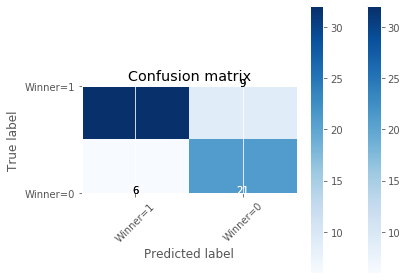

              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74        27
         1.0       0.84      0.78      0.81        41

    accuracy                           0.78        68
   macro avg       0.77      0.78      0.77        68
weighted avg       0.79      0.78      0.78        68

LogLoss: : 0.58
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[32  7]
 [10 19]]
[[32  7]
 [10 19]]
51
Confusion matrix, without normalization
[[32  7]
 [10 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[32  7]
 [10 19]]
51
Mitjana encerts
46.822784810126585
desviació estandar
4.015033438298534


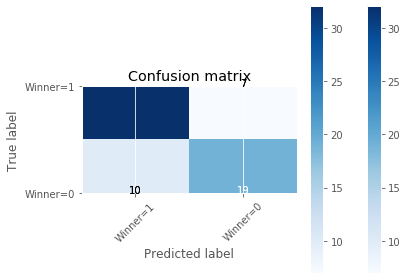

              precision    recall  f1-score   support

         0.0       0.73      0.66      0.69        29
         1.0       0.76      0.82      0.79        39

    accuracy                           0.75        68
   macro avg       0.75      0.74      0.74        68
weighted avg       0.75      0.75      0.75        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30 13]
 [13 12]]
[[30 13]
 [13 12]]
42
Confusion matrix, without normalization
[[30 13]
 [13 12]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30 13]
 [13 12]]
42
Mitjana encerts
46.7625
desviació estandar
4.025679290504896


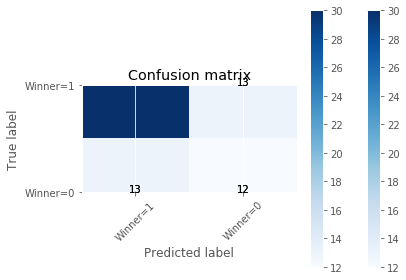

              precision    recall  f1-score   support

         0.0       0.48      0.48      0.48        25
         1.0       0.70      0.70      0.70        43

    accuracy                           0.62        68
   macro avg       0.59      0.59      0.59        68
weighted avg       0.62      0.62      0.62        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[36  5]
 [15 12]]
[[36  5]
 [15 12]]
48
Confusion matrix, without normalization
[[36  5]
 [15 12]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[36  5]
 [15 12]]
48
Mitjana encerts
46.77777777777778
desviació estandar
4.003085229922627


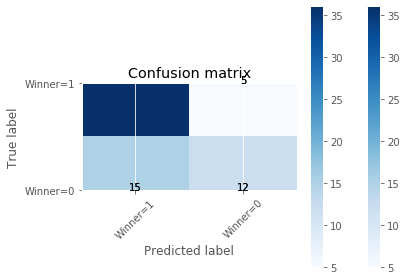

              precision    recall  f1-score   support

         0.0       0.71      0.44      0.55        27
         1.0       0.71      0.88      0.78        41

    accuracy                           0.71        68
   macro avg       0.71      0.66      0.66        68
weighted avg       0.71      0.71      0.69        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[32  8]
 [13 15]]
[[32  8]
 [13 15]]
47
Confusion matrix, without normalization
[[32  8]
 [13 15]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[32  8]
 [13 15]]
47
Mitjana encerts
46.78048780487805
desviació estandar
3.9786760582737255


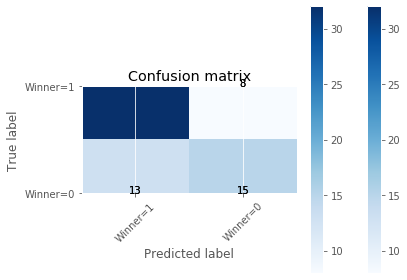

              precision    recall  f1-score   support

         0.0       0.65      0.54      0.59        28
         1.0       0.71      0.80      0.75        40

    accuracy                           0.69        68
   macro avg       0.68      0.67      0.67        68
weighted avg       0.69      0.69      0.69        68

LogLoss: : 0.58
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29 10]
 [11 18]]
[[29 10]
 [11 18]]
47
Confusion matrix, without normalization
[[29 10]
 [11 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29 10]
 [11 18]]
47
Mitjana encerts
46.78313253012048
desviació estandar
3.9547080155758483


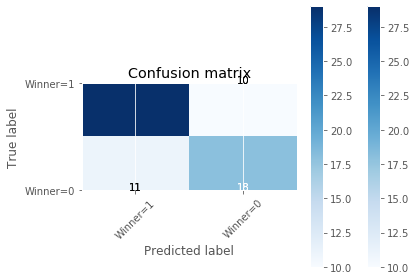

              precision    recall  f1-score   support

         0.0       0.64      0.62      0.63        29
         1.0       0.72      0.74      0.73        39

    accuracy                           0.69        68
   macro avg       0.68      0.68      0.68        68
weighted avg       0.69      0.69      0.69        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27 12]
 [11 18]]
[[27 12]
 [11 18]]
45
Confusion matrix, without normalization
[[27 12]
 [11 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27 12]
 [11 18]]
45
Mitjana encerts
46.76190476190476
desviació estandar
3.9358518398455264


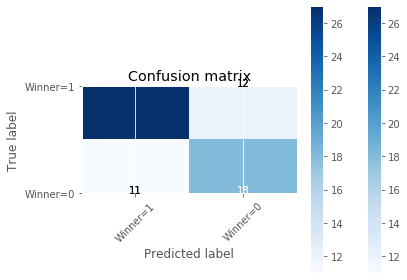

              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61        29
         1.0       0.71      0.69      0.70        39

    accuracy                           0.66        68
   macro avg       0.66      0.66      0.66        68
weighted avg       0.66      0.66      0.66        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26 13]
 [12 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26 13]
 [12 17]]
43
Confusion matrix, without normalization
[[26 13]
 [12 17]]
[[26 13]
 [12 17]]
43
Mitjana encerts
46.71764705882353
desviació estandar
3.9336011481948168


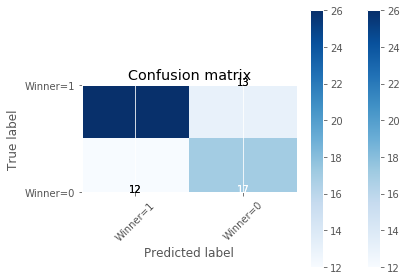

              precision    recall  f1-score   support

         0.0       0.57      0.59      0.58        29
         1.0       0.68      0.67      0.68        39

    accuracy                           0.63        68
   macro avg       0.63      0.63      0.63        68
weighted avg       0.63      0.63      0.63        68

LogLoss: : 0.65
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27 11]
 [18 12]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27 11]
 [18 12]]
39
Confusion matrix, without normalization
[[27 11]
 [18 12]]
[[27 11]
 [18 12]]
39
Mitjana encerts
46.627906976744185
desviació estandar
3.997227270472845


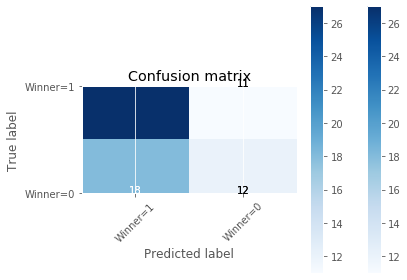

              precision    recall  f1-score   support

         0.0       0.52      0.40      0.45        30
         1.0       0.60      0.71      0.65        38

    accuracy                           0.57        68
   macro avg       0.56      0.56      0.55        68
weighted avg       0.57      0.57      0.56        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28 12]
 [ 8 20]]
[[28 12]
 [ 8 20]]
48
Confusion matrix, without normalization
[[28 12]
 [ 8 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28 12]
 [ 8 20]]
48
Mitjana encerts
46.64367816091954
desviació estandar
3.9768786104967426


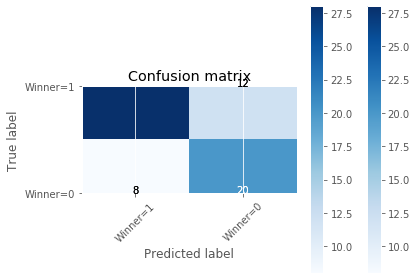

              precision    recall  f1-score   support

         0.0       0.62      0.71      0.67        28
         1.0       0.78      0.70      0.74        40

    accuracy                           0.71        68
   macro avg       0.70      0.71      0.70        68
weighted avg       0.71      0.71      0.71        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30  6]
 [12 20]]
[[30  6]
 [12 20]]
50
Confusion matrix, without normalization
[[30  6]
 [12 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30  6]
 [12 20]]
50
Mitjana encerts
46.68181818181818
desviació estandar
3.9701884960559335


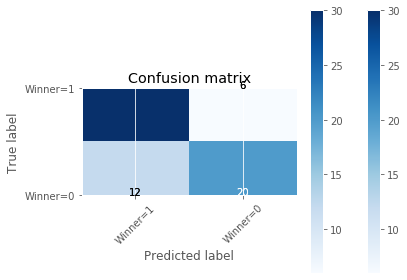

              precision    recall  f1-score   support

         0.0       0.77      0.62      0.69        32
         1.0       0.71      0.83      0.77        36

    accuracy                           0.74        68
   macro avg       0.74      0.73      0.73        68
weighted avg       0.74      0.74      0.73        68

LogLoss: : 0.57
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[24 14]
 [14 16]]
[[24 14]
 [14 16]]
40
Confusion matrix, without normalization
[[24 14]
 [14 16]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[24 14]
 [14 16]]
40
Mitjana encerts
46.60674157303371
desviació estandar
4.0101499804620495


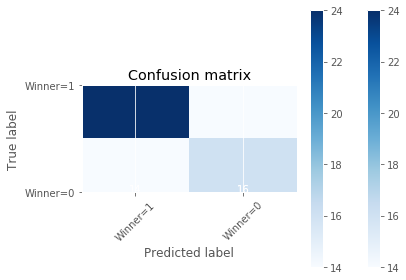

              precision    recall  f1-score   support

         0.0       0.53      0.53      0.53        30
         1.0       0.63      0.63      0.63        38

    accuracy                           0.59        68
   macro avg       0.58      0.58      0.58        68
weighted avg       0.59      0.59      0.59        68

LogLoss: : 0.69
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29  8]
 [12 19]]
[[29  8]
 [12 19]]
48
Confusion matrix, without normalization
[[29  8]
 [12 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29  8]
 [12 19]]
48
Mitjana encerts
46.62222222222222
desviació estandar
3.9904825043199916


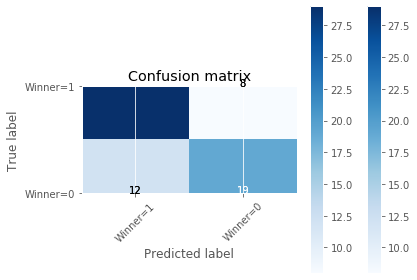

              precision    recall  f1-score   support

         0.0       0.70      0.61      0.66        31
         1.0       0.71      0.78      0.74        37

    accuracy                           0.71        68
   macro avg       0.71      0.70      0.70        68
weighted avg       0.71      0.71      0.70        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29  9]
 [ 9 21]]
[[29  9]
 [ 9 21]]
50
Confusion matrix, without normalization
[[29  9]
 [ 9 21]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29  9]
 [ 9 21]]
50
Mitjana encerts
46.65934065934066
desviació estandar
3.9840886288626325


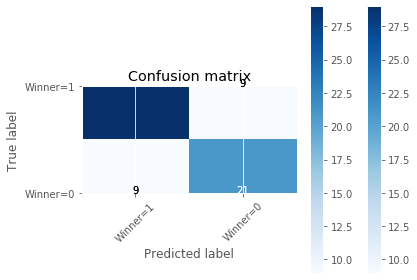

              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        30
         1.0       0.76      0.76      0.76        38

    accuracy                           0.74        68
   macro avg       0.73      0.73      0.73        68
weighted avg       0.74      0.74      0.74        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29  9]
 [13 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29  9]
 [13 17]]
46
Confusion matrix, without normalization
[[29  9]
 [13 17]]
[[29  9]
 [13 17]]
46
Mitjana encerts
46.65217391304348
desviació estandar
3.962966561775944


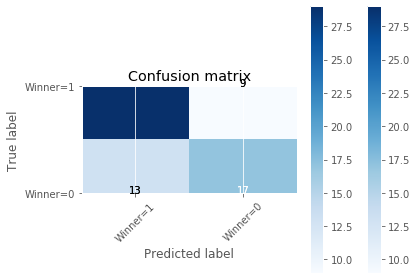

              precision    recall  f1-score   support

         0.0       0.65      0.57      0.61        30
         1.0       0.69      0.76      0.72        38

    accuracy                           0.68        68
   macro avg       0.67      0.66      0.67        68
weighted avg       0.67      0.68      0.67        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29  9]
 [12 18]]
[[29  9]
 [12 18]]
47
Confusion matrix, without normalization
[[29  9]
 [12 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29  9]
 [12 18]]
47
Mitjana encerts
46.655913978494624
desviació estandar
3.9417659479349134


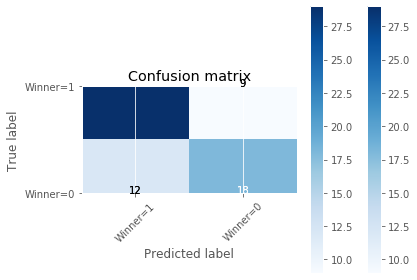

              precision    recall  f1-score   support

         0.0       0.67      0.60      0.63        30
         1.0       0.71      0.76      0.73        38

    accuracy                           0.69        68
   macro avg       0.69      0.68      0.68        68
weighted avg       0.69      0.69      0.69        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[34 10]
 [ 8 16]]
[[34 10]
 [ 8 16]]
50
Confusion matrix, without normalization
[[34 10]
 [ 8 16]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[34 10]
 [ 8 16]]
50
Mitjana encerts
46.691489361702125
desviació estandar
3.935724529109699


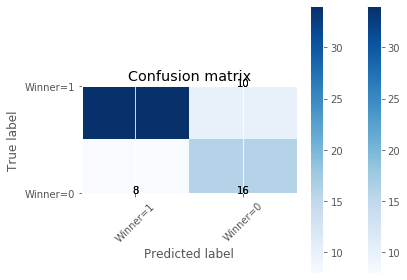

              precision    recall  f1-score   support

         0.0       0.62      0.67      0.64        24
         1.0       0.81      0.77      0.79        44

    accuracy                           0.74        68
   macro avg       0.71      0.72      0.72        68
weighted avg       0.74      0.74      0.74        68

LogLoss: : 0.55
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[25  8]
 [10 25]]
[[25  8]
 [10 25]]
50
Confusion matrix, without normalization
[[25  8]
 [10 25]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[25  8]
 [10 25]]
50
Mitjana encerts
46.72631578947368
desviació estandar
3.929489334072915


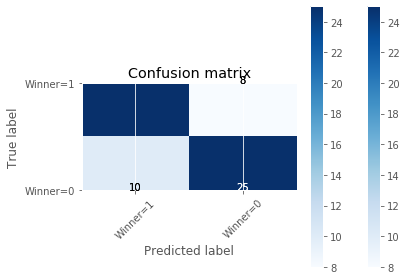

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.74        35
         1.0       0.71      0.76      0.74        33

    accuracy                           0.74        68
   macro avg       0.74      0.74      0.74        68
weighted avg       0.74      0.74      0.74        68

LogLoss: : 0.65
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[20 13]
 [ 9 26]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[20 13]
 [ 9 26]]
46
Confusion matrix, without normalization
[[20 13]
 [ 9 26]]
[[20 13]
 [ 9 26]]
46
Mitjana encerts
46.71875
desviació estandar
3.9096651737499637


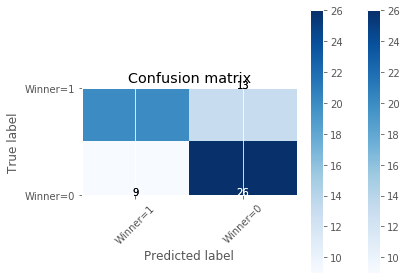

              precision    recall  f1-score   support

         0.0       0.67      0.74      0.70        35
         1.0       0.69      0.61      0.65        33

    accuracy                           0.68        68
   macro avg       0.68      0.67      0.67        68
weighted avg       0.68      0.68      0.67        68

LogLoss: : 0.66
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[37  8]
 [ 6 17]]
[[37  8]
 [ 6 17]]
54
Confusion matrix, without normalization
[[37  8]
 [ 6 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[37  8]
 [ 6 17]]
54
Mitjana encerts
46.79381443298969
desviació estandar
3.958387009647011


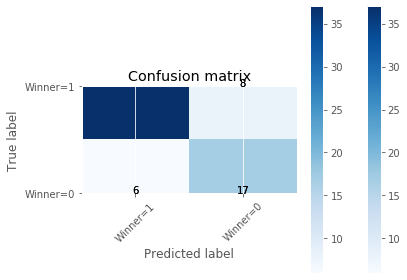

              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71        23
         1.0       0.86      0.82      0.84        45

    accuracy                           0.79        68
   macro avg       0.77      0.78      0.77        68
weighted avg       0.80      0.79      0.80        68

LogLoss: : 0.53
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30  8]
 [12 18]]
[[30  8]
 [12 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


48
Confusion matrix, without normalization
[[30  8]
 [12 18]]
[[30  8]
 [12 18]]
48
Mitjana encerts
46.80612244897959
desviació estandar
3.9400045666225116


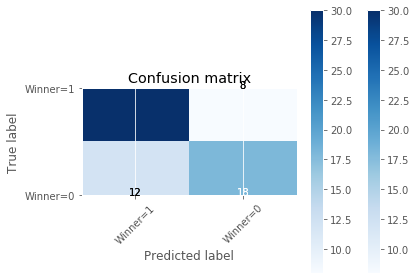

              precision    recall  f1-score   support

         0.0       0.69      0.60      0.64        30
         1.0       0.71      0.79      0.75        38

    accuracy                           0.71        68
   macro avg       0.70      0.69      0.70        68
weighted avg       0.70      0.71      0.70        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29 10]
 [12 17]]
[[29 10]
 [12 17]]
46
Confusion matrix, without normalization
[[29 10]
 [12 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29 10]
 [12 17]]
46
Mitjana encerts
46.7979797979798
desviació estandar
3.9208837335627704


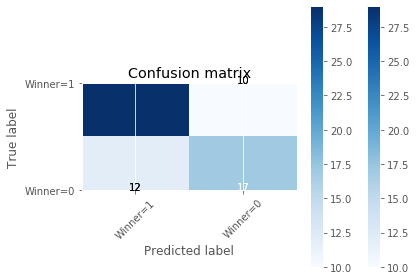

              precision    recall  f1-score   support

         0.0       0.63      0.59      0.61        29
         1.0       0.71      0.74      0.72        39

    accuracy                           0.68        68
   macro avg       0.67      0.66      0.67        68
weighted avg       0.67      0.68      0.67        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26  8]
 [11 23]]
[[26  8]
 [11 23]]
49
Confusion matrix, without normalization
[[26  8]
 [11 23]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26  8]
 [11 23]]
49
Mitjana encerts
46.82
desviació estandar
3.9073776372395845


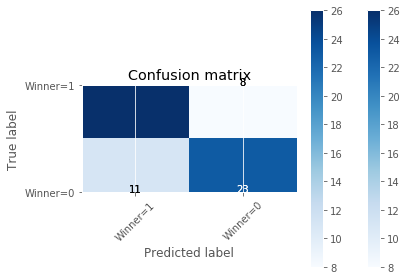

              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71        34
         1.0       0.70      0.76      0.73        34

    accuracy                           0.72        68
   macro avg       0.72      0.72      0.72        68
weighted avg       0.72      0.72      0.72        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30 11]
 [10 17]]
[[30 11]
 [10 17]]
47
Confusion matrix, without normalization
[[30 11]
 [10 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30 11]
 [10 17]]
47
Mitjana encerts
46.82178217821782
desviació estandar
3.888026910848787


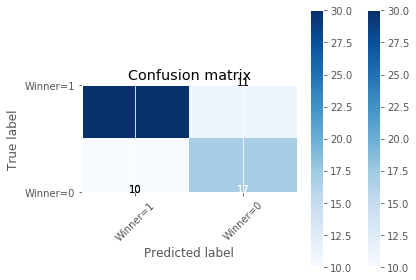

              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62        27
         1.0       0.75      0.73      0.74        41

    accuracy                           0.69        68
   macro avg       0.68      0.68      0.68        68
weighted avg       0.69      0.69      0.69        68

LogLoss: : 0.57
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[32 11]
 [ 7 18]]
[[32 11]
 [ 7 18]]
50
Confusion matrix, without normalization
[[32 11]
 [ 7 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[32 11]
 [ 7 18]]
50
Mitjana encerts
46.85294117647059
desviació estandar
3.8815730054373305


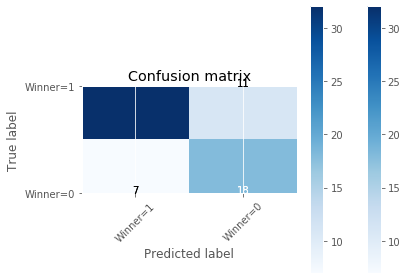

              precision    recall  f1-score   support

         0.0       0.62      0.72      0.67        25
         1.0       0.82      0.74      0.78        43

    accuracy                           0.74        68
   macro avg       0.72      0.73      0.72        68
weighted avg       0.75      0.74      0.74        68

LogLoss: : 0.58
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27 17]
 [ 4 20]]
[[27 17]
 [ 4 20]]
47
Confusion matrix, without normalization
[[27 17]
 [ 4 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27 17]
 [ 4 20]]
47
Mitjana encerts
46.85436893203884
desviació estandar
3.862711374780677


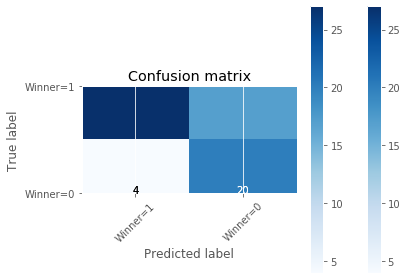

              precision    recall  f1-score   support

         0.0       0.54      0.83      0.66        24
         1.0       0.87      0.61      0.72        44

    accuracy                           0.69        68
   macro avg       0.71      0.72      0.69        68
weighted avg       0.75      0.69      0.70        68

LogLoss: : 0.58
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[33  6]
 [ 4 25]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[33  6]
 [ 4 25]]
58
Confusion matrix, without normalization
[[33  6]
 [ 4 25]]
[[33  6]
 [ 4 25]]
58
Mitjana encerts
46.96153846153846
desviació estandar
3.9950042767934097


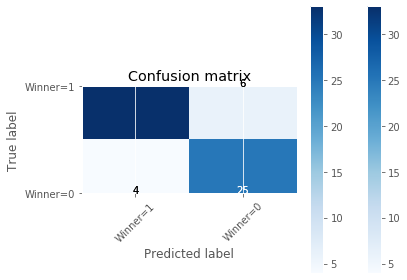

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83        29
         1.0       0.89      0.85      0.87        39

    accuracy                           0.85        68
   macro avg       0.85      0.85      0.85        68
weighted avg       0.86      0.85      0.85        68

LogLoss: : 0.53
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28  9]
 [11 20]]
[[28  9]
 [11 20]]
48
Confusion matrix, without normalization
[[28  9]
 [11 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28  9]
 [11 20]]
48
Mitjana encerts
46.97142857142857
desviació estandar
3.977214011405095


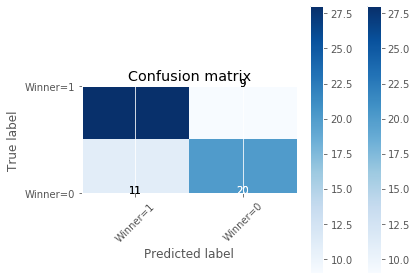

              precision    recall  f1-score   support

         0.0       0.69      0.65      0.67        31
         1.0       0.72      0.76      0.74        37

    accuracy                           0.71        68
   macro avg       0.70      0.70      0.70        68
weighted avg       0.71      0.71      0.70        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[33  8]
 [ 8 19]]
[[33  8]
 [ 8 19]]
52
Confusion matrix, without normalization
[[33  8]
 [ 8 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[33  8]
 [ 8 19]]
52
Mitjana encerts
47.0188679245283
desviació estandar
3.988145481145652


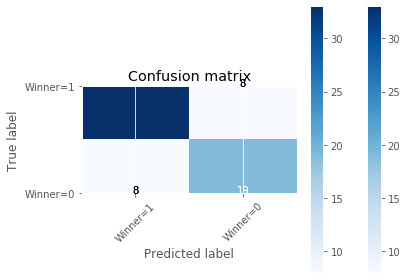

              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        27
         1.0       0.80      0.80      0.80        41

    accuracy                           0.76        68
   macro avg       0.75      0.75      0.75        68
weighted avg       0.76      0.76      0.76        68

LogLoss: : 0.57
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28  8]
 [13 19]]
[[28  8]
 [13 19]]
47
Confusion matrix, without normalization
[[28  8]
 [13 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28  8]
 [13 19]]
47
Mitjana encerts
47.018691588785046
desviació estandar
3.9694659553021845


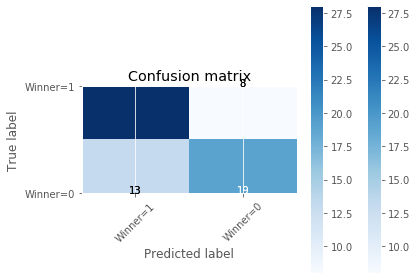

              precision    recall  f1-score   support

         0.0       0.70      0.59      0.64        32
         1.0       0.68      0.78      0.73        36

    accuracy                           0.69        68
   macro avg       0.69      0.69      0.69        68
weighted avg       0.69      0.69      0.69        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28 13]
 [12 15]]
[[28 13]
 [12 15]]
43
Confusion matrix, without normalization
[[28 13]
 [12 15]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28 13]
 [12 15]]
43
Mitjana encerts
46.98148148148148
desviació estandar
3.969750158855232


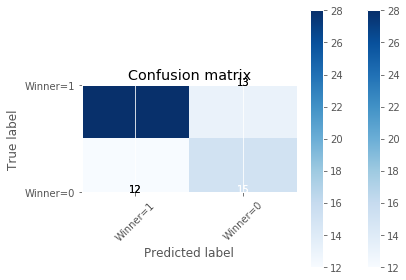

              precision    recall  f1-score   support

         0.0       0.54      0.56      0.55        27
         1.0       0.70      0.68      0.69        41

    accuracy                           0.63        68
   macro avg       0.62      0.62      0.62        68
weighted avg       0.63      0.63      0.63        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27 11]
 [ 8 22]]
[[27 11]
 [ 8 22]]
49
Confusion matrix, without normalization
[[27 11]
 [ 8 22]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27 11]
 [ 8 22]]
49
Mitjana encerts
47.0
desviació estandar
3.9561820163876424


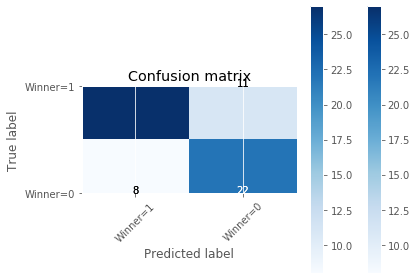

              precision    recall  f1-score   support

         0.0       0.67      0.73      0.70        30
         1.0       0.77      0.71      0.74        38

    accuracy                           0.72        68
   macro avg       0.72      0.72      0.72        68
weighted avg       0.73      0.72      0.72        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30  5]
 [ 6 27]]
[[30  5]
 [ 6 27]]
57
Confusion matrix, without normalization
[[30  5]
 [ 6 27]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30  5]
 [ 6 27]]
57
Mitjana encerts
47.09090909090909
desviació estandar
4.050915619384326


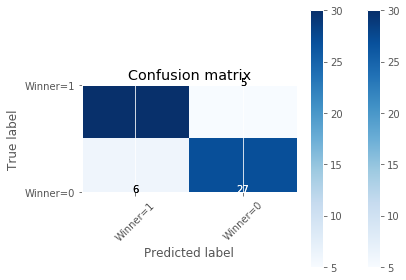

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        33
         1.0       0.83      0.86      0.85        35

    accuracy                           0.84        68
   macro avg       0.84      0.84      0.84        68
weighted avg       0.84      0.84      0.84        68

LogLoss: : 0.56
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[22 12]
 [16 18]]
[[22 12]
 [16 18]]
40
Confusion matrix, without normalization
[[22 12]
 [16 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[22 12]
 [16 18]]
40
Mitjana encerts
47.027027027027025
desviació estandar
4.08790670778111


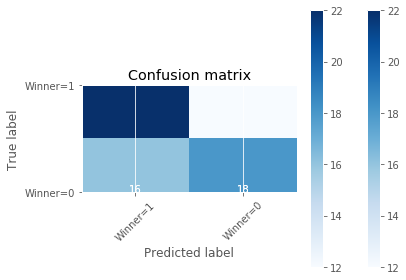

              precision    recall  f1-score   support

         0.0       0.60      0.53      0.56        34
         1.0       0.58      0.65      0.61        34

    accuracy                           0.59        68
   macro avg       0.59      0.59      0.59        68
weighted avg       0.59      0.59      0.59        68

LogLoss: : 0.66
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[31 10]
 [10 17]]
[[31 10]
 [10 17]]
48
Confusion matrix, without normalization
[[31 10]
 [10 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[31 10]
 [10 17]]
48
Mitjana encerts
47.035714285714285
desviació estandar
4.0706452880623845


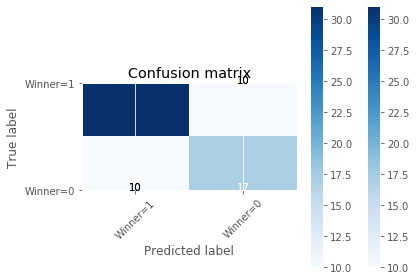

              precision    recall  f1-score   support

         0.0       0.63      0.63      0.63        27
         1.0       0.76      0.76      0.76        41

    accuracy                           0.71        68
   macro avg       0.69      0.69      0.69        68
weighted avg       0.71      0.71      0.71        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[18 16]
 [14 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[18 16]
 [14 20]]
38
Confusion matrix, without normalization
[[18 16]
 [14 20]]
[[18 16]
 [14 20]]
38
Mitjana encerts
46.95575221238938
desviació estandar
4.140004233529907


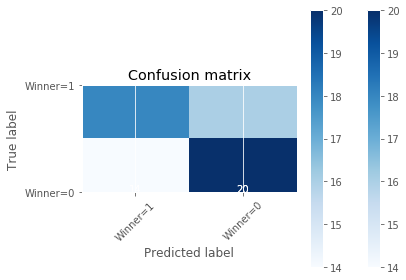

              precision    recall  f1-score   support

         0.0       0.56      0.59      0.57        34
         1.0       0.56      0.53      0.55        34

    accuracy                           0.56        68
   macro avg       0.56      0.56      0.56        68
weighted avg       0.56      0.56      0.56        68

LogLoss: : 0.71
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[22 15]
 [15 16]]
[[22 15]
 [15 16]]
38
Confusion matrix, without normalization
[[22 15]
 [15 16]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[22 15]
 [15 16]]
38
Mitjana encerts
46.87719298245614
desviació estandar
4.2055526179572285


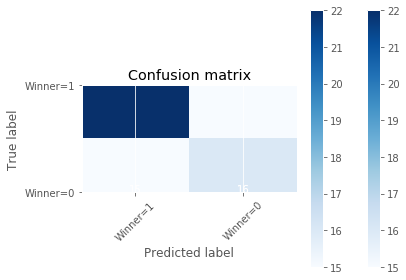

              precision    recall  f1-score   support

         0.0       0.52      0.52      0.52        31
         1.0       0.59      0.59      0.59        37

    accuracy                           0.56        68
   macro avg       0.56      0.56      0.56        68
weighted avg       0.56      0.56      0.56        68

LogLoss: : 0.69
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26 10]
 [ 9 23]]
[[26 10]
 [ 9 23]]
49
Confusion matrix, without normalization
[[26 10]
 [ 9 23]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26 10]
 [ 9 23]]
49
Mitjana encerts
46.89565217391304
desviació estandar
4.191863574455054


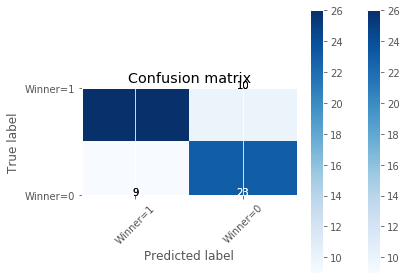

              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71        32
         1.0       0.74      0.72      0.73        36

    accuracy                           0.72        68
   macro avg       0.72      0.72      0.72        68
weighted avg       0.72      0.72      0.72        68

LogLoss: : 0.58
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[25 10]
 [16 17]]
[[25 10]
 [16 17]]
42
Confusion matrix, without normalization
[[25 10]
 [16 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[25 10]
 [16 17]]
42
Mitjana encerts
46.85344827586207
desviació estandar
4.198222756868689


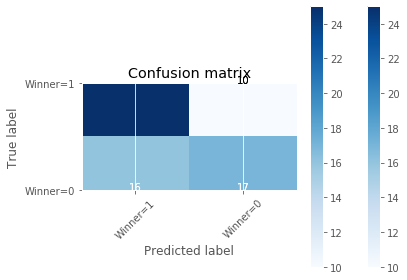

              precision    recall  f1-score   support

         0.0       0.63      0.52      0.57        33
         1.0       0.61      0.71      0.66        35

    accuracy                           0.62        68
   macro avg       0.62      0.61      0.61        68
weighted avg       0.62      0.62      0.61        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[25 15]
 [ 9 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[25 15]
 [ 9 19]]
44
Confusion matrix, without normalization
[[25 15]
 [ 9 19]]
[[25 15]
 [ 9 19]]
44
Mitjana encerts
46.82905982905983
desviació estandar
4.188487678220925


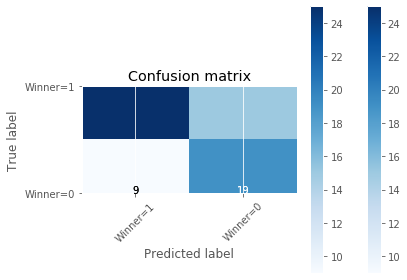

              precision    recall  f1-score   support

         0.0       0.56      0.68      0.61        28
         1.0       0.74      0.62      0.68        40

    accuracy                           0.65        68
   macro avg       0.65      0.65      0.64        68
weighted avg       0.66      0.65      0.65        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[24 10]
 [10 24]]
[[24 10]
 [10 24]]
48
Confusion matrix, without normalization
[[24 10]
 [10 24]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[24 10]
 [10 24]]
48
Mitjana encerts
46.83898305084746
desviació estandar
4.172083044705141


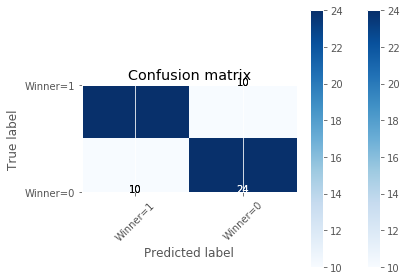

              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71        34
         1.0       0.71      0.71      0.71        34

    accuracy                           0.71        68
   macro avg       0.71      0.71      0.71        68
weighted avg       0.71      0.71      0.71        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[25 15]
 [10 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[25 15]
 [10 18]]
43
Confusion matrix, without normalization
[[25 15]
 [10 18]]
[[25 15]
 [10 18]]
43
Mitjana encerts
46.80672268907563
desviació estandar
4.1692699538778655


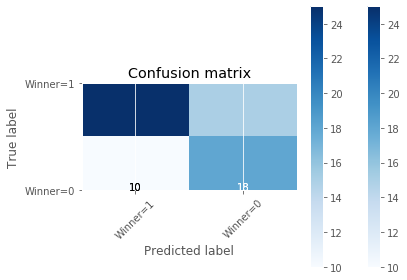

              precision    recall  f1-score   support

         0.0       0.55      0.64      0.59        28
         1.0       0.71      0.62      0.67        40

    accuracy                           0.63        68
   macro avg       0.63      0.63      0.63        68
weighted avg       0.64      0.63      0.64        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[24  8]
 [20 16]]
[[24  8]
 [20 16]]
40
Confusion matrix, without normalization
[[24  8]
 [20 16]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[24  8]
 [20 16]]
40
Mitjana encerts
46.75
desviació estandar
4.19771763382595


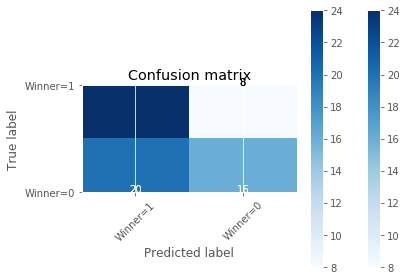

              precision    recall  f1-score   support

         0.0       0.67      0.44      0.53        36
         1.0       0.55      0.75      0.63        32

    accuracy                           0.59        68
   macro avg       0.61      0.60      0.58        68
weighted avg       0.61      0.59      0.58        68

LogLoss: : 0.70
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27 11]
 [12 18]]
[[27 11]
 [12 18]]
45
Confusion matrix, without normalization
[[27 11]
 [12 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27 11]
 [12 18]]
45
Mitjana encerts
46.735537190082646
desviació estandar
4.183336868584086


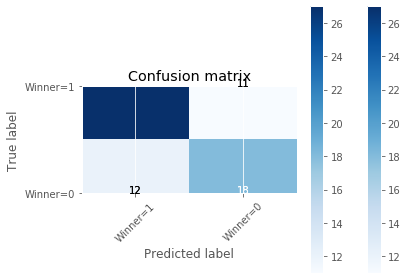

              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61        30
         1.0       0.69      0.71      0.70        38

    accuracy                           0.66        68
   macro avg       0.66      0.66      0.66        68
weighted avg       0.66      0.66      0.66        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[33 10]
 [ 6 19]]
[[33 10]
 [ 6 19]]
52
Confusion matrix, without normalization
[[33 10]
 [ 6 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[33 10]
 [ 6 19]]
52
Mitjana encerts
46.778688524590166
desviació estandar
4.193109678011717


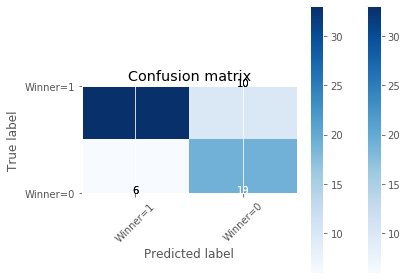

              precision    recall  f1-score   support

         0.0       0.66      0.76      0.70        25
         1.0       0.85      0.77      0.80        43

    accuracy                           0.76        68
   macro avg       0.75      0.76      0.75        68
weighted avg       0.78      0.76      0.77        68

LogLoss: : 0.54
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[22 13]
 [10 23]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[22 13]
 [10 23]]
45
Confusion matrix, without normalization
[[22 13]
 [10 23]]
[[22 13]
 [10 23]]
45
Mitjana encerts
46.764227642276424
desviació estandar
4.179083224654122


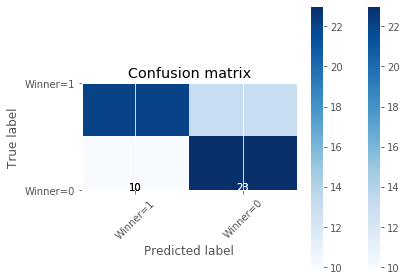

              precision    recall  f1-score   support

         0.0       0.64      0.70      0.67        33
         1.0       0.69      0.63      0.66        35

    accuracy                           0.66        68
   macro avg       0.66      0.66      0.66        68
weighted avg       0.66      0.66      0.66        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30 15]
 [ 7 16]]
[[30 15]
 [ 7 16]]
46
Confusion matrix, without normalization
[[30 15]
 [ 7 16]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30 15]
 [ 7 16]]
46
Mitjana encerts
46.75806451612903
desviació estandar
4.162759180620189


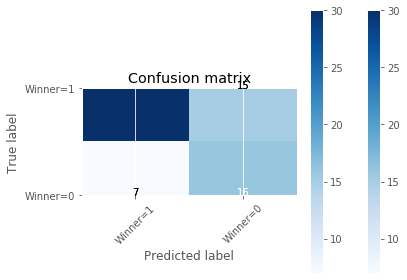

              precision    recall  f1-score   support

         0.0       0.52      0.70      0.59        23
         1.0       0.81      0.67      0.73        45

    accuracy                           0.68        68
   macro avg       0.66      0.68      0.66        68
weighted avg       0.71      0.68      0.68        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26  8]
 [14 20]]
[[26  8]
 [14 20]]
46
Confusion matrix, without normalization
[[26  8]
 [14 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26  8]
 [14 20]]
46
Mitjana encerts
46.752
desviació estandar
4.146624651448453


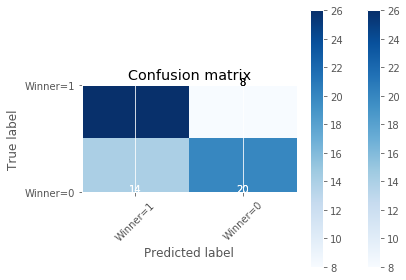

              precision    recall  f1-score   support

         0.0       0.71      0.59      0.65        34
         1.0       0.65      0.76      0.70        34

    accuracy                           0.68        68
   macro avg       0.68      0.68      0.67        68
weighted avg       0.68      0.68      0.67        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[31  8]
 [12 17]]
[[31  8]
 [12 17]]
48
Confusion matrix, without normalization
[[31  8]
 [12 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[31  8]
 [12 17]]
48
Mitjana encerts
46.76190476190476
desviació estandar
4.131621326377878


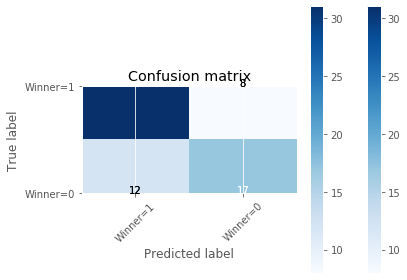

              precision    recall  f1-score   support

         0.0       0.68      0.59      0.63        29
         1.0       0.72      0.79      0.76        39

    accuracy                           0.71        68
   macro avg       0.70      0.69      0.69        68
weighted avg       0.70      0.71      0.70        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[24 14]
 [11 19]]
[[24 14]
 [11 19]]
43
Confusion matrix, without normalization
[[24 14]
 [11 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[24 14]
 [11 19]]
43
Mitjana encerts
46.732283464566926
desviació estandar
4.128733231013623


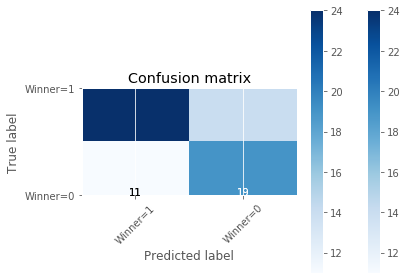

              precision    recall  f1-score   support

         0.0       0.58      0.63      0.60        30
         1.0       0.69      0.63      0.66        38

    accuracy                           0.63        68
   macro avg       0.63      0.63      0.63        68
weighted avg       0.64      0.63      0.63        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29  7]
 [18 14]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29  7]
 [18 14]]
43
Confusion matrix, without normalization
[[29  7]
 [18 14]]
[[29  7]
 [18 14]]
43
Mitjana encerts
46.703125
desviació estandar
4.125680578325835


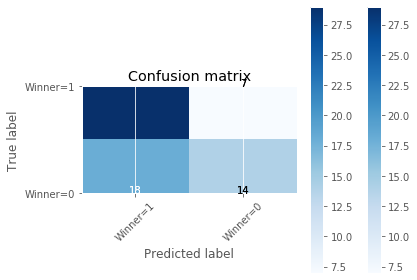

              precision    recall  f1-score   support

         0.0       0.67      0.44      0.53        32
         1.0       0.62      0.81      0.70        36

    accuracy                           0.63        68
   macro avg       0.64      0.62      0.61        68
weighted avg       0.64      0.63      0.62        68

LogLoss: : 0.65
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28  8]
 [12 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28  8]
 [12 20]]
48
Confusion matrix, without normalization
[[28  8]
 [12 20]]
[[28  8]
 [12 20]]
48
Mitjana encerts
46.713178294573645
desviació estandar
4.111232106477002


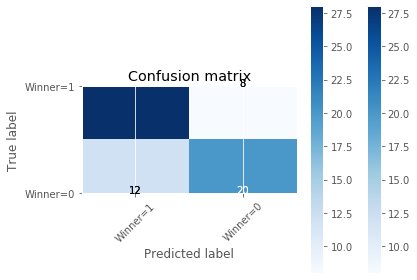

              precision    recall  f1-score   support

         0.0       0.71      0.62      0.67        32
         1.0       0.70      0.78      0.74        36

    accuracy                           0.71        68
   macro avg       0.71      0.70      0.70        68
weighted avg       0.71      0.71      0.70        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26 13]
 [10 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26 13]
 [10 19]]
45
Confusion matrix, without normalization
[[26 13]
 [10 19]]
[[26 13]
 [10 19]]
45
Mitjana encerts
46.7
desviació estandar
4.098123397924395


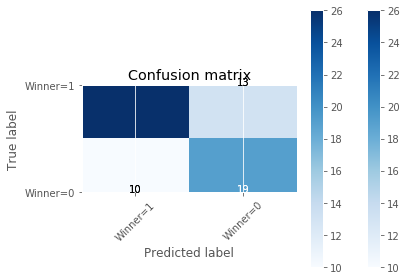

              precision    recall  f1-score   support

         0.0       0.59      0.66      0.62        29
         1.0       0.72      0.67      0.69        39

    accuracy                           0.66        68
   macro avg       0.66      0.66      0.66        68
weighted avg       0.67      0.66      0.66        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30 10]
 [11 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30 10]
 [11 17]]
47
Confusion matrix, without normalization
[[30 10]
 [11 17]]
[[30 10]
 [11 17]]
47
Mitjana encerts
46.70229007633588
desviació estandar
4.082535240777671


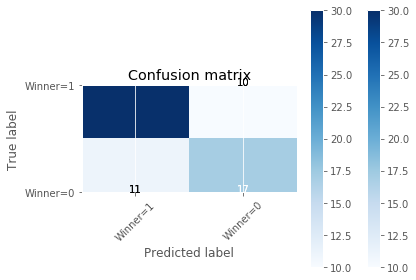

              precision    recall  f1-score   support

         0.0       0.63      0.61      0.62        28
         1.0       0.73      0.75      0.74        40

    accuracy                           0.69        68
   macro avg       0.68      0.68      0.68        68
weighted avg       0.69      0.69      0.69        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30  7]
 [ 9 22]]
[[30  7]
 [ 9 22]]
52
Confusion matrix, without normalization
[[30  7]
 [ 9 22]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30  7]
 [ 9 22]]
52
Mitjana encerts
46.74242424242424
desviació estandar
4.092900749748409


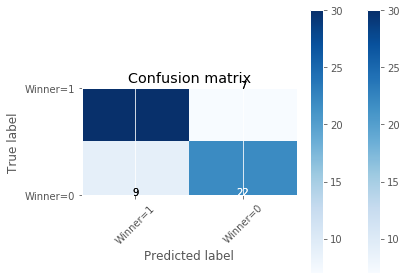

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73        31
         1.0       0.77      0.81      0.79        37

    accuracy                           0.76        68
   macro avg       0.76      0.76      0.76        68
weighted avg       0.76      0.76      0.76        68

LogLoss: : 0.57
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26 10]
 [14 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26 10]
 [14 18]]
44
Confusion matrix, without normalization
[[26 10]
 [14 18]]
[[26 10]
 [14 18]]
44
Mitjana encerts
46.721804511278194
desviació estandar
4.084361120946021


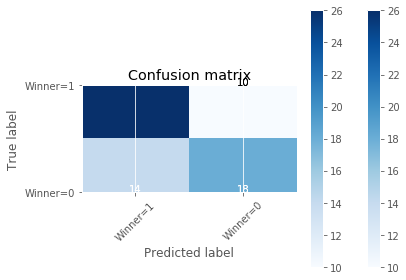

              precision    recall  f1-score   support

         0.0       0.64      0.56      0.60        32
         1.0       0.65      0.72      0.68        36

    accuracy                           0.65        68
   macro avg       0.65      0.64      0.64        68
weighted avg       0.65      0.65      0.64        68

LogLoss: : 0.65
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30  5]
 [11 22]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30  5]
 [11 22]]
52
Confusion matrix, without normalization
[[30  5]
 [11 22]]
[[30  5]
 [11 22]]
52
Mitjana encerts
46.76119402985075
desviació estandar
4.09437018734373


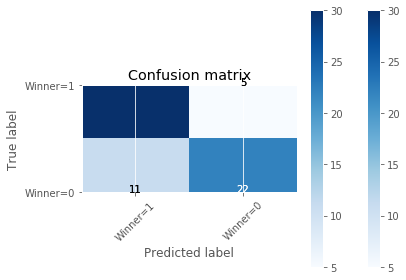

              precision    recall  f1-score   support

         0.0       0.81      0.67      0.73        33
         1.0       0.73      0.86      0.79        35

    accuracy                           0.76        68
   macro avg       0.77      0.76      0.76        68
weighted avg       0.77      0.76      0.76        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30  6]
 [14 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30  6]
 [14 18]]
48
Confusion matrix, without normalization
[[30  6]
 [14 18]]
[[30  6]
 [14 18]]
48
Mitjana encerts
46.77037037037037
desviació estandar
4.08056049298376


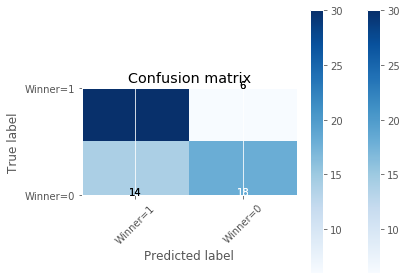

              precision    recall  f1-score   support

         0.0       0.75      0.56      0.64        32
         1.0       0.68      0.83      0.75        36

    accuracy                           0.71        68
   macro avg       0.72      0.70      0.70        68
weighted avg       0.71      0.71      0.70        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[38  9]
 [ 7 14]]
[[38  9]
 [ 7 14]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


52
Confusion matrix, without normalization
[[38  9]
 [ 7 14]]
[[38  9]
 [ 7 14]]
52
Mitjana encerts
46.80882352941177
desviació estandar
4.09000702193118


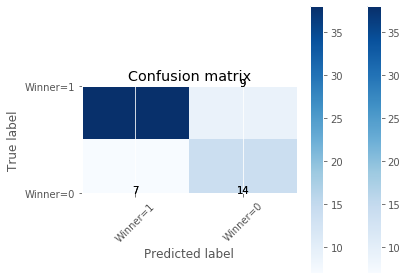

              precision    recall  f1-score   support

         0.0       0.61      0.67      0.64        21
         1.0       0.84      0.81      0.83        47

    accuracy                           0.76        68
   macro avg       0.73      0.74      0.73        68
weighted avg       0.77      0.76      0.77        68

LogLoss: : 0.56
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[25 10]
 [13 20]]
[[25 10]
 [13 20]]
45
Confusion matrix, without normalization
[[25 10]
 [13 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[25 10]
 [13 20]]
45
Mitjana encerts
46.7956204379562
desviació estandar
4.077960500217494


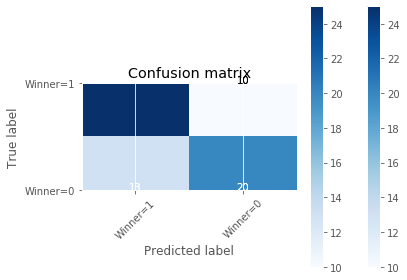

              precision    recall  f1-score   support

         0.0       0.67      0.61      0.63        33
         1.0       0.66      0.71      0.68        35

    accuracy                           0.66        68
   macro avg       0.66      0.66      0.66        68
weighted avg       0.66      0.66      0.66        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26 10]
 [13 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26 10]
 [13 19]]
45
Confusion matrix, without normalization
[[26 10]
 [13 19]]
[[26 10]
 [13 19]]
45
Mitjana encerts
46.78260869565217
desviació estandar
4.066011702605083


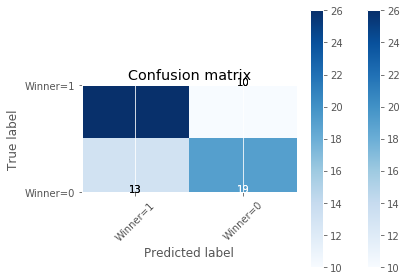

              precision    recall  f1-score   support

         0.0       0.66      0.59      0.62        32
         1.0       0.67      0.72      0.69        36

    accuracy                           0.66        68
   macro avg       0.66      0.66      0.66        68
weighted avg       0.66      0.66      0.66        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27  8]
 [ 8 25]]
[[27  8]
 [ 8 25]]
52
Confusion matrix, without normalization
[[27  8]
 [ 8 25]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27  8]
 [ 8 25]]
52
Mitjana encerts
46.82014388489208
desviació estandar
4.075283983680458


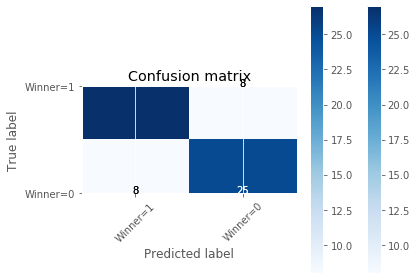

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76        33
         1.0       0.77      0.77      0.77        35

    accuracy                           0.76        68
   macro avg       0.76      0.76      0.76        68
weighted avg       0.76      0.76      0.76        68

LogLoss: : 0.58
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30  7]
 [12 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30  7]
 [12 19]]
49
Confusion matrix, without normalization
[[30  7]
 [12 19]]
[[30  7]
 [12 19]]
49
Mitjana encerts
46.83571428571429
desviació estandar
4.064850575861508


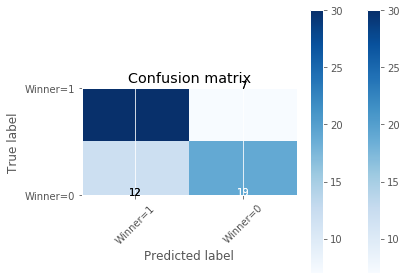

              precision    recall  f1-score   support

         0.0       0.73      0.61      0.67        31
         1.0       0.71      0.81      0.76        37

    accuracy                           0.72        68
   macro avg       0.72      0.71      0.71        68
weighted avg       0.72      0.72      0.72        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29 15]
 [ 9 15]]
[[29 15]
 [ 9 15]]
44
Confusion matrix, without normalization
[[29 15]
 [ 9 15]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29 15]
 [ 9 15]]
44
Mitjana encerts
46.815602836879435
desviació estandar
4.057394679710406


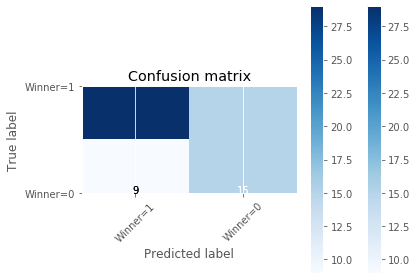

              precision    recall  f1-score   support

         0.0       0.50      0.62      0.56        24
         1.0       0.76      0.66      0.71        44

    accuracy                           0.65        68
   macro avg       0.63      0.64      0.63        68
weighted avg       0.67      0.65      0.65        68

LogLoss: : 0.65
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[31  7]
 [13 17]]
[[31  7]
 [13 17]]
48
Confusion matrix, without normalization
[[31  7]
 [13 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[31  7]
 [13 17]]
48
Mitjana encerts
46.82394366197183
desviació estandar
4.044295749509683


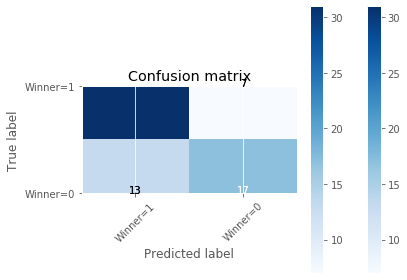

              precision    recall  f1-score   support

         0.0       0.71      0.57      0.63        30
         1.0       0.70      0.82      0.76        38

    accuracy                           0.71        68
   macro avg       0.71      0.69      0.69        68
weighted avg       0.71      0.71      0.70        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[24 11]
 [14 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[24 11]
 [14 19]]
43
Confusion matrix, without normalization
[[24 11]
 [14 19]]
[[24 11]
 [14 19]]
43
Mitjana encerts
46.7972027972028
desviació estandar
4.042708087303981


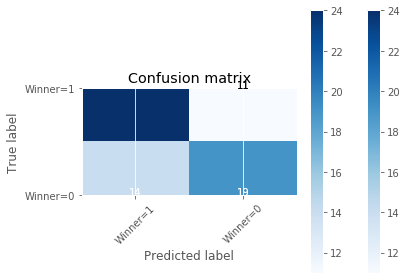

              precision    recall  f1-score   support

         0.0       0.63      0.58      0.60        33
         1.0       0.63      0.69      0.66        35

    accuracy                           0.63        68
   macro avg       0.63      0.63      0.63        68
weighted avg       0.63      0.63      0.63        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30  7]
 [14 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30  7]
 [14 17]]
47
Confusion matrix, without normalization
[[30  7]
 [14 17]]
[[30  7]
 [14 17]]
47
Mitjana encerts
46.798611111111114
desviació estandar
4.02868165145441


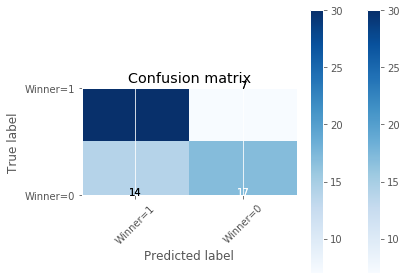

              precision    recall  f1-score   support

         0.0       0.71      0.55      0.62        31
         1.0       0.68      0.81      0.74        37

    accuracy                           0.69        68
   macro avg       0.70      0.68      0.68        68
weighted avg       0.69      0.69      0.68        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27 13]
 [ 9 19]]
[[27 13]
 [ 9 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


46
Confusion matrix, without normalization
[[27 13]
 [ 9 19]]
[[27 13]
 [ 9 19]]
46
Mitjana encerts
46.793103448275865
desviació estandar
4.015309584361332


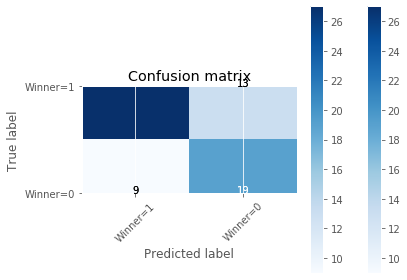

              precision    recall  f1-score   support

         0.0       0.59      0.68      0.63        28
         1.0       0.75      0.68      0.71        40

    accuracy                           0.68        68
   macro avg       0.67      0.68      0.67        68
weighted avg       0.69      0.68      0.68        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29  7]
 [ 9 23]]
[[29  7]
 [ 9 23]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


52
Confusion matrix, without normalization
[[29  7]
 [ 9 23]]
[[29  7]
 [ 9 23]]
52
Mitjana encerts
46.82876712328767
desviació estandar
4.0245132251233935


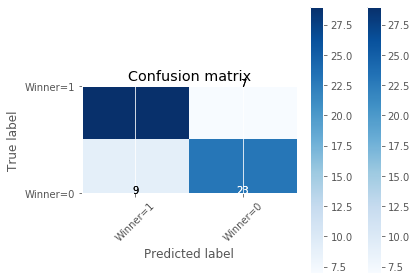

              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74        32
         1.0       0.76      0.81      0.78        36

    accuracy                           0.76        68
   macro avg       0.76      0.76      0.76        68
weighted avg       0.76      0.76      0.76        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27  7]
 [14 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27  7]
 [14 20]]
47
Confusion matrix, without normalization
[[27  7]
 [14 20]]
[[27  7]
 [14 20]]
47
Mitjana encerts
46.82993197278912
desviació estandar
4.010825740994489


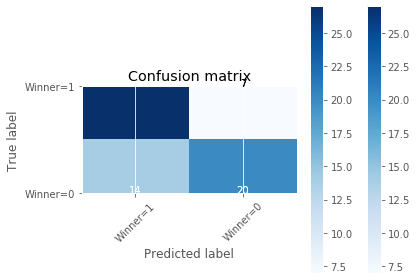

              precision    recall  f1-score   support

         0.0       0.74      0.59      0.66        34
         1.0       0.66      0.79      0.72        34

    accuracy                           0.69        68
   macro avg       0.70      0.69      0.69        68
weighted avg       0.70      0.69      0.69        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[31  8]
 [15 14]]
[[31  8]
 [15 14]]
45
Confusion matrix, without normalization
[[31  8]
 [15 14]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[31  8]
 [15 14]]
45
Mitjana encerts
46.817567567567565
desviació estandar
4.000062773430008


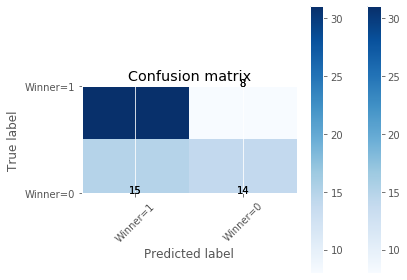

              precision    recall  f1-score   support

         0.0       0.64      0.48      0.55        29
         1.0       0.67      0.79      0.73        39

    accuracy                           0.66        68
   macro avg       0.66      0.64      0.64        68
weighted avg       0.66      0.66      0.65        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[22  5]
 [13 28]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[22  5]
 [13 28]]
50
Confusion matrix, without normalization
[[22  5]
 [13 28]]
[[22  5]
 [13 28]]
50
Mitjana encerts
46.83892617449664
desviació estandar
3.9950760197955897


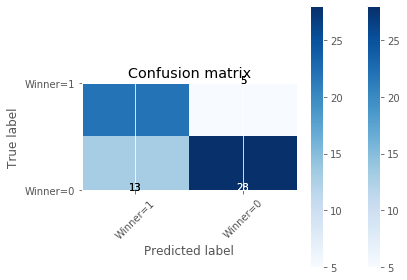

              precision    recall  f1-score   support

         0.0       0.85      0.68      0.76        41
         1.0       0.63      0.81      0.71        27

    accuracy                           0.74        68
   macro avg       0.74      0.75      0.73        68
weighted avg       0.76      0.74      0.74        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27  7]
 [16 18]]
[[27  7]
 [16 18]]
45
Confusion matrix, without normalization
[[27  7]
 [16 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27  7]
 [16 18]]
45
Mitjana encerts
46.82666666666667
desviació estandar
3.9845479319770045


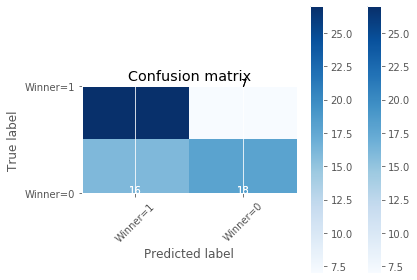

              precision    recall  f1-score   support

         0.0       0.72      0.53      0.61        34
         1.0       0.63      0.79      0.70        34

    accuracy                           0.66        68
   macro avg       0.67      0.66      0.66        68
weighted avg       0.67      0.66      0.66        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[25  5]
 [14 24]]
[[25  5]
 [14 24]]
49
Confusion matrix, without normalization
[[25  5]
 [14 24]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[25  5]
 [14 24]]
49
Mitjana encerts
46.841059602649004
desviació estandar
3.975242447905075


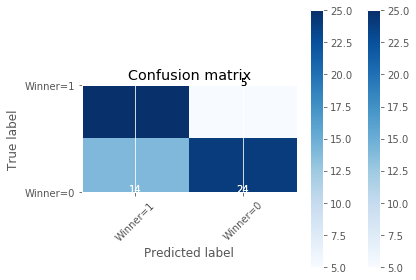

              precision    recall  f1-score   support

         0.0       0.83      0.63      0.72        38
         1.0       0.64      0.83      0.72        30

    accuracy                           0.72        68
   macro avg       0.73      0.73      0.72        68
weighted avg       0.75      0.72      0.72        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[31  8]
 [12 17]]
[[31  8]
 [12 17]]
48
Confusion matrix, without normalization
[[31  8]
 [12 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[31  8]
 [12 17]]
48
Mitjana encerts
46.848684210526315
desviació estandar
3.9632520345986944


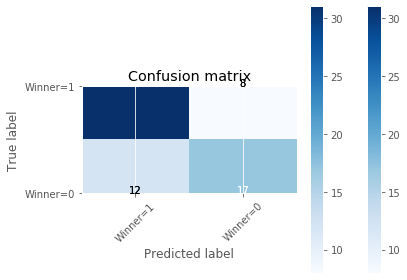

              precision    recall  f1-score   support

         0.0       0.68      0.59      0.63        29
         1.0       0.72      0.79      0.76        39

    accuracy                           0.71        68
   macro avg       0.70      0.69      0.69        68
weighted avg       0.70      0.71      0.70        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29 13]
 [ 8 18]]
[[29 13]
 [ 8 18]]
47
Confusion matrix, without normalization
[[29 13]
 [ 8 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29 13]
 [ 8 18]]
47
Mitjana encerts
46.849673202614376
desviació estandar
3.9502978159095723


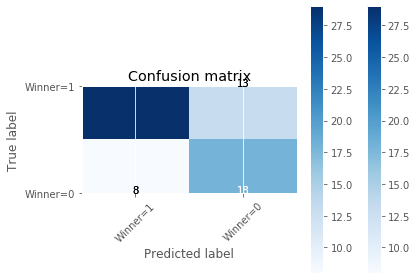

              precision    recall  f1-score   support

         0.0       0.58      0.69      0.63        26
         1.0       0.78      0.69      0.73        42

    accuracy                           0.69        68
   macro avg       0.68      0.69      0.68        68
weighted avg       0.71      0.69      0.69        68

LogLoss: : 0.57
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28  6]
 [ 8 26]]
[[28  6]
 [ 8 26]]
54
Confusion matrix, without normalization
[[28  6]
 [ 8 26]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28  6]
 [ 8 26]]
54
Mitjana encerts
46.896103896103895
desviació estandar
3.9791156610170377


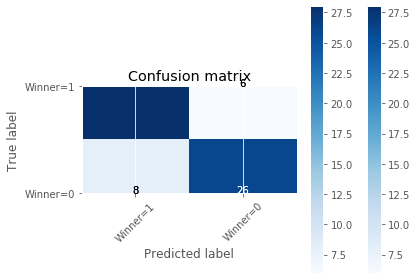

              precision    recall  f1-score   support

         0.0       0.81      0.76      0.79        34
         1.0       0.78      0.82      0.80        34

    accuracy                           0.79        68
   macro avg       0.80      0.79      0.79        68
weighted avg       0.80      0.79      0.79        68

LogLoss: : 0.56
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[21 10]
 [14 23]]
[[21 10]
 [14 23]]
44
Confusion matrix, without normalization
[[21 10]
 [14 23]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[21 10]
 [14 23]]
44
Mitjana encerts
46.87741935483871
desviació estandar
3.973030831170561


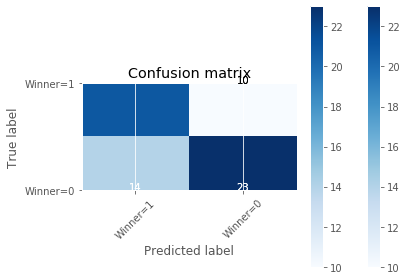

              precision    recall  f1-score   support

         0.0       0.70      0.62      0.66        37
         1.0       0.60      0.68      0.64        31

    accuracy                           0.65        68
   macro avg       0.65      0.65      0.65        68
weighted avg       0.65      0.65      0.65        68

LogLoss: : 0.69
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[38  9]
 [10 11]]
[[38  9]
 [10 11]]
49
Confusion matrix, without normalization
[[38  9]
 [10 11]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[38  9]
 [10 11]]
49
Mitjana encerts
46.89102564102564
desviació estandar
3.9638975218142436


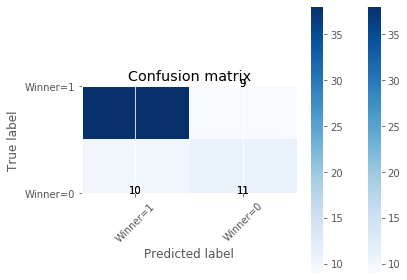

              precision    recall  f1-score   support

         0.0       0.55      0.52      0.54        21
         1.0       0.79      0.81      0.80        47

    accuracy                           0.72        68
   macro avg       0.67      0.67      0.67        68
weighted avg       0.72      0.72      0.72        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[34  8]
 [12 14]]
[[34  8]
 [12 14]]
48
Confusion matrix, without normalization
[[34  8]
 [12 14]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[34  8]
 [12 14]]
48
Mitjana encerts
46.89808917197452
desviació estandar
3.952238281219745


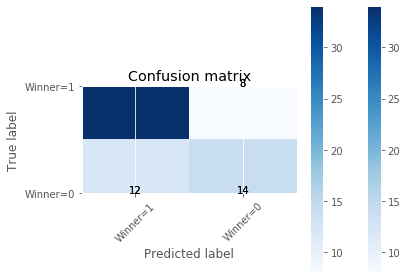

              precision    recall  f1-score   support

         0.0       0.64      0.54      0.58        26
         1.0       0.74      0.81      0.77        42

    accuracy                           0.71        68
   macro avg       0.69      0.67      0.68        68
weighted avg       0.70      0.71      0.70        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26  7]
 [13 22]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26  7]
 [13 22]]
48
Confusion matrix, without normalization
[[26  7]
 [13 22]]
[[26  7]
 [13 22]]
48
Mitjana encerts
46.90506329113924
desviació estandar
3.940680360655377


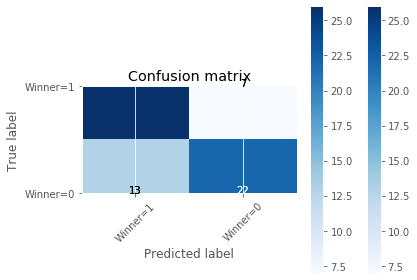

              precision    recall  f1-score   support

         0.0       0.76      0.63      0.69        35
         1.0       0.67      0.79      0.72        33

    accuracy                           0.71        68
   macro avg       0.71      0.71      0.70        68
weighted avg       0.71      0.71      0.70        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[30  9]
 [14 15]]
[[30  9]
 [14 15]]
45
Confusion matrix, without normalization
[[30  9]
 [14 15]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[30  9]
 [14 15]]
45
Mitjana encerts
46.893081761006286
desviació estandar
3.9311547025272273


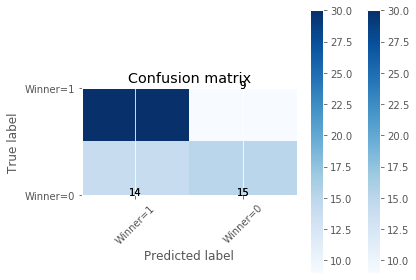

              precision    recall  f1-score   support

         0.0       0.62      0.52      0.57        29
         1.0       0.68      0.77      0.72        39

    accuracy                           0.66        68
   macro avg       0.65      0.64      0.64        68
weighted avg       0.66      0.66      0.66        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[22  9]
 [12 25]]
[[22  9]
 [12 25]]
47
Confusion matrix, without normalization
[[22  9]
 [12 25]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[22  9]
 [12 25]]
47
Mitjana encerts
46.89375
desviació estandar
3.9188596475888238


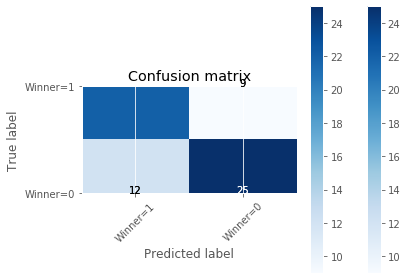

              precision    recall  f1-score   support

         0.0       0.74      0.68      0.70        37
         1.0       0.65      0.71      0.68        31

    accuracy                           0.69        68
   macro avg       0.69      0.69      0.69        68
weighted avg       0.70      0.69      0.69        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[21  5]
 [16 26]]
[[21  5]
 [16 26]]
47
Confusion matrix, without normalization
[[21  5]
 [16 26]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[21  5]
 [16 26]]
47
Mitjana encerts
46.8944099378882
desviació estandar
3.906679237440549


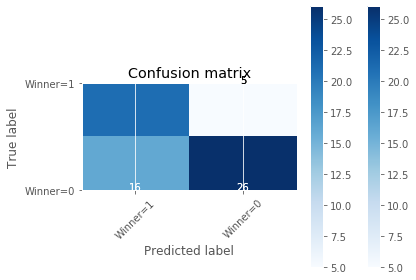

              precision    recall  f1-score   support

         0.0       0.84      0.62      0.71        42
         1.0       0.57      0.81      0.67        26

    accuracy                           0.69        68
   macro avg       0.70      0.71      0.69        68
weighted avg       0.74      0.69      0.69        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[31  8]
 [16 13]]
[[31  8]
 [16 13]]
44
Confusion matrix, without normalization
[[31  8]
 [16 13]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[31  8]
 [16 13]]
44
Mitjana encerts
46.876543209876544
desviació estandar
3.901195499101138


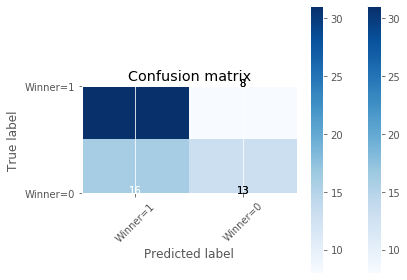

              precision    recall  f1-score   support

         0.0       0.62      0.45      0.52        29
         1.0       0.66      0.79      0.72        39

    accuracy                           0.65        68
   macro avg       0.64      0.62      0.62        68
weighted avg       0.64      0.65      0.64        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[31  9]
 [10 18]]
[[31  9]
 [10 18]]
49
Confusion matrix, without normalization
[[31  9]
 [10 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[31  9]
 [10 18]]
49
Mitjana encerts
46.88957055214724
desviació estandar
3.892743185573135


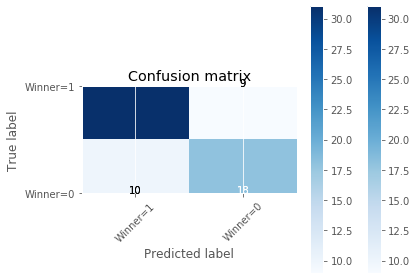

              precision    recall  f1-score   support

         0.0       0.67      0.64      0.65        28
         1.0       0.76      0.78      0.77        40

    accuracy                           0.72        68
   macro avg       0.71      0.71      0.71        68
weighted avg       0.72      0.72      0.72        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[38  9]
 [ 8 13]]
[[38  9]
 [ 8 13]]
51
Confusion matrix, without normalization
[[38  9]
 [ 8 13]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[38  9]
 [ 8 13]]
51
Mitjana encerts
46.91463414634146
desviació estandar
3.894026756244264


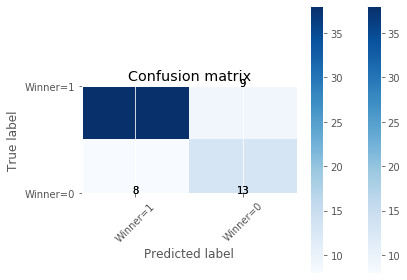

              precision    recall  f1-score   support

         0.0       0.59      0.62      0.60        21
         1.0       0.83      0.81      0.82        47

    accuracy                           0.75        68
   macro avg       0.71      0.71      0.71        68
weighted avg       0.75      0.75      0.75        68

LogLoss: : 0.56
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28 15]
 [ 9 16]]
[[28 15]
 [ 9 16]]
44
Confusion matrix, without normalization
[[28 15]
 [ 9 16]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28 15]
 [ 9 16]]
44
Mitjana encerts
46.8969696969697
desviació estandar
3.888793911997757


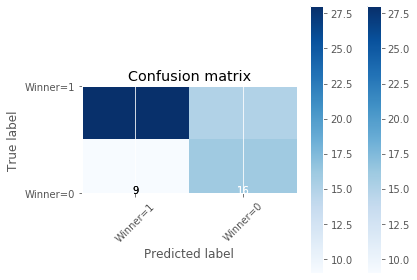

              precision    recall  f1-score   support

         0.0       0.52      0.64      0.57        25
         1.0       0.76      0.65      0.70        43

    accuracy                           0.65        68
   macro avg       0.64      0.65      0.64        68
weighted avg       0.67      0.65      0.65        68

LogLoss: : 0.65
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[25  9]
 [10 24]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[25  9]
 [10 24]]
49
Confusion matrix, without normalization
[[25  9]
 [10 24]]
[[25  9]
 [10 24]]
49
Mitjana encerts
46.90963855421687
desviació estandar
3.8804767579972625


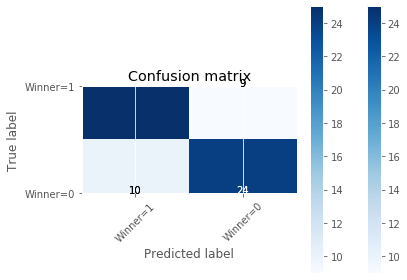

              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72        34
         1.0       0.71      0.74      0.72        34

    accuracy                           0.72        68
   macro avg       0.72      0.72      0.72        68
weighted avg       0.72      0.72      0.72        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[31  9]
 [11 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[31  9]
 [11 17]]
48
Confusion matrix, without normalization
[[31  9]
 [11 17]]
[[31  9]
 [11 17]]
48
Mitjana encerts
46.91616766467066
desviació estandar
3.8697555565819584


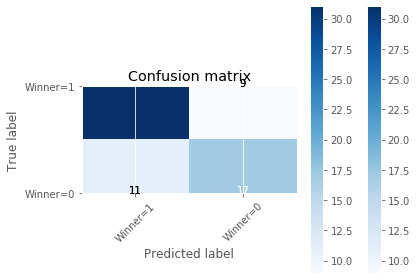

              precision    recall  f1-score   support

         0.0       0.65      0.61      0.63        28
         1.0       0.74      0.78      0.76        40

    accuracy                           0.71        68
   macro avg       0.70      0.69      0.69        68
weighted avg       0.70      0.71      0.70        68

LogLoss: : 0.58
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27  7]
 [14 20]]
[[27  7]
 [14 20]]
47
Confusion matrix, without normalization
[[27  7]
 [14 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27  7]
 [14 20]]
47
Mitjana encerts
46.916666666666664
desviació estandar
3.858226626108515


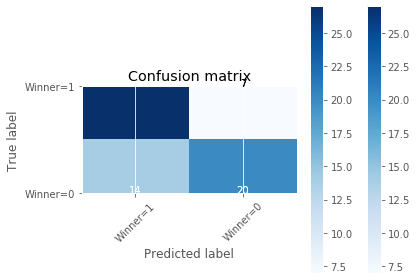

              precision    recall  f1-score   support

         0.0       0.74      0.59      0.66        34
         1.0       0.66      0.79      0.72        34

    accuracy                           0.69        68
   macro avg       0.70      0.69      0.69        68
weighted avg       0.70      0.69      0.69        68

LogLoss: : 0.62
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28 14]
 [11 15]]
[[28 14]
 [11 15]]
43
Confusion matrix, without normalization
[[28 14]
 [11 15]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28 14]
 [11 15]]
43
Mitjana encerts
46.89349112426036
desviació estandar
3.8585054287136034


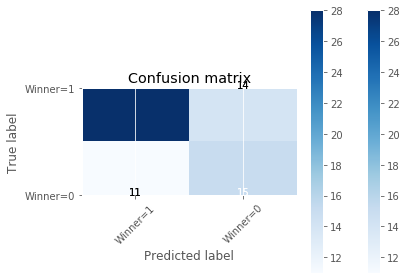

              precision    recall  f1-score   support

         0.0       0.52      0.58      0.55        26
         1.0       0.72      0.67      0.69        42

    accuracy                           0.63        68
   macro avg       0.62      0.62      0.62        68
weighted avg       0.64      0.63      0.64        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28 10]
 [12 18]]
[[28 10]
 [12 18]]
46
Confusion matrix, without normalization
[[28 10]
 [12 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28 10]
 [12 18]]
46
Mitjana encerts
46.88823529411765
desviació estandar
3.8477468354015394


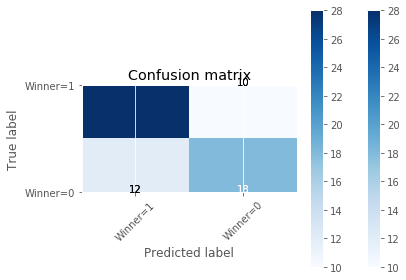

              precision    recall  f1-score   support

         0.0       0.64      0.60      0.62        30
         1.0       0.70      0.74      0.72        38

    accuracy                           0.68        68
   macro avg       0.67      0.67      0.67        68
weighted avg       0.67      0.68      0.68        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[33 10]
 [ 8 17]]
[[33 10]
 [ 8 17]]
50
Confusion matrix, without normalization
[[33 10]
 [ 8 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[33 10]
 [ 8 17]]
50
Mitjana encerts
46.90643274853801
desviació estandar
3.843809425615167


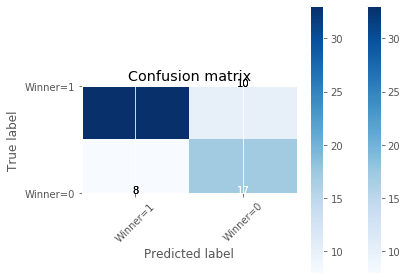

              precision    recall  f1-score   support

         0.0       0.63      0.68      0.65        25
         1.0       0.80      0.77      0.79        43

    accuracy                           0.74        68
   macro avg       0.72      0.72      0.72        68
weighted avg       0.74      0.74      0.74        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[25  9]
 [10 24]]
[[25  9]
 [10 24]]
49
Confusion matrix, without normalization
[[25  9]
 [10 24]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[25  9]
 [10 24]]
49
Mitjana encerts
46.91860465116279
desviació estandar
3.835922969735681


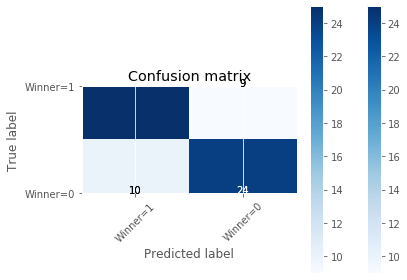

              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72        34
         1.0       0.71      0.74      0.72        34

    accuracy                           0.72        68
   macro avg       0.72      0.72      0.72        68
weighted avg       0.72      0.72      0.72        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[33  8]
 [ 9 18]]
[[33  8]
 [ 9 18]]
51
Confusion matrix, without normalization
[[33  8]
 [ 9 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[33  8]
 [ 9 18]]
51
Mitjana encerts
46.94219653179191
desviació estandar
3.8373144852207624


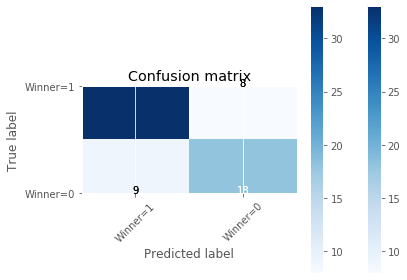

              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68        27
         1.0       0.79      0.80      0.80        41

    accuracy                           0.75        68
   macro avg       0.74      0.74      0.74        68
weighted avg       0.75      0.75      0.75        68

LogLoss: : 0.58
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[34  5]
 [10 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[34  5]
 [10 19]]
53
Confusion matrix, without normalization
[[34  5]
 [10 19]]
[[34  5]
 [10 19]]
53
Mitjana encerts
46.97701149425287
desviació estandar
3.853575773388554


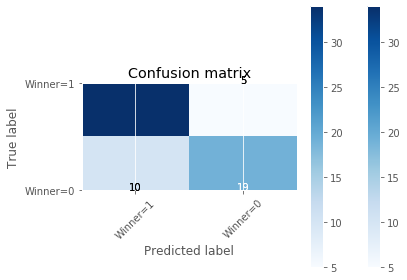

              precision    recall  f1-score   support

         0.0       0.79      0.66      0.72        29
         1.0       0.77      0.87      0.82        39

    accuracy                           0.78        68
   macro avg       0.78      0.76      0.77        68
weighted avg       0.78      0.78      0.78        68

LogLoss: : 0.57
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[25 16]
 [ 7 20]]
[[25 16]
 [ 7 20]]
45
Confusion matrix, without normalization
[[25 16]
 [ 7 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[25 16]
 [ 7 20]]
45
Mitjana encerts
46.965714285714284
desviació estandar
3.8454383259086797


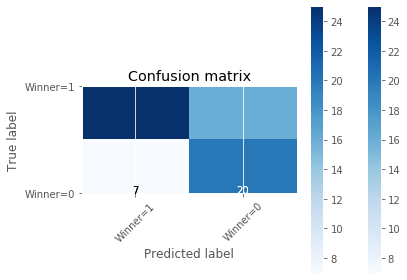

              precision    recall  f1-score   support

         0.0       0.56      0.74      0.63        27
         1.0       0.78      0.61      0.68        41

    accuracy                           0.66        68
   macro avg       0.67      0.68      0.66        68
weighted avg       0.69      0.66      0.67        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[21  8]
 [16 23]]
[[21  8]
 [16 23]]
44
Confusion matrix, without normalization
[[21  8]
 [16 23]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[21  8]
 [16 23]]
44
Mitjana encerts
46.94886363636363
desviació estandar
3.8409721283154172


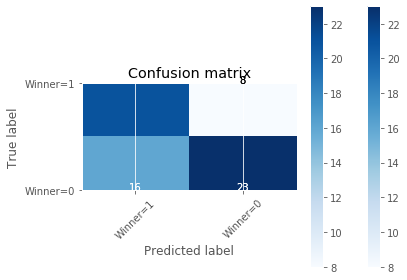

              precision    recall  f1-score   support

         0.0       0.74      0.59      0.66        39
         1.0       0.57      0.72      0.64        29

    accuracy                           0.65        68
   macro avg       0.65      0.66      0.65        68
weighted avg       0.67      0.65      0.65        68

LogLoss: : 0.68
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28  5]
 [14 21]]
[[28  5]
 [14 21]]
49
Confusion matrix, without normalization
[[28  5]
 [14 21]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28  5]
 [14 21]]
49
Mitjana encerts
46.96045197740113
desviació estandar
3.8331907346420695


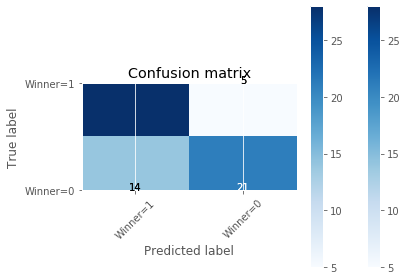

              precision    recall  f1-score   support

         0.0       0.81      0.60      0.69        35
         1.0       0.67      0.85      0.75        33

    accuracy                           0.72        68
   macro avg       0.74      0.72      0.72        68
weighted avg       0.74      0.72      0.72        68

LogLoss: : 0.65
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26 10]
 [12 20]]
[[26 10]
 [12 20]]
46
Confusion matrix, without normalization
[[26 10]
 [12 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26 10]
 [12 20]]
46
Mitjana encerts
46.95505617977528
desviació estandar
3.8230822095677586


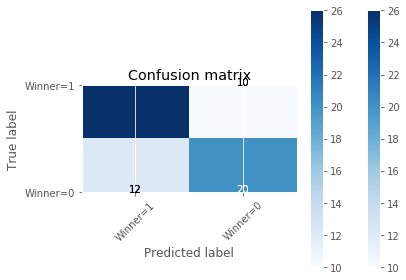

              precision    recall  f1-score   support

         0.0       0.67      0.62      0.65        32
         1.0       0.68      0.72      0.70        36

    accuracy                           0.68        68
   macro avg       0.68      0.67      0.67        68
weighted avg       0.68      0.68      0.68        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[31  9]
 [ 9 19]]
[[31  9]
 [ 9 19]]
50
Confusion matrix, without normalization
[[31  9]
 [ 9 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[31  9]
 [ 9 19]]
50
Mitjana encerts
46.97206703910614
desviació estandar
3.8191375896223816


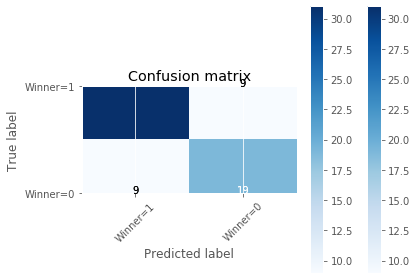

              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68        28
         1.0       0.78      0.78      0.78        40

    accuracy                           0.74        68
   macro avg       0.73      0.73      0.73        68
weighted avg       0.74      0.74      0.74        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[31  7]
 [13 17]]
[[31  7]
 [13 17]]
48
Confusion matrix, without normalization
[[31  7]
 [13 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[31  7]
 [13 17]]
48
Mitjana encerts
46.977777777777774
desviació estandar
3.809280415505088


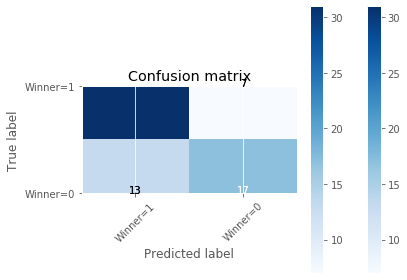

              precision    recall  f1-score   support

         0.0       0.71      0.57      0.63        30
         1.0       0.70      0.82      0.76        38

    accuracy                           0.71        68
   macro avg       0.71      0.69      0.69        68
weighted avg       0.71      0.71      0.70        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28  9]
 [11 20]]
[[28  9]
 [11 20]]
48
Confusion matrix, without normalization
[[28  9]
 [11 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28  9]
 [11 20]]
48
Mitjana encerts
46.98342541436464
desviació estandar
3.7994985684309457


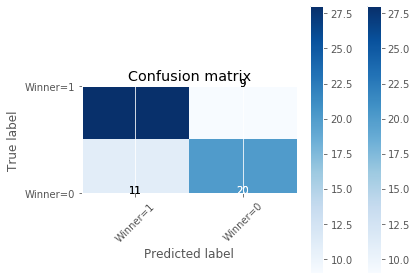

              precision    recall  f1-score   support

         0.0       0.69      0.65      0.67        31
         1.0       0.72      0.76      0.74        37

    accuracy                           0.71        68
   macro avg       0.70      0.70      0.70        68
weighted avg       0.71      0.71      0.70        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[26 13]
 [11 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26 13]
 [11 18]]
44
Confusion matrix, without normalization
[[26 13]
 [11 18]]
[[26 13]
 [11 18]]
44
Mitjana encerts
46.967032967032964
desviació estandar
3.795458678648835


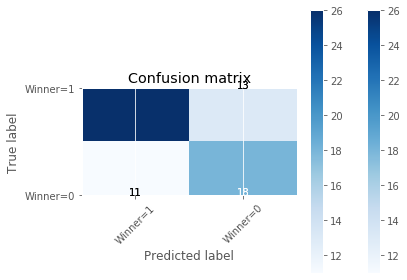

              precision    recall  f1-score   support

         0.0       0.58      0.62      0.60        29
         1.0       0.70      0.67      0.68        39

    accuracy                           0.65        68
   macro avg       0.64      0.64      0.64        68
weighted avg       0.65      0.65      0.65        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28 11]
 [ 7 22]]
[[28 11]
 [ 7 22]]
50
Confusion matrix, without normalization
[[28 11]
 [ 7 22]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28 11]
 [ 7 22]]
50
Mitjana encerts
46.98360655737705
desviació estandar
3.791672511618961


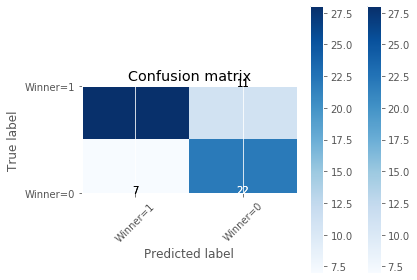

              precision    recall  f1-score   support

         0.0       0.67      0.76      0.71        29
         1.0       0.80      0.72      0.76        39

    accuracy                           0.74        68
   macro avg       0.73      0.74      0.73        68
weighted avg       0.74      0.74      0.74        68

LogLoss: : 0.59
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[24 12]
 [11 21]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[24 12]
 [11 21]]
45
Confusion matrix, without normalization
[[24 12]
 [11 21]]
[[24 12]
 [11 21]]
45
Mitjana encerts
46.97282608695652
desviació estandar
3.7841661898445937


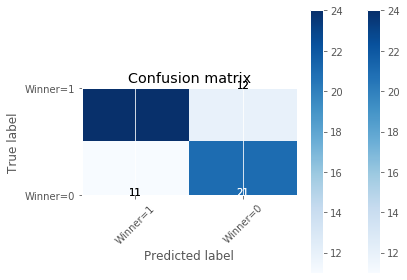

              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65        32
         1.0       0.69      0.67      0.68        36

    accuracy                           0.66        68
   macro avg       0.66      0.66      0.66        68
weighted avg       0.66      0.66      0.66        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[21 14]
 [15 18]]
[[21 14]
 [15 18]]
39
Confusion matrix, without normalization
[[21 14]
 [15 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[21 14]
 [15 18]]
39
Mitjana encerts
46.92972972972973
desviació estandar
3.8189332644477214


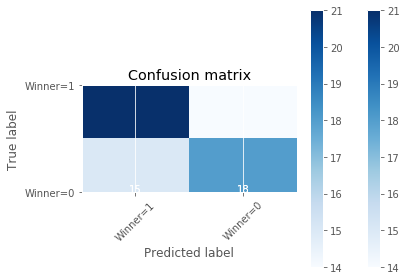

              precision    recall  f1-score   support

         0.0       0.56      0.55      0.55        33
         1.0       0.58      0.60      0.59        35

    accuracy                           0.57        68
   macro avg       0.57      0.57      0.57        68
weighted avg       0.57      0.57      0.57        68

LogLoss: : 0.67
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29  9]
 [ 8 22]]
[[29  9]
 [ 8 22]]
51
Confusion matrix, without normalization
[[29  9]
 [ 8 22]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29  9]
 [ 8 22]]
51
Mitjana encerts
46.95161290322581
desviació estandar
3.820266074819155


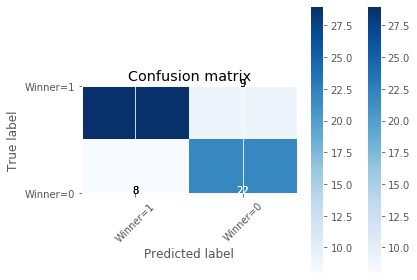

              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72        30
         1.0       0.78      0.76      0.77        38

    accuracy                           0.75        68
   macro avg       0.75      0.75      0.75        68
weighted avg       0.75      0.75      0.75        68

LogLoss: : 0.56
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[34  9]
 [12 13]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[34  9]
 [12 13]]
47
Confusion matrix, without normalization
[[34  9]
 [12 13]]
[[34  9]
 [12 13]]
47
Mitjana encerts
46.95187165775401
desviació estandar
3.8100394013989884


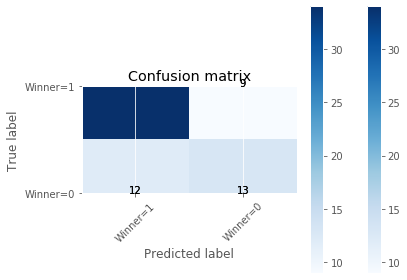

              precision    recall  f1-score   support

         0.0       0.59      0.52      0.55        25
         1.0       0.74      0.79      0.76        43

    accuracy                           0.69        68
   macro avg       0.67      0.66      0.66        68
weighted avg       0.68      0.69      0.69        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[31 10]
 [ 7 20]]
[[31 10]
 [ 7 20]]
51
Confusion matrix, without normalization
[[31 10]
 [ 7 20]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[31 10]
 [ 7 20]]
51
Mitjana encerts
46.973404255319146
desviació estandar
3.811284351901039


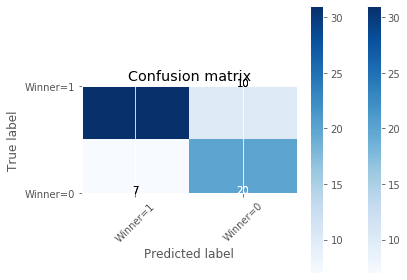

              precision    recall  f1-score   support

         0.0       0.67      0.74      0.70        27
         1.0       0.82      0.76      0.78        41

    accuracy                           0.75        68
   macro avg       0.74      0.75      0.74        68
weighted avg       0.76      0.75      0.75        68

LogLoss: : 0.58
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27 13]
 [ 9 19]]
[[27 13]
 [ 9 19]]
46
Confusion matrix, without normalization
[[27 13]
 [ 9 19]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27 13]
 [ 9 19]]
46
Mitjana encerts
46.96825396825397
desviació estandar
3.8018441110196557


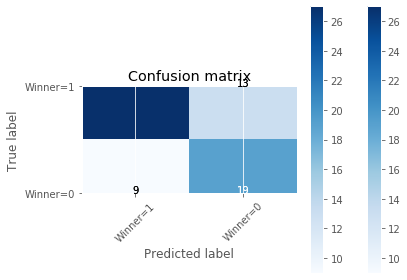

              precision    recall  f1-score   support

         0.0       0.59      0.68      0.63        28
         1.0       0.75      0.68      0.71        40

    accuracy                           0.68        68
   macro avg       0.67      0.68      0.67        68
weighted avg       0.69      0.68      0.68        68

LogLoss: : 0.64
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[33 11]
 [10 14]]
[[33 11]
 [10 14]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


47
Confusion matrix, without normalization
[[33 11]
 [10 14]]
[[33 11]
 [10 14]]
47
Mitjana encerts
46.96842105263158
desviació estandar
3.7918267548114795


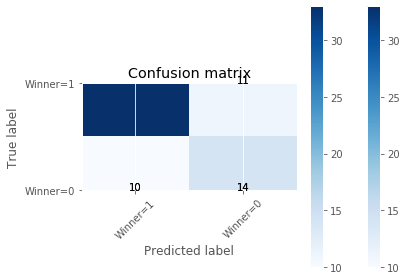

              precision    recall  f1-score   support

         0.0       0.56      0.58      0.57        24
         1.0       0.77      0.75      0.76        44

    accuracy                           0.69        68
   macro avg       0.66      0.67      0.67        68
weighted avg       0.69      0.69      0.69        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[33  9]
 [11 15]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[33  9]
 [11 15]]
48
Confusion matrix, without normalization
[[33  9]
 [11 15]]
[[33  9]
 [11 15]]
48
Mitjana encerts
46.973821989528794
desviació estandar
3.7826201547773706


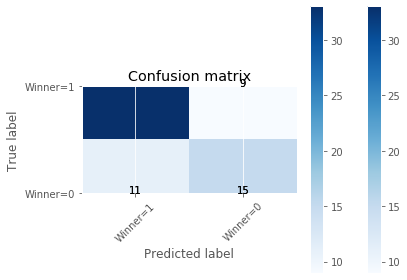

              precision    recall  f1-score   support

         0.0       0.62      0.58      0.60        26
         1.0       0.75      0.79      0.77        42

    accuracy                           0.71        68
   macro avg       0.69      0.68      0.68        68
weighted avg       0.70      0.71      0.70        68

LogLoss: : 0.61
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[33  6]
 [ 7 22]]
[[33  6]
 [ 7 22]]
55
Confusion matrix, without normalization
[[33  6]
 [ 7 22]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[33  6]
 [ 7 22]]
55
Mitjana encerts
47.015625
desviació estandar
3.816734755351534


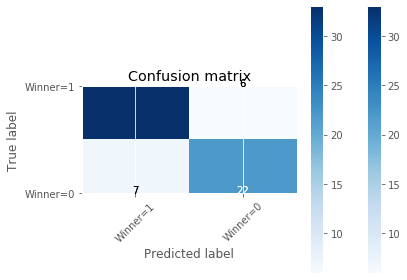

              precision    recall  f1-score   support

         0.0       0.79      0.76      0.77        29
         1.0       0.82      0.85      0.84        39

    accuracy                           0.81        68
   macro avg       0.81      0.80      0.80        68
weighted avg       0.81      0.81      0.81        68

LogLoss: : 0.54
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[20 10]
 [16 22]]
[[20 10]
 [16 22]]
42
Confusion matrix, without normalization
[[20 10]
 [16 22]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[20 10]
 [16 22]]
42
Mitjana encerts
46.98963730569948
desviació estandar
3.82382717608915


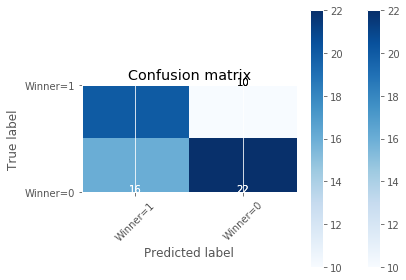

              precision    recall  f1-score   support

         0.0       0.69      0.58      0.63        38
         1.0       0.56      0.67      0.61        30

    accuracy                           0.62        68
   macro avg       0.62      0.62      0.62        68
weighted avg       0.63      0.62      0.62        68

LogLoss: : 0.66
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[25 10]
 [17 16]]
[[25 10]
 [17 16]]
41
Confusion matrix, without normalization
[[25 10]
 [17 16]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[25 10]
 [17 16]]
41
Mitjana encerts
46.95876288659794
desviació estandar
3.8380018581763173


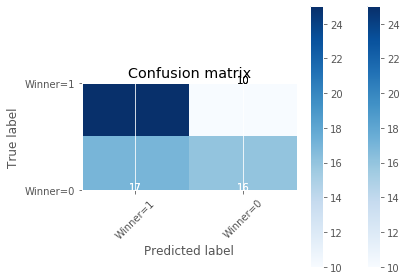

              precision    recall  f1-score   support

         0.0       0.62      0.48      0.54        33
         1.0       0.60      0.71      0.65        35

    accuracy                           0.60        68
   macro avg       0.61      0.60      0.60        68
weighted avg       0.61      0.60      0.60        68

LogLoss: : 0.67
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[29  9]
 [13 17]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[29  9]
 [13 17]]
46
Confusion matrix, without normalization
[[29  9]
 [13 17]]
[[29  9]
 [13 17]]
46
Mitjana encerts
46.95384615384615
desviació estandar
3.828760672074407


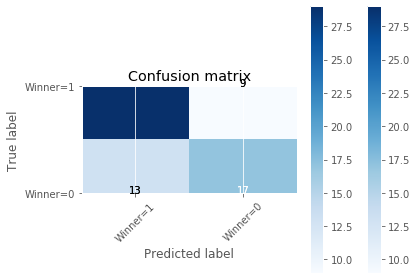

              precision    recall  f1-score   support

         0.0       0.65      0.57      0.61        30
         1.0       0.69      0.76      0.72        38

    accuracy                           0.68        68
   macro avg       0.67      0.66      0.67        68
weighted avg       0.67      0.68      0.67        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27  7]
 [13 21]]
[[27  7]
 [13 21]]
48
Confusion matrix, without normalization
[[27  7]
 [13 21]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27  7]
 [13 21]]
48
Mitjana encerts
46.95918367346939
desviació estandar
3.8197082038007073


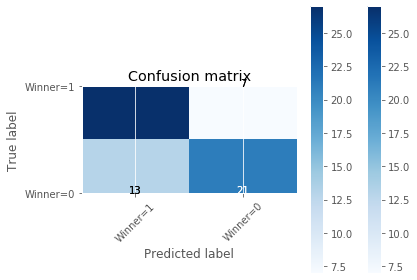

              precision    recall  f1-score   support

         0.0       0.75      0.62      0.68        34
         1.0       0.68      0.79      0.73        34

    accuracy                           0.71        68
   macro avg       0.71      0.71      0.70        68
weighted avg       0.71      0.71      0.70        68

LogLoss: : 0.63
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[34  7]
 [ 6 21]]
[[34  7]
 [ 6 21]]
55
Confusion matrix, without normalization
[[34  7]
 [ 6 21]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[34  7]
 [ 6 21]]
55
Mitjana encerts
47.0
desviació estandar
3.8526146438371733


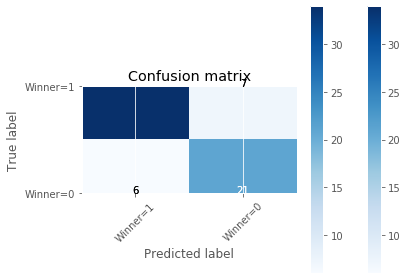

              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76        27
         1.0       0.85      0.83      0.84        41

    accuracy                           0.81        68
   macro avg       0.80      0.80      0.80        68
weighted avg       0.81      0.81      0.81        68

LogLoss: : 0.53
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[27 12]
 [15 14]]
[[27 12]
 [15 14]]
41
Confusion matrix, without normalization
[[27 12]
 [15 14]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[27 12]
 [15 14]]
41
Mitjana encerts
46.96969696969697
desviació estandar
3.8663389240791353


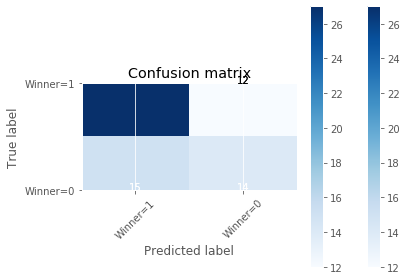

              precision    recall  f1-score   support

         0.0       0.54      0.48      0.51        29
         1.0       0.64      0.69      0.67        39

    accuracy                           0.60        68
   macro avg       0.59      0.59      0.59        68
weighted avg       0.60      0.60      0.60        68

LogLoss: : 0.65
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[28  9]
 [13 18]]
[[28  9]
 [13 18]]
46
Confusion matrix, without normalization
[[28  9]
 [13 18]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[28  9]
 [13 18]]
46
Mitjana encerts
46.96482412060301
desviació estandar
3.857221751783694


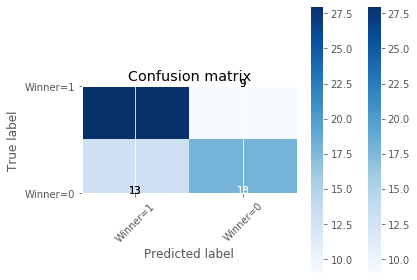

              precision    recall  f1-score   support

         0.0       0.67      0.58      0.62        31
         1.0       0.68      0.76      0.72        37

    accuracy                           0.68        68
   macro avg       0.67      0.67      0.67        68
weighted avg       0.68      0.68      0.67        68

LogLoss: : 0.60
Train set: (903, 4) (903,)
Test set: (68, 4) (68,)
Confusion matrix, without normalization
[[33  8]
 [ 6 21]]
[[33  8]
 [ 6 21]]
54
Confusion matrix, without normalization
[[33  8]
 [ 6 21]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[33  8]
 [ 6 21]]
54
Mitjana encerts
47.0
desviació estandar
3.8794329482541645


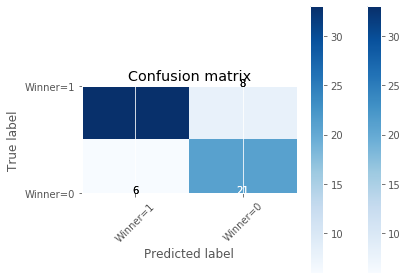

              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75        27
         1.0       0.85      0.80      0.83        41

    accuracy                           0.79        68
   macro avg       0.79      0.79      0.79        68
weighted avg       0.80      0.79      0.80        68

LogLoss: : 0.56


In [20]:
dev=[]
correct=[]
correct_average=[]
random=[]
N=200
adjustment=0
for m in range(N):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.07, random_state=m+280)

    print ('Train set:', X_train.shape,  y_train.shape)
    print ('Test set:', X_test.shape,  y_test.shape)

    LR = LogisticRegression(C=0.9, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)

    jaccard_similarity_score(y_test, yhat)

    
    Visitor,PTSV,Home,PTSH,New_Date,yhat_prob_bets_visitor,yhat_prob_bets_local,bet_visitor,bet_home,Winner=identify_tests(X,X_test,dataframe)
    
    data['New Date']=New_Date
    data['Visitor']=Visitor
    data['PTSV']=PTSV
    data['Home']=Home
    data['PTSH']=PTSH
    data['Probability Visitor']=yhat_prob_bets_visitor
    data['Probability Home']=yhat_prob_bets_local
    data['Bet Visitor']=bet_visitor
    data['Bet Home']=bet_home
    data['Winner']=Winner
    save_simulation='NBA_test'+str(m)+'.csv'
    data.to_csv(save_simulation, index=False)
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Winner=1','Winner=0'],normalize= False,  title='Confusion matrix')
    ad=plot_confusion_matrix(cnf_matrix, classes=['Winner=1','Winner=0'],normalize= False,  title='Confusion matrix')
    adjustment=adjustment+ad
    random=np.append(random,m)
    correct=np.append(correct,ad)
    dev=np.append(dev,ad)
    print('Mitjana encerts')
    print(adjustment/(m+1))
    correct_average=np.append(correct_average,(adjustment/(m+1)))
    st_dev=np.std(dev)
    print('desviació estandar')
    print(st_dev)
    plt.show()

    print (classification_report(y_test, yhat))

    log_loss(y_test, yhat_prob)
    
    LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
    yhat_prob2 = LR2.predict_proba(X_test)
    print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))


##### We can see that we predict much better the matches that are won by the local team. We reach an average accuracy of 207/302 wich is a 68.5% of accuracy

## We want to see how is the deviation of the predicted accuracy

In [21]:
# let's quickly view the 2013 data
dframe=pd.DataFrame(columns=['Random State','Accuracy (%)'])
dframe['Random State']=random
dframe['Accuracy (%)']=correct/float(X_test.shape[0])*100
dframe['Correct']=correct

dframe

Random State  Accuracy (%)  Correct
0             0.0     64.705882     44.0
1             1.0     63.235294     43.0
2             2.0     69.117647     47.0
3             3.0     75.000000     51.0
4             4.0     67.647059     46.0
..            ...           ...      ...
195         195.0     70.588235     48.0
196         196.0     80.882353     55.0
197         197.0     60.294118     41.0
198         198.0     67.647059     46.0
199         199.0     79.411765     54.0

[200 rows x 3 columns]

[ 7  8 18 39 37 46 20 13  8  4]
[55.88 58.82 61.76 64.71 67.65 70.59 73.53 76.47 79.41 82.35 85.29]


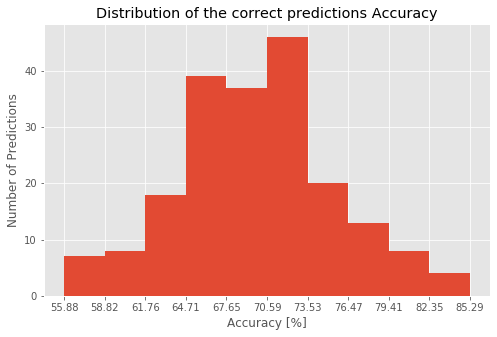

In [22]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(dframe['Accuracy (%)'],bins=int(10))
dframe['Accuracy (%)'].plot(kind='hist', figsize=(8, 5),xticks=bin_edges)

print(count) # frequency count
print(bin_edges) # bin ranges=test.shape/2

plt.title('Distribution of the correct predictions Accuracy') # add a title to the histogram
plt.ylabel('Number of Predictions') # add y-label
plt.xlabel('Accuracy [%]') # add x-label

plt.show()

In [23]:

df_corr=dframe.groupby('Correct').count()
df_corr.drop(['Accuracy (%)'],axis=1,inplace=True)
df_corr.rename(columns={"Random State": "Quantity"},inplace=True)
df_corr['Quantity']
print(type(df_corr))

<class 'pandas.core.frame.DataFrame'>


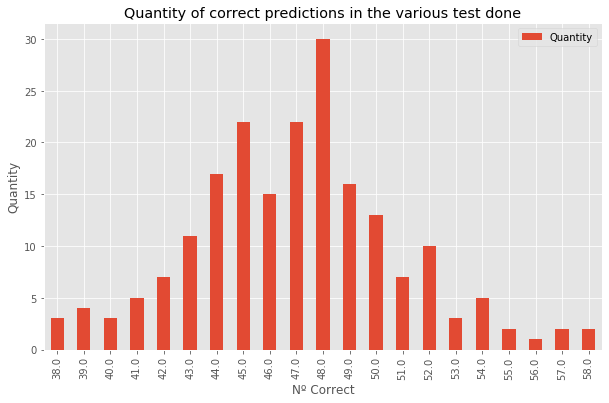

In [24]:
#print(df_corr.loc['Random State', 'Nº Correct'])
# step 2: plot data
df_corr.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Nº Correct') # add to x-label to the plot
plt.ylabel('Quantity') # add y-label to the plot
plt.title('Quantity of correct predictions in the various test done') # add title to the plot

plt.show()


In [25]:
df_corr

Quantity
Correct          
38.0            3
39.0            4
40.0            3
41.0            5
42.0            7
43.0           11
44.0           17
45.0           22
46.0           15
47.0           22
48.0           30
49.0           16
50.0           13
51.0            7
52.0           10
53.0            3
54.0            5
55.0            2
56.0            1
57.0            2
58.0            2

Now I want to calculate the %of accuracy that we need to not lose money in the bets aproximately, we are going to do this calculating the average payback of the bets

In [26]:
best=0
for i in range (len(dataframe)):
    best=best+min(dataframe['Bet Home'][i],dataframe['Bet Visitor'][i])
avg_bet=best/float(len(dataframe))
accuracy_required=1/float(avg_bet)
print(accuracy_required,avg_bet)
    

0.6858507091597452 1.4580432543769297


Now we can say that the tests that get less than 68.5% of accuracy would make us lose money and above this accuracy we would win money.
For instance in the tests done we have that 46 or less correct predictions. would made us lose money. In the next graph we can see that 40 tests make us lose money and 60 are above the limit of accuracy.

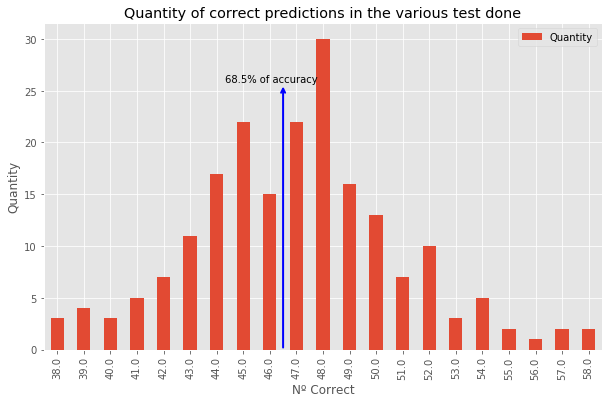

In [27]:
#print(df_corr.loc['Random State', 'Nº Correct'])
# step 2: plot data
colors=[]
for i,e in enumerate(df_corr['Quantity']):
    if i<=8:
        colors=colors+['red']
    else:
        colors=colors+['green']
        
df_corr.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Nº Correct') # add to x-label to the plot
plt.ylabel('Quantity') # add y-label to the plot
plt.title('Quantity of correct predictions in the various test done') # add title to the plot

# Annotate Text
plt.annotate('68.5% of accuracy', # text to display
             xy=(6.3, 25.6),                    # start the text at at point (year 2008 , pop 30)
             rotation=0,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )
# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(8.5, 25.6),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(8.5, 0),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

How many test we have to do to get a correct accuracy?

In [28]:
average=pd.DataFrame()
average['Average Correct']=correct_average
average

Average Correct
0          44.000000
1          43.500000
2          44.666667
3          46.250000
4          46.200000
..               ...
195        46.959184
196        47.000000
197        46.969697
198        46.964824
199        47.000000

[200 rows x 1 columns]

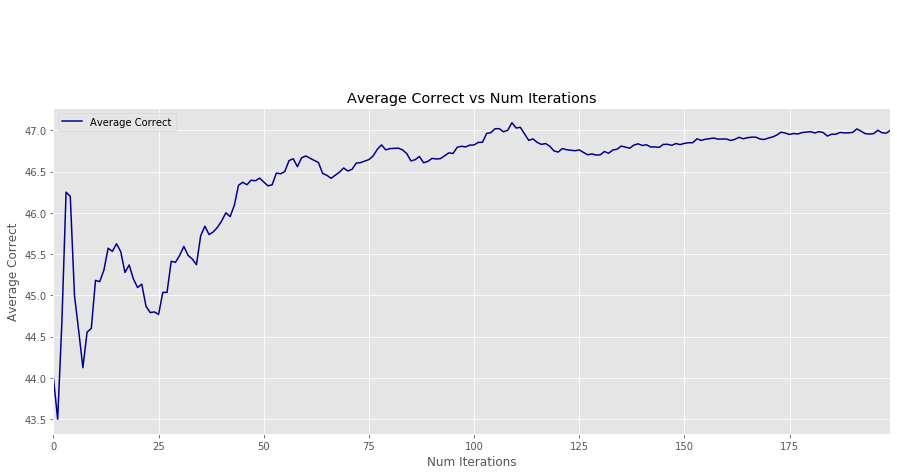

In [29]:
average.plot(kind='line', y='Average Correct', figsize=(15,6), color='darkblue')

plt.title('Average Correct vs Num Iterations')
plt.xlabel('Num Iterations')
plt.ylabel('Average Correct')

# Annotate Text
plt.annotate('Stable average Num iter = 50', # text to display
             xy=(59, 42.9),                    # start the text at at point (year 2008 , pop 30)
             rotation=0,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )
# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(50, 43),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(50,48.5),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='-', connectionstyle='arc3', color='red', lw=2)
            )
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(57, 43),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(50,43),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
            )

plt.show()

Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[91 26]
 [33 54]]
[[91 26]
 [33 54]]
145
Confusion matrix, without normalization
[[91 26]
 [33 54]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[91 26]
 [33 54]]
145
Mitjana encerts
145.0
desviació estandar
0.0


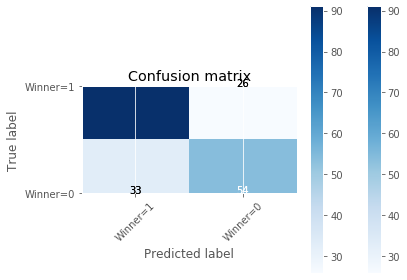

              precision    recall  f1-score   support

         0.0       0.68      0.62      0.65        87
         1.0       0.73      0.78      0.76       117

    accuracy                           0.71       204
   macro avg       0.70      0.70      0.70       204
weighted avg       0.71      0.71      0.71       204

LogLoss: : 0.60
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[72 29]
 [44 59]]
[[72 29]
 [44 59]]
131
Confusion matrix, without normalization
[[72 29]
 [44 59]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[72 29]
 [44 59]]
131
Mitjana encerts
138.0
desviació estandar
7.0


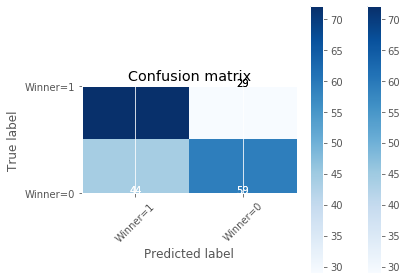

              precision    recall  f1-score   support

         0.0       0.67      0.57      0.62       103
         1.0       0.62      0.71      0.66       101

    accuracy                           0.64       204
   macro avg       0.65      0.64      0.64       204
weighted avg       0.65      0.64      0.64       204

LogLoss: : 0.62
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[78 28]
 [44 54]]
[[78 28]
 [44 54]]
132
Confusion matrix, without normalization
[[78 28]
 [44 54]]
[[78 28]
 [44 54]]
132
Mitjana encerts
136.0
desviació estandar
6.377042156569663


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


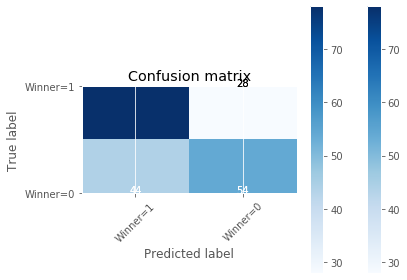

              precision    recall  f1-score   support

         0.0       0.66      0.55      0.60        98
         1.0       0.64      0.74      0.68       106

    accuracy                           0.65       204
   macro avg       0.65      0.64      0.64       204
weighted avg       0.65      0.65      0.64       204

LogLoss: : 0.63
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[84 30]
 [42 48]]
[[84 30]
 [42 48]]
132
Confusion matrix, without normalization
[[84 30]
 [42 48]]
[[84 30]
 [42 48]]
132
Mitjana encerts
135.0
desviació estandar
5.787918451395113


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


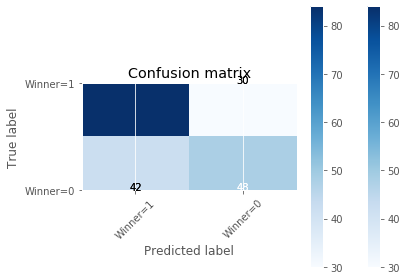

              precision    recall  f1-score   support

         0.0       0.62      0.53      0.57        90
         1.0       0.67      0.74      0.70       114

    accuracy                           0.65       204
   macro avg       0.64      0.64      0.64       204
weighted avg       0.64      0.65      0.64       204

LogLoss: : 0.64
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[88 24]
 [39 53]]
[[88 24]
 [39 53]]
141
Confusion matrix, without normalization
[[88 24]
 [39 53]]
[[88 24]
 [39 53]]
141
Mitjana encerts
136.2
desviació estandar
5.706137047074842


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


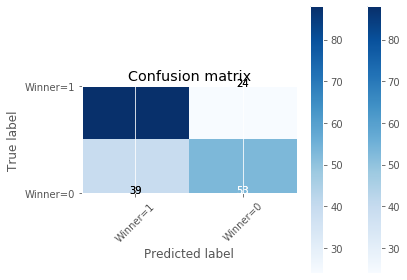

              precision    recall  f1-score   support

         0.0       0.69      0.58      0.63        92
         1.0       0.69      0.79      0.74       112

    accuracy                           0.69       204
   macro avg       0.69      0.68      0.68       204
weighted avg       0.69      0.69      0.69       204

LogLoss: : 0.60
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[84 21]
 [36 63]]
[[84 21]
 [36 63]]
147
Confusion matrix, without normalization
[[84 21]
 [36 63]]
[[84 21]
 [36 63]]
147
Mitjana encerts
138.0
desviació estandar
6.582805886043833


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


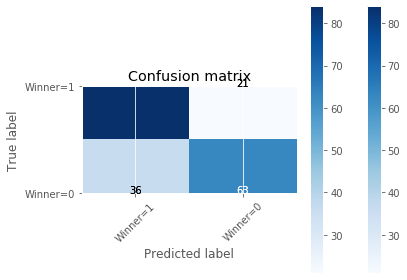

              precision    recall  f1-score   support

         0.0       0.75      0.64      0.69        99
         1.0       0.70      0.80      0.75       105

    accuracy                           0.72       204
   macro avg       0.72      0.72      0.72       204
weighted avg       0.72      0.72      0.72       204

LogLoss: : 0.61
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[82 27]
 [38 57]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[82 27]
 [38 57]]
139
Confusion matrix, without normalization
[[82 27]
 [38 57]]
[[82 27]
 [38 57]]
139
Mitjana encerts
138.14285714285714
desviació estandar
6.104531605491856


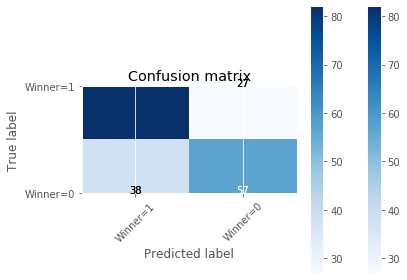

              precision    recall  f1-score   support

         0.0       0.68      0.60      0.64        95
         1.0       0.68      0.75      0.72       109

    accuracy                           0.68       204
   macro avg       0.68      0.68      0.68       204
weighted avg       0.68      0.68      0.68       204

LogLoss: : 0.61
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[79 31]
 [29 65]]
[[79 31]
 [29 65]]
144
Confusion matrix, without normalization
[[79 31]
 [29 65]]
[[79 31]
 [29 65]]
144
Mitjana encerts
138.875
desviació estandar
6.029873547596169


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


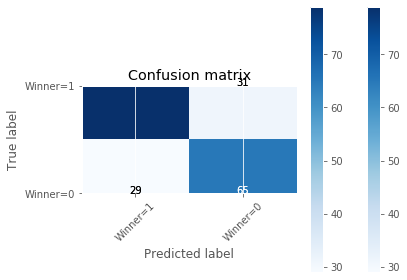

              precision    recall  f1-score   support

         0.0       0.68      0.69      0.68        94
         1.0       0.73      0.72      0.72       110

    accuracy                           0.71       204
   macro avg       0.70      0.70      0.70       204
weighted avg       0.71      0.71      0.71       204

LogLoss: : 0.61
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[83 22]
 [34 65]]
[[83 22]
 [34 65]]
148
Confusion matrix, without normalization
[[83 22]
 [34 65]]
[[83 22]
 [34 65]]
148
Mitjana encerts
139.88888888888889
desviació estandar
6.367355014175291


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


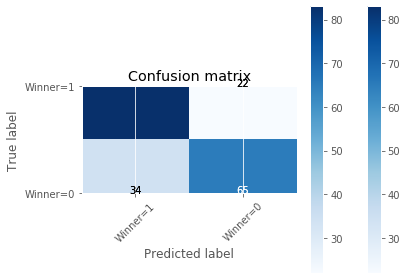

              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70        99
         1.0       0.71      0.79      0.75       105

    accuracy                           0.73       204
   macro avg       0.73      0.72      0.72       204
weighted avg       0.73      0.73      0.72       204

LogLoss: : 0.61
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[85 30]
 [34 55]]
[[85 30]
 [34 55]]
140
Confusion matrix, without normalization
[[85 30]
 [34 55]]
[[85 30]
 [34 55]]
140
Mitjana encerts
139.9
desviació estandar
6.040695324215582


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


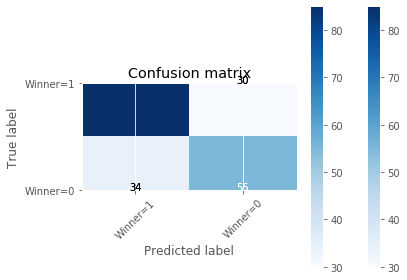

              precision    recall  f1-score   support

         0.0       0.65      0.62      0.63        89
         1.0       0.71      0.74      0.73       115

    accuracy                           0.69       204
   macro avg       0.68      0.68      0.68       204
weighted avg       0.68      0.69      0.69       204

LogLoss: : 0.61
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[79 41]
 [25 59]]
[[79 41]
 [25 59]]
138
Confusion matrix, without normalization
[[79 41]
 [25 59]]
[[79 41]
 [25 59]]
138
Mitjana encerts
139.72727272727272
desviació estandar
5.785419118799025


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


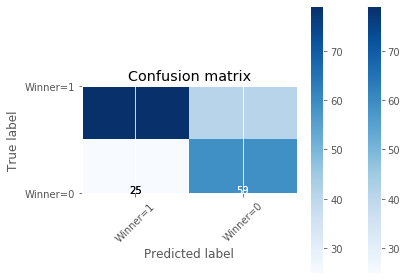

              precision    recall  f1-score   support

         0.0       0.59      0.70      0.64        84
         1.0       0.76      0.66      0.71       120

    accuracy                           0.68       204
   macro avg       0.67      0.68      0.67       204
weighted avg       0.69      0.68      0.68       204

LogLoss: : 0.63
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[79 35]
 [36 54]]
[[79 35]
 [36 54]]
133
Confusion matrix, without normalization
[[79 35]
 [36 54]]
[[79 35]
 [36 54]]
133
Mitjana encerts
139.16666666666666
desviació estandar
5.842849380986034


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


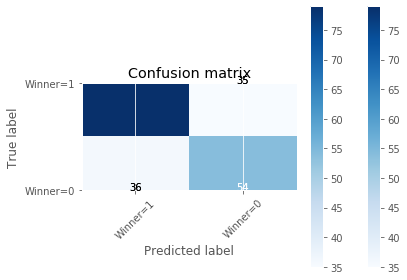

              precision    recall  f1-score   support

         0.0       0.61      0.60      0.60        90
         1.0       0.69      0.69      0.69       114

    accuracy                           0.65       204
   macro avg       0.65      0.65      0.65       204
weighted avg       0.65      0.65      0.65       204

LogLoss: : 0.64
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[88 30]
 [39 47]]
[[88 30]
 [39 47]]
135
Confusion matrix, without normalization
[[88 30]
 [39 47]]
[[88 30]
 [39 47]]
135
Mitjana encerts
138.84615384615384
desviació estandar
5.722373819506858


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


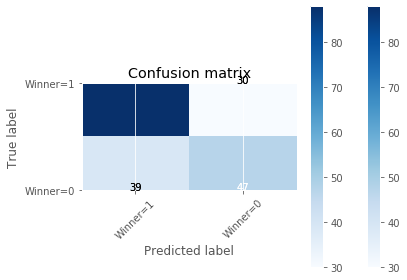

              precision    recall  f1-score   support

         0.0       0.61      0.55      0.58        86
         1.0       0.69      0.75      0.72       118

    accuracy                           0.66       204
   macro avg       0.65      0.65      0.65       204
weighted avg       0.66      0.66      0.66       204

LogLoss: : 0.63
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[85 30]
 [42 47]]
[[85 30]
 [42 47]]
132
Confusion matrix, without normalization
[[85 30]
 [42 47]]
[[85 30]
 [42 47]]
132
Mitjana encerts
138.35714285714286
desviació estandar
5.789240547986323


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


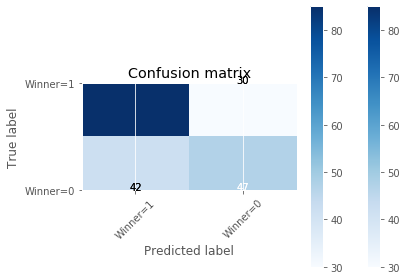

              precision    recall  f1-score   support

         0.0       0.61      0.53      0.57        89
         1.0       0.67      0.74      0.70       115

    accuracy                           0.65       204
   macro avg       0.64      0.63      0.63       204
weighted avg       0.64      0.65      0.64       204

LogLoss: : 0.61
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[82 23]
 [36 63]]
[[82 23]
 [36 63]]
145
Confusion matrix, without normalization
[[82 23]
 [36 63]]
[[82 23]
 [36 63]]
145
Mitjana encerts
138.8
desviació estandar
5.833238094460628


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


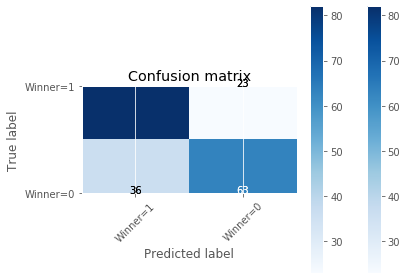

              precision    recall  f1-score   support

         0.0       0.73      0.64      0.68        99
         1.0       0.69      0.78      0.74       105

    accuracy                           0.71       204
   macro avg       0.71      0.71      0.71       204
weighted avg       0.71      0.71      0.71       204

LogLoss: : 0.60
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[81 29]
 [32 62]]
[[81 29]
 [32 62]]
143
Confusion matrix, without normalization
[[81 29]
 [32 62]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[81 29]
 [32 62]]
143
Mitjana encerts
139.0625
desviació estandar
5.738779813688621


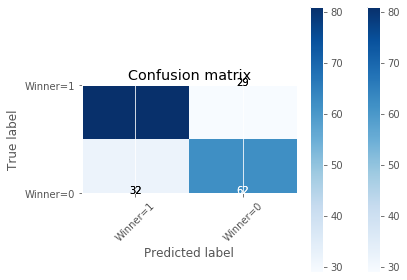

              precision    recall  f1-score   support

         0.0       0.68      0.66      0.67        94
         1.0       0.72      0.74      0.73       110

    accuracy                           0.70       204
   macro avg       0.70      0.70      0.70       204
weighted avg       0.70      0.70      0.70       204

LogLoss: : 0.61
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[74 32]
 [37 61]]
[[74 32]
 [37 61]]
135
Confusion matrix, without normalization
[[74 32]
 [37 61]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[74 32]
 [37 61]]
135
Mitjana encerts
138.8235294117647
desviació estandar
5.64889675972894


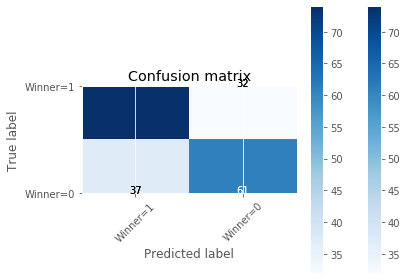

              precision    recall  f1-score   support

         0.0       0.66      0.62      0.64        98
         1.0       0.67      0.70      0.68       106

    accuracy                           0.66       204
   macro avg       0.66      0.66      0.66       204
weighted avg       0.66      0.66      0.66       204

LogLoss: : 0.63
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[84 43]
 [27 50]]
[[84 43]
 [27 50]]
134
Confusion matrix, without normalization
[[84 43]
 [27 50]]
[[84 43]
 [27 50]]
134
Mitjana encerts
138.55555555555554
desviació estandar
5.599823630379624


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


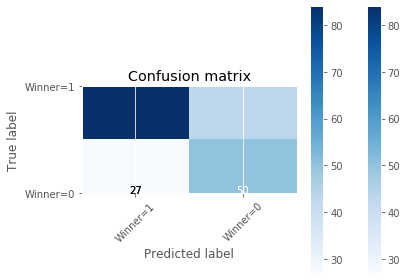

              precision    recall  f1-score   support

         0.0       0.54      0.65      0.59        77
         1.0       0.76      0.66      0.71       127

    accuracy                           0.66       204
   macro avg       0.65      0.66      0.65       204
weighted avg       0.67      0.66      0.66       204

LogLoss: : 0.65
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[83 25]
 [33 63]]
[[83 25]
 [33 63]]
146
Confusion matrix, without normalization
[[83 25]
 [33 63]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[83 25]
 [33 63]]
146
Mitjana encerts
138.94736842105263
desviació estandar
5.698325554706735


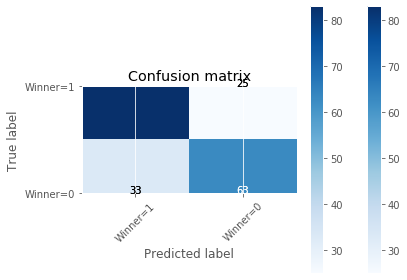

              precision    recall  f1-score   support

         0.0       0.72      0.66      0.68        96
         1.0       0.72      0.77      0.74       108

    accuracy                           0.72       204
   macro avg       0.72      0.71      0.71       204
weighted avg       0.72      0.72      0.71       204

LogLoss: : 0.60
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[75 32]
 [33 64]]
[[75 32]
 [33 64]]
139
Confusion matrix, without normalization
[[75 32]
 [33 64]]
[[75 32]
 [33 64]]
139
Mitjana encerts
138.95
desviació estandar
5.5540525744720854


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


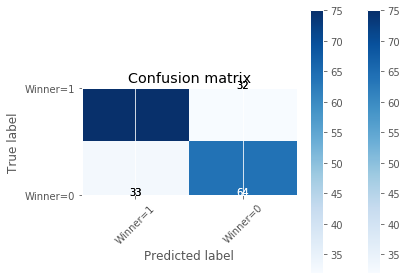

              precision    recall  f1-score   support

         0.0       0.67      0.66      0.66        97
         1.0       0.69      0.70      0.70       107

    accuracy                           0.68       204
   macro avg       0.68      0.68      0.68       204
weighted avg       0.68      0.68      0.68       204

LogLoss: : 0.61
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[84 32]
 [28 60]]
[[84 32]
 [28 60]]
144
Confusion matrix, without normalization
[[84 32]
 [28 60]]
[[84 32]
 [28 60]]
144
Mitjana encerts
139.1904761904762
desviació estandar
5.525861687763299


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


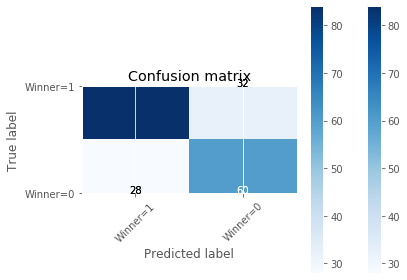

              precision    recall  f1-score   support

         0.0       0.65      0.68      0.67        88
         1.0       0.75      0.72      0.74       116

    accuracy                           0.71       204
   macro avg       0.70      0.70      0.70       204
weighted avg       0.71      0.71      0.71       204

LogLoss: : 0.59
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[87 31]
 [26 60]]
[[87 31]
 [26 60]]
147
Confusion matrix, without normalization
[[87 31]
 [26 60]]
[[87 31]
 [26 60]]
147
Mitjana encerts
139.54545454545453
desviació estandar
5.6385626208948025


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


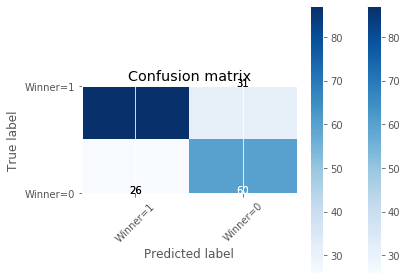

              precision    recall  f1-score   support

         0.0       0.66      0.70      0.68        86
         1.0       0.77      0.74      0.75       118

    accuracy                           0.72       204
   macro avg       0.71      0.72      0.72       204
weighted avg       0.72      0.72      0.72       204

LogLoss: : 0.60
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[88 39]
 [25 52]]
[[88 39]
 [25 52]]
140
Confusion matrix, without normalization
[[88 39]
 [25 52]]
[[88 39]
 [25 52]]
140
Mitjana encerts
139.56521739130434
desviació estandar
5.515402046573733


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


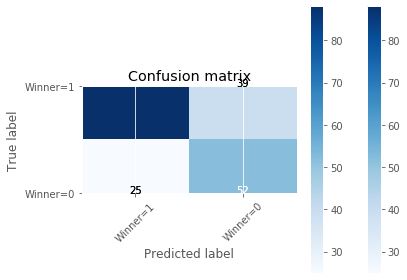

              precision    recall  f1-score   support

         0.0       0.57      0.68      0.62        77
         1.0       0.78      0.69      0.73       127

    accuracy                           0.69       204
   macro avg       0.68      0.68      0.68       204
weighted avg       0.70      0.69      0.69       204

LogLoss: : 0.62
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[94 28]
 [33 49]]
[[94 28]
 [33 49]]
143
Confusion matrix, without normalization
[[94 28]
 [33 49]]
[[94 28]
 [33 49]]
143
Mitjana encerts
139.70833333333334
desviació estandar
5.442725777484006


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


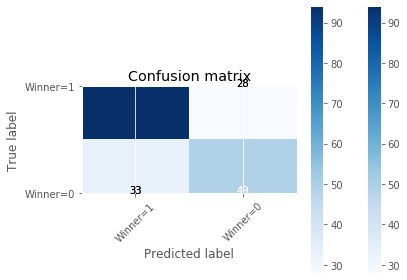

              precision    recall  f1-score   support

         0.0       0.64      0.60      0.62        82
         1.0       0.74      0.77      0.76       122

    accuracy                           0.70       204
   macro avg       0.69      0.68      0.69       204
weighted avg       0.70      0.70      0.70       204

LogLoss: : 0.60
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[80 28]
 [35 61]]
[[80 28]
 [35 61]]
141
Confusion matrix, without normalization
[[80 28]
 [35 61]]
[[80 28]
 [35 61]]
141
Mitjana encerts
139.76
desviació estandar
5.338763901878411


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


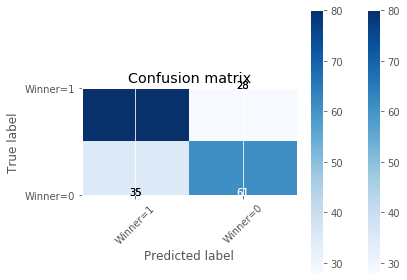

              precision    recall  f1-score   support

         0.0       0.69      0.64      0.66        96
         1.0       0.70      0.74      0.72       108

    accuracy                           0.69       204
   macro avg       0.69      0.69      0.69       204
weighted avg       0.69      0.69      0.69       204

LogLoss: : 0.61
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[78 35]
 [32 59]]
[[78 35]
 [32 59]]
137
Confusion matrix, without normalization
[[78 35]
 [32 59]]
[[78 35]
 [32 59]]
137
Mitjana encerts
139.65384615384616
desviació estandar
5.261926436438008


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


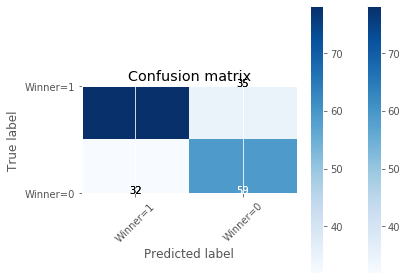

              precision    recall  f1-score   support

         0.0       0.63      0.65      0.64        91
         1.0       0.71      0.69      0.70       113

    accuracy                           0.67       204
   macro avg       0.67      0.67      0.67       204
weighted avg       0.67      0.67      0.67       204

LogLoss: : 0.63
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[83 32]
 [36 53]]
[[83 32]
 [36 53]]
136
Confusion matrix, without normalization
[[83 32]
 [36 53]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[83 32]
 [36 53]]
136
Mitjana encerts
139.5185185185185
desviació estandar
5.2094669548199235


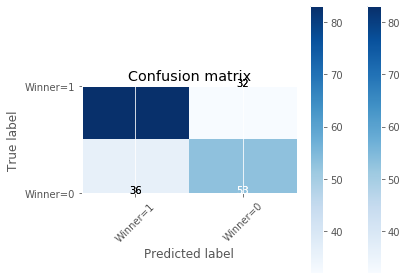

              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61        89
         1.0       0.70      0.72      0.71       115

    accuracy                           0.67       204
   macro avg       0.66      0.66      0.66       204
weighted avg       0.67      0.67      0.67       204

LogLoss: : 0.62
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[80 34]
 [29 61]]
[[80 34]
 [29 61]]
141
Confusion matrix, without normalization
[[80 34]
 [29 61]]
[[80 34]
 [29 61]]
141
Mitjana encerts
139.57142857142858
desviació estandar
5.122977450583174


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


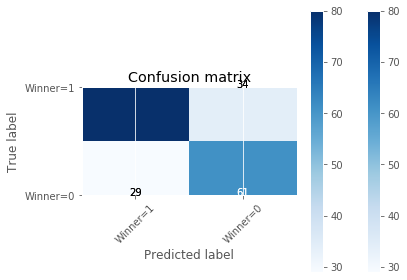

              precision    recall  f1-score   support

         0.0       0.64      0.68      0.66        90
         1.0       0.73      0.70      0.72       114

    accuracy                           0.69       204
   macro avg       0.69      0.69      0.69       204
weighted avg       0.69      0.69      0.69       204

LogLoss: : 0.62
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[81 30]
 [38 55]]
[[81 30]
 [38 55]]
136
Confusion matrix, without normalization
[[81 30]
 [38 55]]
[[81 30]
 [38 55]]
136
Mitjana encerts
139.44827586206895
desviació estandar
5.075880809560606


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


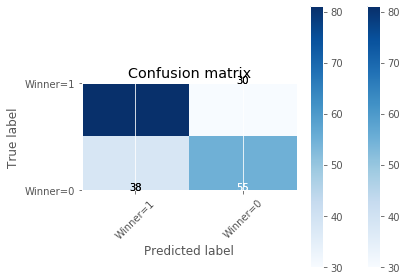

              precision    recall  f1-score   support

         0.0       0.65      0.59      0.62        93
         1.0       0.68      0.73      0.70       111

    accuracy                           0.67       204
   macro avg       0.66      0.66      0.66       204
weighted avg       0.67      0.67      0.66       204

LogLoss: : 0.61
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[82 31]
 [36 55]]
[[82 31]
 [36 55]]
137
Confusion matrix, without normalization
[[82 31]
 [36 55]]
[[82 31]
 [36 55]]
137
Mitjana encerts
139.36666666666667
desviació estandar
5.009879129169573


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


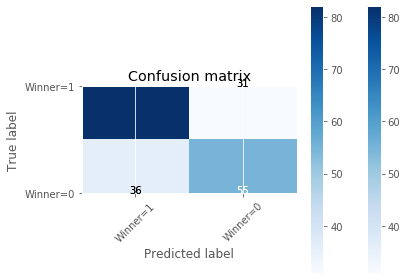

              precision    recall  f1-score   support

         0.0       0.64      0.60      0.62        91
         1.0       0.69      0.73      0.71       113

    accuracy                           0.67       204
   macro avg       0.67      0.67      0.67       204
weighted avg       0.67      0.67      0.67       204

LogLoss: : 0.62
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[84 33]
 [27 60]]
[[84 33]
 [27 60]]
144
Confusion matrix, without normalization
[[84 33]
 [27 60]]
[[84 33]
 [27 60]]
144
Mitjana encerts
139.51612903225808
desviació estandar
4.995940079071531


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


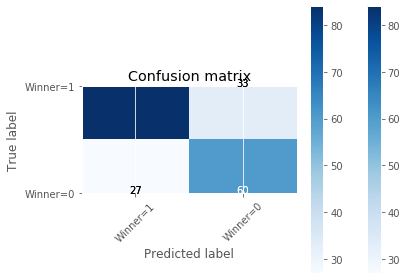

              precision    recall  f1-score   support

         0.0       0.65      0.69      0.67        87
         1.0       0.76      0.72      0.74       117

    accuracy                           0.71       204
   macro avg       0.70      0.70      0.70       204
weighted avg       0.71      0.71      0.71       204

LogLoss: : 0.60
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[89 26]
 [37 52]]
[[89 26]
 [37 52]]
141
Confusion matrix, without normalization
[[89 26]
 [37 52]]
[[89 26]
 [37 52]]
141
Mitjana encerts
139.5625
desviació estandar
4.924032265328894


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


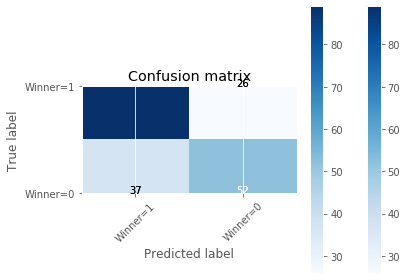

              precision    recall  f1-score   support

         0.0       0.67      0.58      0.62        89
         1.0       0.71      0.77      0.74       115

    accuracy                           0.69       204
   macro avg       0.69      0.68      0.68       204
weighted avg       0.69      0.69      0.69       204

LogLoss: : 0.62
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[78 32]
 [32 62]]
[[78 32]
 [32 62]]
140
Confusion matrix, without normalization
[[78 32]
 [32 62]]
[[78 32]
 [32 62]]
140
Mitjana encerts
139.57575757575756
desviació estandar
4.849431725722366


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


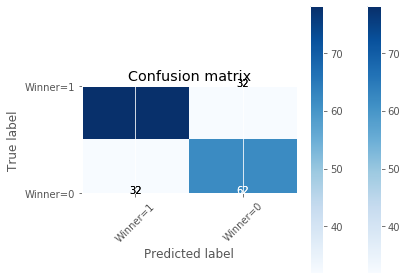

              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66        94
         1.0       0.71      0.71      0.71       110

    accuracy                           0.69       204
   macro avg       0.68      0.68      0.68       204
weighted avg       0.69      0.69      0.69       204

LogLoss: : 0.62
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[90 23]
 [32 59]]
[[90 23]
 [32 59]]
149
Confusion matrix, without normalization
[[90 23]
 [32 59]]
[[90 23]
 [32 59]]
149
Mitjana encerts
139.85294117647058
desviació estandar
5.035943471048758


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


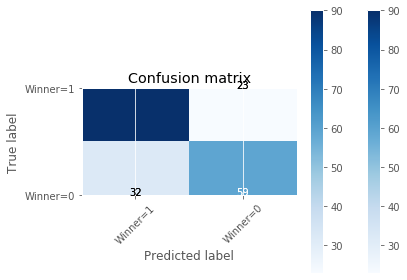

              precision    recall  f1-score   support

         0.0       0.72      0.65      0.68        91
         1.0       0.74      0.80      0.77       113

    accuracy                           0.73       204
   macro avg       0.73      0.72      0.72       204
weighted avg       0.73      0.73      0.73       204

LogLoss: : 0.60
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[83 37]
 [26 58]]
[[83 37]
 [26 58]]
141
Confusion matrix, without normalization
[[83 37]
 [26 58]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[83 37]
 [26 58]]
141
Mitjana encerts
139.88571428571427
desviació estandar
4.967157442765881


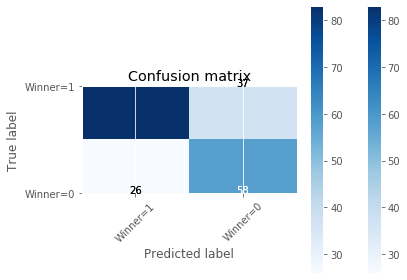

              precision    recall  f1-score   support

         0.0       0.61      0.69      0.65        84
         1.0       0.76      0.69      0.72       120

    accuracy                           0.69       204
   macro avg       0.69      0.69      0.69       204
weighted avg       0.70      0.69      0.69       204

LogLoss: : 0.61
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[88 25]
 [43 48]]
[[88 25]
 [43 48]]
136
Confusion matrix, without normalization
[[88 25]
 [43 48]]
[[88 25]
 [43 48]]
136
Mitjana encerts
139.77777777777777
desviació estandar
4.939135726865082


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


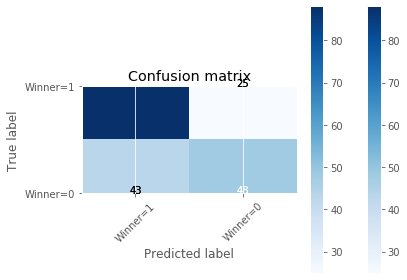

              precision    recall  f1-score   support

         0.0       0.66      0.53      0.59        91
         1.0       0.67      0.78      0.72       113

    accuracy                           0.67       204
   macro avg       0.66      0.65      0.65       204
weighted avg       0.67      0.67      0.66       204

LogLoss: : 0.62
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[90 27]
 [30 57]]
[[90 27]
 [30 57]]
147
Confusion matrix, without normalization
[[90 27]
 [30 57]]
[[90 27]
 [30 57]]
147
Mitjana encerts
139.97297297297297
desviació estandar
5.010726259527474


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


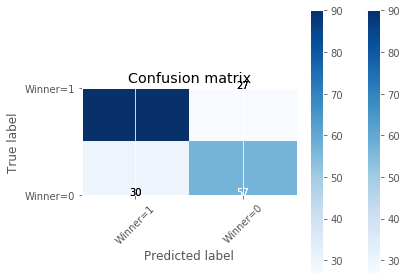

              precision    recall  f1-score   support

         0.0       0.68      0.66      0.67        87
         1.0       0.75      0.77      0.76       117

    accuracy                           0.72       204
   macro avg       0.71      0.71      0.71       204
weighted avg       0.72      0.72      0.72       204

LogLoss: : 0.59
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[79 31]
 [39 55]]
[[79 31]
 [39 55]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


134
Confusion matrix, without normalization
[[79 31]
 [39 55]]
[[79 31]
 [39 55]]
134
Mitjana encerts
139.81578947368422
desviació estandar
5.035951084363283


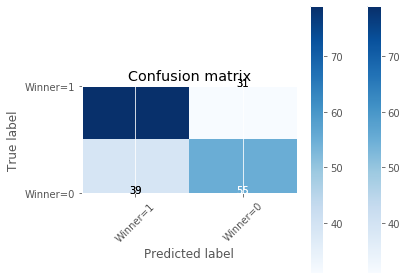

              precision    recall  f1-score   support

         0.0       0.64      0.59      0.61        94
         1.0       0.67      0.72      0.69       110

    accuracy                           0.66       204
   macro avg       0.65      0.65      0.65       204
weighted avg       0.66      0.66      0.66       204

LogLoss: : 0.63
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[72 31]
 [44 57]]
[[72 31]
 [44 57]]
129
Confusion matrix, without normalization
[[72 31]
 [44 57]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[72 31]
 [44 57]]
129
Mitjana encerts
139.53846153846155
desviació estandar
5.25672294254458


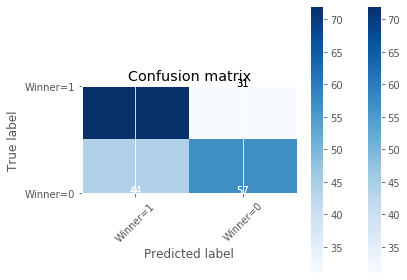

              precision    recall  f1-score   support

         0.0       0.65      0.56      0.60       101
         1.0       0.62      0.70      0.66       103

    accuracy                           0.63       204
   macro avg       0.63      0.63      0.63       204
weighted avg       0.63      0.63      0.63       204

LogLoss: : 0.64
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[87 18]
 [43 56]]
[[87 18]
 [43 56]]
143
Confusion matrix, without normalization
[[87 18]
 [43 56]]
[[87 18]
 [43 56]]
143
Mitjana encerts
139.625
desviació estandar
5.218656436287025


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


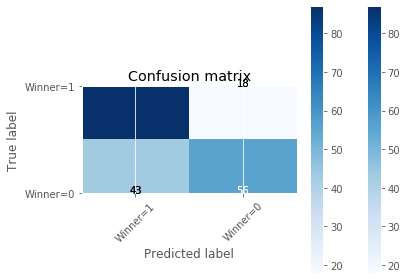

              precision    recall  f1-score   support

         0.0       0.76      0.57      0.65        99
         1.0       0.67      0.83      0.74       105

    accuracy                           0.70       204
   macro avg       0.71      0.70      0.69       204
weighted avg       0.71      0.70      0.70       204

LogLoss: : 0.63
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[88 28]
 [41 47]]
[[88 28]
 [41 47]]
135
Confusion matrix, without normalization
[[88 28]
 [41 47]]
[[88 28]
 [41 47]]
135
Mitjana encerts
139.5121951219512
desviació estandar
5.20376013779301


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


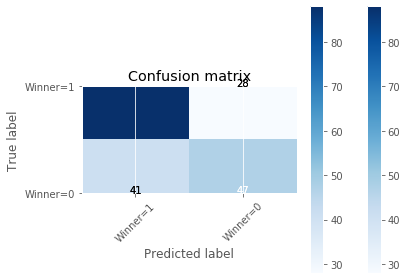

              precision    recall  f1-score   support

         0.0       0.63      0.53      0.58        88
         1.0       0.68      0.76      0.72       116

    accuracy                           0.66       204
   macro avg       0.65      0.65      0.65       204
weighted avg       0.66      0.66      0.66       204

LogLoss: : 0.63
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[77 29]
 [41 57]]
[[77 29]
 [41 57]]
134
Confusion matrix, without normalization
[[77 29]
 [41 57]]
[[77 29]
 [41 57]]
134
Mitjana encerts
139.38095238095238
desviació estandar
5.209663095552436


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


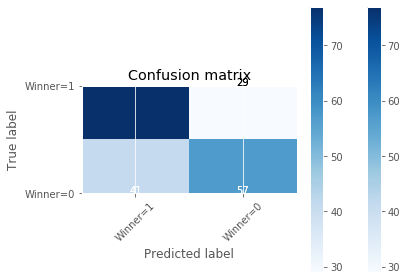

              precision    recall  f1-score   support

         0.0       0.66      0.58      0.62        98
         1.0       0.65      0.73      0.69       106

    accuracy                           0.66       204
   macro avg       0.66      0.65      0.65       204
weighted avg       0.66      0.66      0.65       204

LogLoss: : 0.61
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[82 33]
 [32 57]]
[[82 33]
 [32 57]]
139
Confusion matrix, without normalization
[[82 33]
 [32 57]]
[[82 33]
 [32 57]]
139
Mitjana encerts
139.37209302325581
desviació estandar
5.149049385346971


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


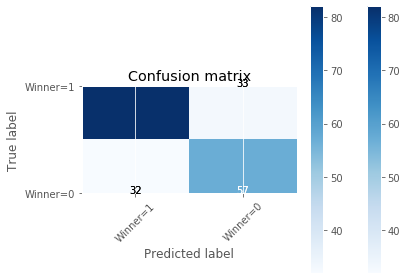

              precision    recall  f1-score   support

         0.0       0.63      0.64      0.64        89
         1.0       0.72      0.71      0.72       115

    accuracy                           0.68       204
   macro avg       0.68      0.68      0.68       204
weighted avg       0.68      0.68      0.68       204

LogLoss: : 0.61
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[83 26]
 [32 63]]
[[83 26]
 [32 63]]
146
Confusion matrix, without normalization
[[83 26]
 [32 63]]
[[83 26]
 [32 63]]
146
Mitjana encerts
139.52272727272728
desviació estandar
5.185156420730046


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


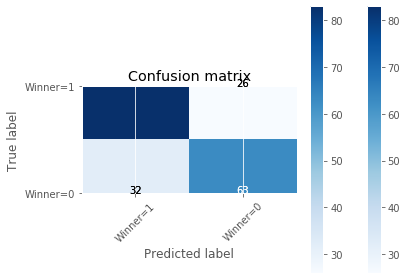

              precision    recall  f1-score   support

         0.0       0.71      0.66      0.68        95
         1.0       0.72      0.76      0.74       109

    accuracy                           0.72       204
   macro avg       0.71      0.71      0.71       204
weighted avg       0.72      0.72      0.71       204

LogLoss: : 0.59
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[79 31]
 [39 55]]
[[79 31]
 [39 55]]
134
Confusion matrix, without normalization
[[79 31]
 [39 55]]
[[79 31]
 [39 55]]
134
Mitjana encerts
139.4
desviació estandar
5.191445955715143


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


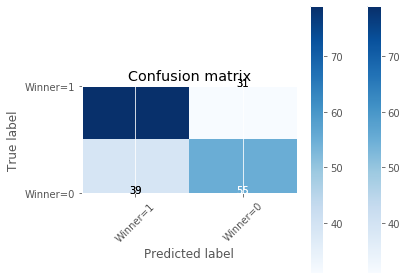

              precision    recall  f1-score   support

         0.0       0.64      0.59      0.61        94
         1.0       0.67      0.72      0.69       110

    accuracy                           0.66       204
   macro avg       0.65      0.65      0.65       204
weighted avg       0.66      0.66      0.66       204

LogLoss: : 0.63
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[78 35]
 [31 60]]
[[78 35]
 [31 60]]
138
Confusion matrix, without normalization
[[78 35]
 [31 60]]
[[78 35]
 [31 60]]
138
Mitjana encerts
139.3695652173913
desviació estandar
5.138764424544491


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


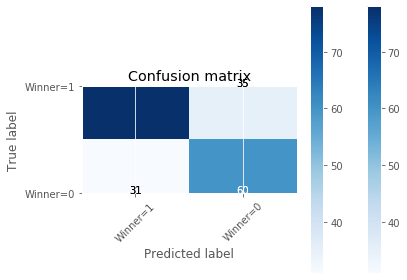

              precision    recall  f1-score   support

         0.0       0.63      0.66      0.65        91
         1.0       0.72      0.69      0.70       113

    accuracy                           0.68       204
   macro avg       0.67      0.67      0.67       204
weighted avg       0.68      0.68      0.68       204

LogLoss: : 0.60
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[90 22]
 [38 54]]
[[90 22]
 [38 54]]
144
Confusion matrix, without normalization
[[90 22]
 [38 54]]
[[90 22]
 [38 54]]
144
Mitjana encerts
139.46808510638297
desviació estandar
5.127527145813543


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


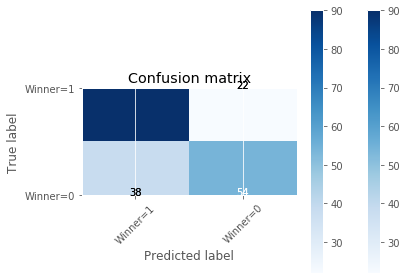

              precision    recall  f1-score   support

         0.0       0.71      0.59      0.64        92
         1.0       0.70      0.80      0.75       112

    accuracy                           0.71       204
   macro avg       0.71      0.70      0.70       204
weighted avg       0.71      0.71      0.70       204

LogLoss: : 0.60
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[84 27]
 [40 53]]
[[84 27]
 [40 53]]
137
Confusion matrix, without normalization
[[84 27]
 [40 53]]
[[84 27]
 [40 53]]
137
Mitjana encerts
139.41666666666666
desviació estandar
5.086064839889043


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


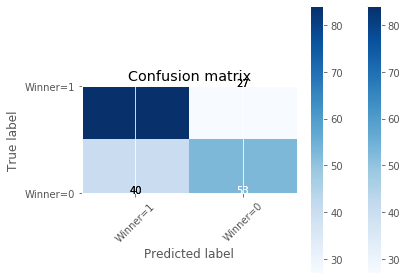

              precision    recall  f1-score   support

         0.0       0.66      0.57      0.61        93
         1.0       0.68      0.76      0.71       111

    accuracy                           0.67       204
   macro avg       0.67      0.66      0.66       204
weighted avg       0.67      0.67      0.67       204

LogLoss: : 0.61
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[81 21]
 [37 65]]
[[81 21]
 [37 65]]
146
Confusion matrix, without normalization
[[81 21]
 [37 65]]


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[81 21]
 [37 65]]
146
Mitjana encerts
139.55102040816325
desviació estandar
5.119236328928393


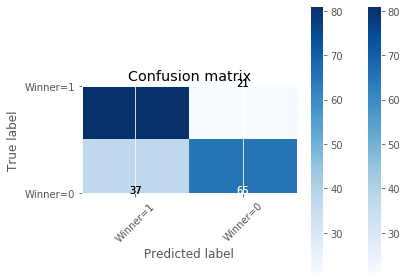

              precision    recall  f1-score   support

         0.0       0.76      0.64      0.69       102
         1.0       0.69      0.79      0.74       102

    accuracy                           0.72       204
   macro avg       0.72      0.72      0.71       204
weighted avg       0.72      0.72      0.71       204

LogLoss: : 0.59
Train set: (767, 4) (767,)
Test set: (204, 4) (204,)
Confusion matrix, without normalization
[[86 29]
 [39 50]]
[[86 29]
 [39 50]]
136
Confusion matrix, without normalization
[[86 29]
 [39 50]]
[[86 29]
 [39 50]]
136
Mitjana encerts
139.48
desviació estandar
5.092111546303753


/home/roger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


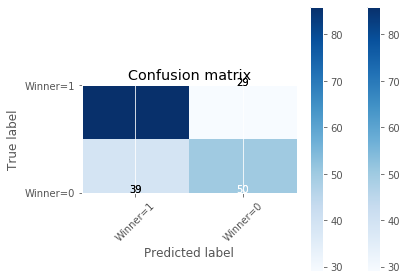

              precision    recall  f1-score   support

         0.0       0.63      0.56      0.60        89
         1.0       0.69      0.75      0.72       115

    accuracy                           0.67       204
   macro avg       0.66      0.65      0.66       204
weighted avg       0.66      0.67      0.66       204

LogLoss: : 0.62


In [30]:
dev=[]
correct=[]
correct_average=[]
random=[]
N=50
adjustment=0
for m in range(N):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.21, random_state=m+80)

    print ('Train set:', X_train.shape,  y_train.shape)
    print ('Test set:', X_test.shape,  y_test.shape)

    LR = LogisticRegression(C=0.9, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)

    jaccard_similarity_score(y_test, yhat)

    

    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Winner=1','Winner=0'],normalize= False,  title='Confusion matrix')
    ad=plot_confusion_matrix(cnf_matrix, classes=['Winner=1','Winner=0'],normalize= False,  title='Confusion matrix')
    adjustment=adjustment+ad
    random=np.append(random,m)
    correct=np.append(correct,ad)
    dev=np.append(dev,ad)
    print('Mitjana encerts')
    print(adjustment/(m+1))
    correct_average=np.append(correct_average,(adjustment/(m+1)))
    st_dev=np.std(dev)
    print('desviació estandar')
    print(st_dev)
    plt.show()

    print (classification_report(y_test, yhat))

    log_loss(y_test, yhat_prob)
    
    LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
    yhat_prob2 = LR2.predict_proba(X_test)
    print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

Now we have to look for the best test dimension to reach the best accuracy

Fer gràfic de accuracy vs tamany del datatest

In [31]:
dimension=[0,0.07,0.14,0.21,0.28,0.35]
avg_correct=[0,46.84/float(68),93.3/float(136),138.84/float(204),186.62/float(272),233.8/float(340)]
dim=pd.DataFrame()
dim['Dim']=dimension
dim['Avg_correct']=avg_correct
dim

Dim  Avg_correct
0  0.00     0.000000
1  0.07     0.688824
2  0.14     0.686029
3  0.21     0.680588
4  0.28     0.686103
5  0.35     0.687647

Text(0, 0.5, 'Average Correct')

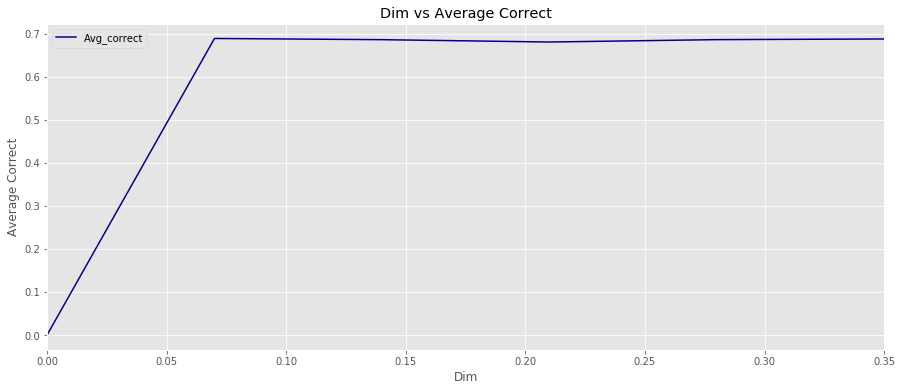

In [32]:
dim.plot(kind='line',x='Dim', y='Avg_correct', figsize=(15,6), color='darkblue')

plt.title('Dim vs Average Correct')
plt.xlabel('Dim')
plt.ylabel('Average Correct')

We can se that at any dimension of the test we get a very similar accuracy in the predictions

Provar de fer prova amb els ultims 200 partits i amb els primers 700 com a train a veure quina és la accuracy